# REFMAP laboratory listening test 1 analysis: Sound quality analysis

## Setup

In [1]:
# -*- coding: utf-8 -*-
import sys
import os
# Build a path from the notebook's parent directory to the python modules
module_path = os.path.abspath(os.path.join('..'))

# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)

# import statements
import numpy as np
import pandas as pd
from PyQt5.QtWidgets import QFileDialog, QApplication
from scipy import stats
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
from cycler import cycler

In [2]:
# set plot parameters
sns.set_style('white')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE,
       labelsize=MEDIUM_SIZE)    # fontsize of the axes title and x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

mycolours = [(0, 102, 255), (0, 204, 153), (255, 0, 102), (74, 111, 152),
             (251, 164, 49), (204, 153, 255), (90, 192, 255), (80, 245, 233),
             (255, 90, 192), (164, 201, 242), (255, 254, 139), (255, 243, 255)]
mycolours = [tuple(shade/255 for shade in colour) for colour in mycolours]

# enable copy-on-write mode for Pandas (will be default from Pandas 3.0)
pd.options.mode.copy_on_write = True

# check/open QApplication instance
if not QApplication.instance():
    app = QApplication(sys.argv)
else:
    app = QApplication.instance() 

# set numpy seed
np.random.seed(808)


Set the saveplots toggle to True if plot saving is desired:

In [3]:
saveplots = True

if saveplots:
    # select figure output save path
    outFigPath = QFileDialog.getExistingDirectory(caption=r"Select output folder to save plots '03 Experiment\Experiment 1\Analysis\Plots'")

    # create subfolders if not already existing
    try:
        os.mkdir(os.path.join(outFigPath, "svg"))
    except FileExistsError:
        pass

    try:
        os.mkdir(os.path.join(outFigPath, "pdf"))
    except FileExistsError:
        pass


Set the savedata toggle to True if data saving is desired:

In [4]:
savedata = True

if saveplots:
    # select data output save path
    outDataPath = QFileDialog.getExistingDirectory(caption=r"Select output folder to save data '03 Experiment\Experiment 1\Analysis\Python'")


## Import data and organise

In [5]:
# import test data
fileExts = "*.csv"

# Part A
dataByStimAFilePath = list(QFileDialog.getOpenFileName(filter="refmap_listest1_testdataA_ByStim.csv",
                                                       caption=r"Open refmap_listest1_testdataA_ByStim.csv in: '03 Experiment\Experiment 1\Analysis\PostProcess'"))[0]
dataByStimTestA = pd.read_csv(dataByStimAFilePath, index_col=0)

dataByStimANoticeFilePath = list(QFileDialog.getOpenFileName(filter="refmap_listest1_testdataANoticeFilt_ByStim.csv",
                                                             caption=r"Open refmap_listest1_testdataANoticeFilt_ByStim.csv in: '03 Experiment\Experiment 1\Analysis\PostProcess'"))[0]
dataByStimTestANotice = pd.read_csv(dataByStimANoticeFilePath, index_col=0)


# Part B
dataByStimBFilePath = list(QFileDialog.getOpenFileName(filter="refmap_listest1_testdataB_ByStim.csv",
                                                       caption=r"Open refmap_listest1_testdataB_ByStim.csv in: '03 Experiment\Experiment 1\Analysis\PostProcess'"))[0]
dataByStimTestB = pd.read_csv(dataByStimBFilePath, index_col=0)

# Parts A and B

dataByStimFilePath = list(QFileDialog.getOpenFileName(filter="refmap_listest1_testdata_ByStim.csv",
                                                      caption=r"Open refmap_listest1_testdata_ByStim.csv in: '03 Experiment\Experiment 1\Analysis\PostProcess'"))[0]
dataByStimTest = pd.read_csv(dataByStimFilePath, index_col=0)


# Auxiliary data

auxDataByStimFilePath = list(QFileDialog.getOpenFileName(filter="refmap_listest1_auxdata.csv",
                                                         caption=r"Open refmap_listest1_auxdata.csv in: '03 Experiment\Experiment 1\Analysis\PostProcess'"))[0]
auxData =  pd.read_csv(auxDataByStimFilePath, index_col=0)
auxData.drop(index='G57_background', inplace=True)

## Data manipulation

In [6]:

# calculate alternative indices

dataByStimTestANotice['Detect0p5IntMaxLRLog'] = dataByStimTestANotice['Detect0p5dBIntMaxLR']/10
dataByStimTestANotice['Detect0p5MaxMaxLRLog'] = dataByStimTestANotice['Detect0p5dBMaxMaxLR']/10
dataByStimTestANotice['Detect0p1IntMaxLRLog'] = dataByStimTestANotice['Detect0p1dBIntMaxLR']/10
dataByStimTestANotice['Detect0p1MaxMaxLRLog'] = dataByStimTestANotice['Detect0p1dBMaxMaxLR']/10


dataByStimTest['Detect0p5IntMaxLRLog'] = dataByStimTest['Detect0p5dBIntMaxLR']/10
dataByStimTest['Detect0p5MaxMaxLRLog'] = dataByStimTest['Detect0p5dBMaxMaxLR']/10
dataByStimTest['Detect0p1IntMaxLRLog'] = dataByStimTest['Detect0p1dBIntMaxLR']/10
dataByStimTest['Detect0p1MaxMaxLRLog'] = dataByStimTest['Detect0p1dBMaxMaxLR']/10

C:\Users\m_lot\AppData\Local\Temp\ipykernel_34192\3952866366.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataByStimTestANotice['Detect0p5IntMaxLRLog'] = dataByStimTestANotice['Detect0p5dBIntMaxLR']/10
C:\Users\m_lot\AppData\Local\Temp\ipykernel_34192\3952866366.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataByStimTestANotice['Detect0p5MaxMaxLRLog'] = dataByStimTestANotice['Detect0p5dBMaxMaxLR']/10
C:\Users\m_lot\AppData\Local\Temp\ipykernel_34192\3952866366.py:5: PerformanceWarning: DataFrame is highly fragmente

In [7]:
# categorise columns

for dataset in [dataByStimTestA, dataByStimTestANotice, dataByStimTest]:
    # insert 'No UAS' value into missing values for the SNRlevel, UASLAeq, UASOperation and UASType columns
    dataset['SNRlevel'] = dataset['SNRlevel'].fillna("No UAS")
    dataset['UASLAeq'] = dataset['UASLAeq'].fillna("No UAS")
    dataset['UASOperation'] = dataset['UASOperation'].fillna("No UAS")
    dataset['UASType'] = dataset['UASType'].fillna("No UAS")

    dataset['AmbientEnv'] = pd.Categorical(dataset['AmbientEnv'], ["Park", "Street"], ordered=True)
    dataset['SNRlevel'] = pd.Categorical(dataset['SNRlevel'], ["No UAS", "-16", "-10", "-4", "2", "8"], ordered=True)
    dataset['UASLAeq'] = pd.Categorical(dataset['UASLAeq'], ["No UAS", "42", "48", "54", "60"], ordered=True)
    dataset['UASOperation'] = pd.Categorical(dataset['UASOperation'], ["No UAS", "Overflight", "Landing", "Takeoff"], ordered=True)
    dataset['UASType'] = pd.Categorical(dataset['UASType'], ["No UAS", "H520", "M300", "T150"], ordered=True)

for dataset in [dataByStimTestB]:
    # insert 'No UAS' value into missing values for the SNRlevel, UASLAeq, UASOperation and UASType columns
    dataset['SNRlevel'] = dataset['SNRlevel'].fillna("No UAS")
    dataset['UASLAeq'] = dataset['UASLAeq'].fillna("No UAS")
    dataset['UASOperation'] = dataset['UASOperation'].fillna("No UAS")
    dataset['UASType'] = dataset['UASType'].fillna("No UAS")

    dataset['AmbientEnv'] = pd.Categorical(dataset['AmbientEnv'], ["Park", "Street"], ordered=True)
    dataset['SNRlevel'] = pd.Categorical(dataset['SNRlevel'], ["No UAS", "2", "8"], ordered=True)
    dataset['UASLAeq'] = pd.Categorical(dataset['UASLAeq'], ["No UAS", "54", "60"], ordered=True)
    dataset['UASOperation'] = pd.Categorical(dataset['UASOperation'], ["No UAS", "Overflight"], ordered=True)
    dataset['UASType'] = pd.Categorical(dataset['UASType'], ["No UAS", "H520", "T150"], ordered=True)

for dataset in [auxData]:
    # ensure 'UASLAeq' field is parsed as categorical with correct order
    dataset['UASLAeq'] = pd.Categorical(dataset['UASLAeq'].astype(int).astype(str), ["42", "48", "54", "60"], ordered=True)
    dataset['UASOperation'] = pd.Categorical(dataset['UASOperation'], ["Overflight", "Landing", "Takeoff"], ordered=True)
    dataset['UASType'] = pd.Categorical(dataset['UASType'], ["H520", "M300", "T150"], ordered=True)


DON'T RUN THE NEXT BLOCK UNLESS NEEDING TIME-DEPENDENT DATA - EXCESSIVE LOADING TIME

In [ ]:
## !!!ONLY RUN IF NEEDED - TIME-INTENSIVE LOADING BLOCK!!!

# import SQM time-dependent data
fileExts = "*.xlsx"
filelist = list(QFileDialog.getOpenFileNames(filter=fileExts,
                                             caption=r"Select SQM analysis files in: \03 Experiment\Experiment 1\Analysis\ArtemiS\Output_new"))[0]
filelist.sort()
filenames = [filepath.split('/')[-1] for filepath in filelist]
A1_SQM = pd.read_excel(io=filelist[0], sheet_name=None)
A2_SQM = pd.read_excel(io=filelist[1], sheet_name=None)
H520_F_1_SQM = pd.read_excel(io=filelist[2], sheet_name=None)
H520_L_1_SQM = pd.read_excel(io=filelist[3], sheet_name=None)
H520_T_1_SQM = pd.read_excel(io=filelist[4], sheet_name=None)
M300_F_1_SQM = pd.read_excel(io=filelist[5], sheet_name=None)
M300_L_1_SQM = pd.read_excel(io=filelist[6], sheet_name=None)
M300_T_1_SQM = pd.read_excel(io=filelist[7], sheet_name=None)
T150_F_1_SQM = pd.read_excel(io=filelist[8], sheet_name=None)
T150_L_1_SQM = pd.read_excel(io=filelist[9], sheet_name=None)
T150_T_1_SQM = pd.read_excel(io=filelist[10], sheet_name=None)

## Functions

### Traditional rounding (for display)

In [8]:
def roundTrad(val, digits=3):
   return round(val+10**(-len(str(val))-1), digits)

In [9]:
def displayRndVal(val, digits=3):

    crit = 1/10**digits

    if val < crit:
        valString = "<" + str(crit)
    else:
        valRnd = roundTrad(val, digits)
        dec = int(str(valRnd).split('.')[-1])
        valString = str(valRnd)
        nzeros = digits - len(str(dec))
        if nzeros > 0:
            valString = valString + nzeros*"0"

    return(valString)

## Stimuli sound quality analysis

### Time-aggregated

#### Spider plot function

Below is a function that generates a radar (spider) plot with varying axis scalings.

In [231]:
def spider(df, *, id_column, title=None, max_values=None, padding=1.25, axsize=12,
           labelsize=12, legsize=12, palette=None,
           savefigpath=False, savefigfmt='svg'):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    if max_values is None:
        max_values = {key: padding*max(value) for key, value in data.items()}
    else:
        keys = [key for key in data.keys()]
        values =  [max_value for max_value in max_values]
        max_values = dict(map(lambda i, j: (i, j), keys, values))
    
    normalized_data = {key: np.array(value) / max_values[key] for key, value in data.items()}
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist() + [0.0]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    if palette is None:
        pass
    else:
        try:
            ax.set_prop_cycle(cycler(color=palette))
        except TypeError:
            raise TypeError

    for ii, model_name in enumerate(ids):
        values = [normalized_data[key][ii] for key in data.keys()]
        actual_values = [data[key][ii] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        line, = ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.1)

        for ii, (_x, _y, t) in enumerate(zip(angles, values, actual_values)):
            t = f'{t:.3f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size=labelsize, color=line.get_color())
            
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.01)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks, fontsize=axsize)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=legsize)
    if title is not None: plt.suptitle(title)
    if savefigpath != False:
        try:
            if type(savefigfmt) is list:
                for ii, fmt in enumerate(savefigfmt):
                    if type(savefigpath) is list:
                        plt.savefig(savefigpath[ii], format=savefigfmt[ii])
                    else:
                        plt.savefig(savefigpath, format=savefigfmt[ii])
            else:
                plt.savefig(savefigpath, format=savefigfmt)
        except ValueError:
            raise ValueError
    plt.show()

In [232]:
# prepare subdata frame 
df_SQM = auxData.loc[(auxData['UASLAeq'] == '60') &
                     (auxData['SessionPart'] == 'A'), ['UASType', 'UASOperation',
                              'LoudECMAPowAvgBin', 'SharpAurISO305ExMaxLR',
                              'TonalSHMInt05ExMaxLR', 'FluctECMA10ExBin',
                              'RoughFZ05ExMaxLR', 'ImpulsLoudWZAvgMaxLR']]

max_values = np.round(np.max(df_SQM.iloc[:, 2:], axis=0)*1.1, 3)


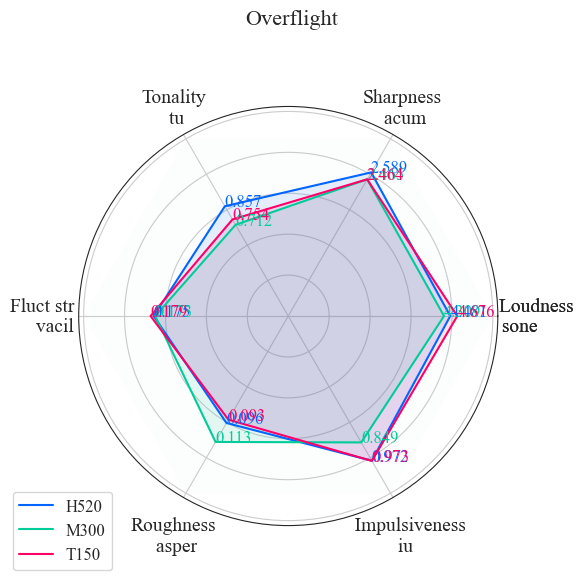

In [233]:
data=pd.DataFrame({
        'UASType': df_SQM['UASType'].unique(),
        '        Loudness\n sone': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[2]].values, 3),
        'Sharpness\n acum\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[3]].values, 3),
        'Tonality\n tu\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[4]].values, 3),
        'Fluct str       \n vacil   ': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[5]].values, 3),
        '\n\nRoughness\n asper': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[6]].values, 3),
        '\n\n   Impulsiveness\n iu': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[7]].values, 3)
    })

if saveplots:
    savefigpath = [os.path.join(outFigPath, "svg", "UASSQMOverflight.svg"),
                   os.path.join(outFigPath, "pdf", "UASSQMOverflight.pdf")]
else:
    savefigpath = False

spider(
    data,
    id_column='UASType',
    title='Overflight',
    max_values=max_values,
    padding=1.15,
    axsize=14,
    palette=mycolours,
    savefigpath=savefigpath,
    savefigfmt=['svg', 'pdf'])


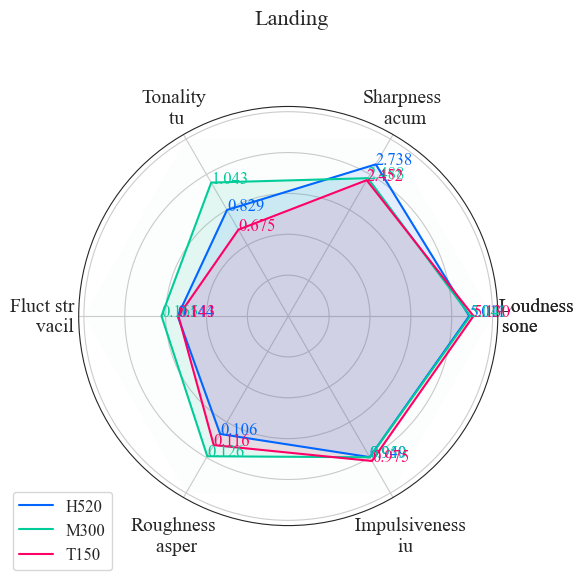

In [234]:
data=pd.DataFrame({
        'UASType': df_SQM['UASType'].unique(),
        '        Loudness\n sone': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[2]].values, 3),
        'Sharpness\n acum\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[3]].values, 3),
        'Tonality\n tu\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[4]].values, 3),
        'Fluct str       \n vacil   ': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[5]].values, 3),
        '\n\nRoughness\n asper': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[6]].values, 3),
        '\n\n   Impulsiveness\n iu': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[7]].values, 3)
    })

if saveplots:
    savefigpath = [os.path.join(outFigPath, "svg", "UASSQMLanding.svg"),
                   os.path.join(outFigPath, "pdf", "UASSQMLanding.pdf")]
                   
else:
    savefigpath = False

spider(
    data,
    id_column='UASType',
    title='Landing',
    max_values=max_values,
    padding=1.15,
    axsize=14,
    palette=mycolours,
    savefigpath=savefigpath,
    savefigfmt=['svg', 'pdf'])


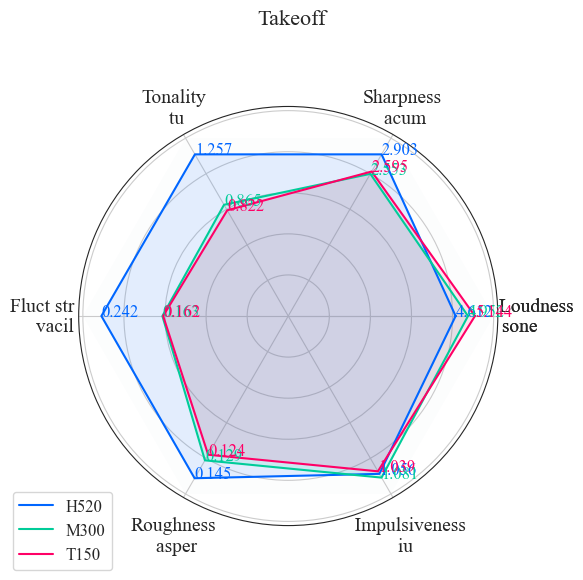

In [235]:
data=pd.DataFrame({
        'UASType': df_SQM['UASType'].unique(),
        '        Loudness\n sone': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[2]].values, 3),
        'Sharpness\n acum\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[3]].values, 3),
        'Tonality\n tu\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[4]].values, 3),
        'Fluct str       \n vacil   ': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[5]].values, 3),
        '\n\nRoughness\n asper': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[6]].values, 3),
        '\n\n   Impulsiveness\n iu': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[7]].values, 3)
    })

if saveplots:
    savefigpath = [os.path.join(outFigPath, "svg", "UASSQMTakeoff.svg"),
                   os.path.join(outFigPath, "pdf", "UASSQMTakeoff.pdf")]
else:
    savefigpath = False

spider(
    data,
    id_column='UASType',
    title='Takeoff',
    max_values=max_values,
    padding=1.15,
    axsize=14,
    palette=mycolours,
    savefigpath=savefigpath,
    savefigfmt=['svg', 'pdf'])

### Time-aggregated (repeat)

Radar analysis repeated with tonal loudness instead of (integrated) tonality

In [240]:
# prepare subdata frame 
df_SQM = auxData.loc[(auxData['UASLAeq'] == '60') &
                     (auxData['SessionPart'] == 'A'), ['UASType', 'UASOperation',
                              'LoudECMAPowAvgBin', 'SharpAurISO305ExMaxLR',
                              'TonLdECMAPowAvgBin', 'FluctECMA10ExBin',
                              'RoughFZ05ExMaxLR', 'ImpulsLoudWZAvgMaxLR']]

max_values = np.round(np.max(df_SQM.iloc[:, 2:], axis=0)*1.1, 3)


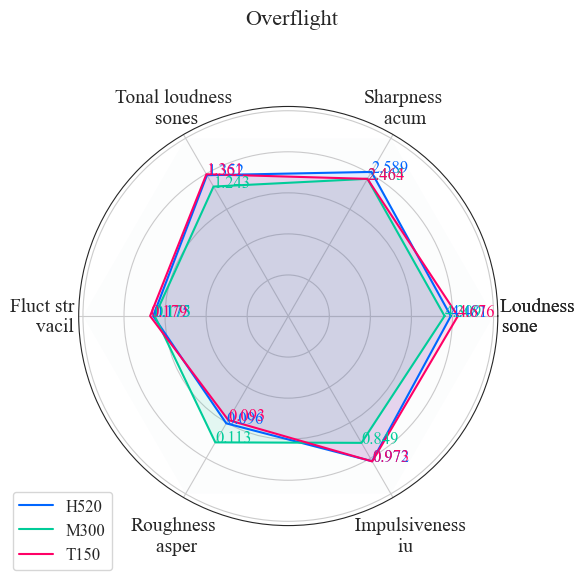

In [241]:
data=pd.DataFrame({
        'UASType': df_SQM['UASType'].unique(),
        '        Loudness\n sone': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[2]].values, 3),
        'Sharpness\n acum\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[3]].values, 3),
        'Tonal loudness\n sones\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[4]].values, 3),
        'Fluct str       \n vacil   ': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[5]].values, 3),
        '\n\nRoughness\n asper': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[6]].values, 3),
        '\n\n   Impulsiveness\n iu': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Overflight'), df_SQM.columns[7]].values, 3)
    })


if saveplots:
    savefigpath = [os.path.join(outFigPath, "svg", "UASSQMOverflightTLd.svg"),
                   os.path.join(outFigPath, "pdf", "UASSQMOverflightTLd.pdf")]
else:
    savefigpath = False
    
spider(
    data,
    id_column='UASType',
    title='Overflight',
    max_values=max_values,
    padding=1.15,
    axsize=14,
    palette=mycolours,
    savefigpath=savefigpath,
    savefigfmt=['svg', 'pdf'])


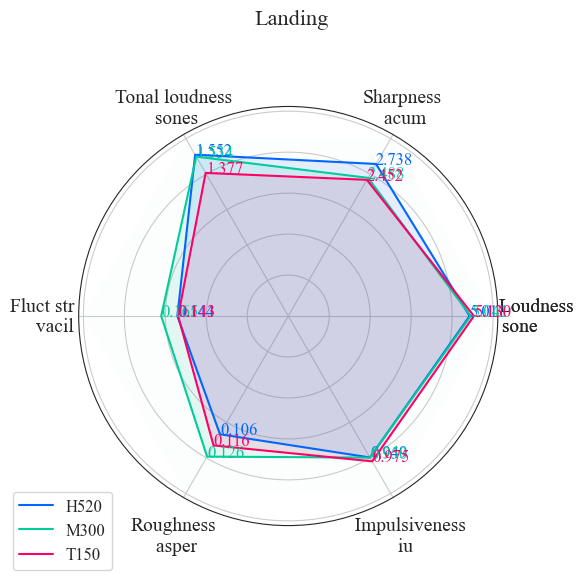

In [242]:
data=pd.DataFrame({
        'UASType': df_SQM['UASType'].unique(),
        '        Loudness\n sone': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[2]].values, 3),
        'Sharpness\n acum\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[3]].values, 3),
        'Tonal loudness\n sones\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[4]].values, 3),
        'Fluct str       \n vacil   ': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[5]].values, 3),
        '\n\nRoughness\n asper': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[6]].values, 3),
        '\n\n   Impulsiveness\n iu': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Landing'), df_SQM.columns[7]].values, 3)
    })

if saveplots:
    savefigpath = [os.path.join(outFigPath, "svg", "UASSQMLandingTLd.svg"),
                   os.path.join(outFigPath, "pdf", "UASSQMLandingTLd.pdf")]
else:
    savefigpath = False

spider(
    data,
    id_column='UASType',
    title='Landing',
    max_values=max_values,
    padding=1.15,
    axsize=14,
    palette=mycolours,
    savefigpath=savefigpath,
    savefigfmt=['svg', 'pdf'])

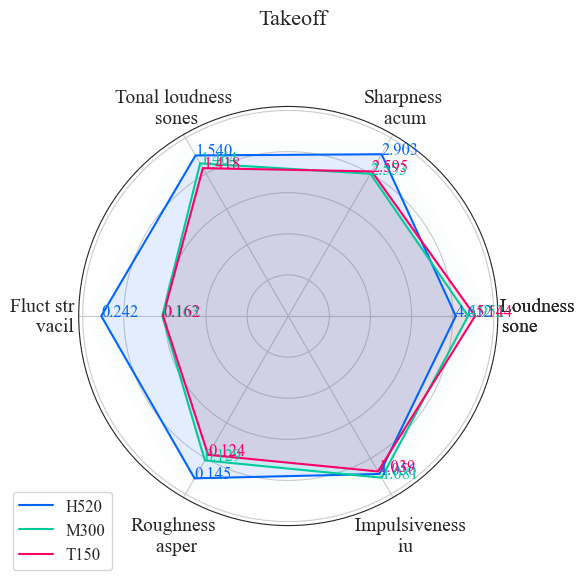

In [243]:
data=pd.DataFrame({
        'UASType': df_SQM['UASType'].unique(),
        '        Loudness\n sone': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[2]].values, 3),
        'Sharpness\n acum\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[3]].values, 3),
        'Tonal loudness\n sones\n': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[4]].values, 3),
        'Fluct str       \n vacil   ': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[5]].values, 3),
        '\n\nRoughness\n asper': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[6]].values, 3),
        '\n\n   Impulsiveness\n iu': np.round(df_SQM.loc[(df_SQM['UASOperation'] == 'Takeoff'), df_SQM.columns[7]].values, 3)
    })

if saveplots:
    savefigpath = [os.path.join(outFigPath, "svg", "UASSQMTakeoffTLd.svg"),
                   os.path.join(outFigPath, "pdf", "UASSQMTakeoffTLd.pdf")]
else:
    savefigpath = False

spider(data,
       id_column='UASType',
       title='Takeoff',
       max_values=max_values,
       padding=1.15,
       axsize=14,
       palette=mycolours,
       savefigpath=savefigpath,
       savefigfmt=['svg', 'pdf'])

## Loudness/level comparison

In [11]:
def lowess_with_confidence_bounds(
    data, x, y, xvals=None, n_boot=1000, conf_interval=0.95, lowess_kw={}):
    """
    Perform Lowess regression and determine a confidence interval by bootstrap resampling
    """

    x = data[x]
    y = data[y]

    if xvals is None:
        xvals = x.sort_values().values
    
    # Lowess smoothing
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=xvals, **lowess_kw)

    # Perform bootstrap resamplings of the data
    # and evaluate the smoothing at a fixed set of points
    smoothed_values = np.empty((n_boot, len(xvals)))
    for i in range(n_boot):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x.values[sample]
        sampled_y = y.values[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=xvals, **lowess_kw
        )

    # Get the confidence interval
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(n_boot * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top


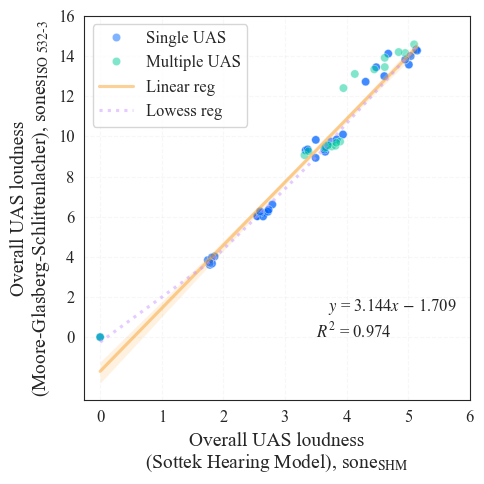

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO3PowAvgBin'], sm.add_constant(data['UASLoudECMAPowAvgBin']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudECMAPowAvgBin', y='UASLoudISO3PowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudECMAPowAvgBin', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudECMAPowAvgBin', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(xlabel="Overall UAS loudness" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       ylabel="Overall UAS loudness" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sones$_\text{ISO 532-3}$",
       xticks=range(0, 7), yticks=range(0, 18, 2))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=3.5, y=0, s=r"$R^2$ = " + str(round(res.rsquared, 3)))
ax.text(x=3.5, y=1.3,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" +" " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO3vNSHM"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

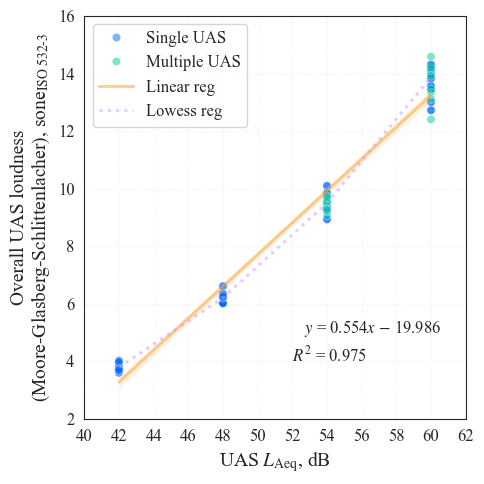

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))

data = pd.concat([dataByStimTestA, dataByStimTestB])  # this is a fast way to strip the categories from the data frames when omitting the No UAS data for dB metrics
data = data[data['UASLAeq'] != 'No UAS']
data['UASLAeq'] = data['UASLAeq'].astype(float)

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO3PowAvgBin'], sm.add_constant(data['UASLAeq']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLAeq', y='UASLoudISO3PowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLAeq', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLAeq', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(xlabel=r"UAS $L_\text{Aeq}$, dB",
       ylabel="Overall UAS loudness" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sone$_\text{ISO 532-3}$",
       xticks=range(40, 64, 2), yticks=range(2, 18, 2))
ax.text(x=52, y=4, s=r"$R^2$ = " + str(round(res.rsquared, 3)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=52, y=5,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO3vLAeq"
    
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

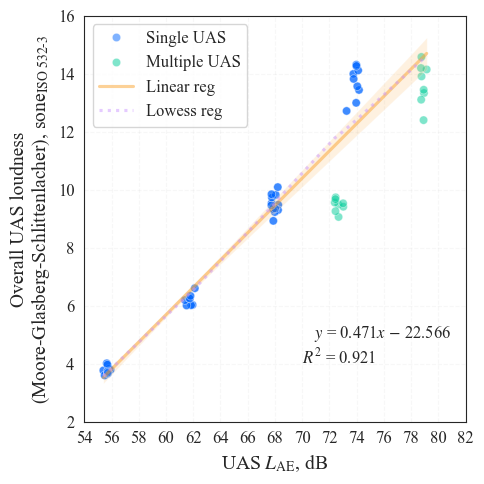

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))

data = pd.concat([dataByStimTestA, dataByStimTestB])  # this is a fast way to strip the categories from the data frames
data = data[data['UASLAeq'] != 'No UAS']
data['UASLAeq'] = data['UASLAeq'].astype(float)

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO3PowAvgBin'], sm.add_constant(data['UASLAEMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLAEMaxLR', y='UASLoudISO3PowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLAEMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLAEMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(xlabel=r"UAS $L_\text{AE}$, dB",
       ylabel="Overall UAS loudness" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sone$_\text{ISO 532-3}$",
       xticks=range(54, 84, 2), yticks=range(2, 18, 2))
ax.text(x=70, y=4, s=r"$R^2$ = " + str(round(res.rsquared, 3)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=70, y=4.9,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO3vLAE"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

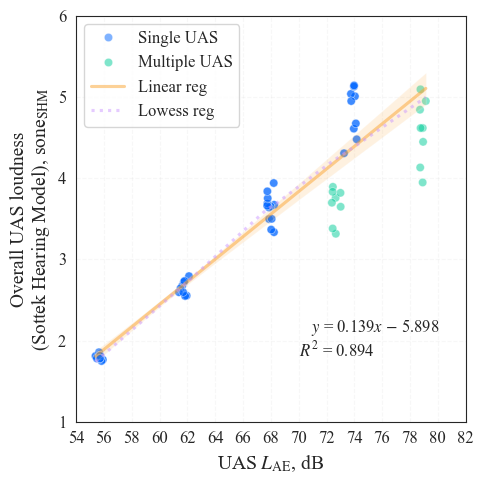

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

data = pd.concat([dataByStimTestA, dataByStimTestB])  # this is a fast way to strip the categories from the data frames when omitting the No UAS data for dB metrics
data = data[data['UASLAeq'] != 'No UAS']
data['UASLAeq'] = data['UASLAeq'].astype(float)

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudECMAPowAvgBin'], sm.add_constant(data['UASLAEMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLAEMaxLR', y='UASLoudECMAPowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLAEMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLAEMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')

ax.set(xlabel=r"UAS $L_\text{AE}$, dB",
       ylabel="Overall UAS loudness" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xticks=range(54, 84, 2), yticks=range(1, 7))
ax.text(x=70, y=1.8, s=r"$R^2$ = " + str(round(res.rsquared, 3)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=70, y=2.1,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNSHMvLAE"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

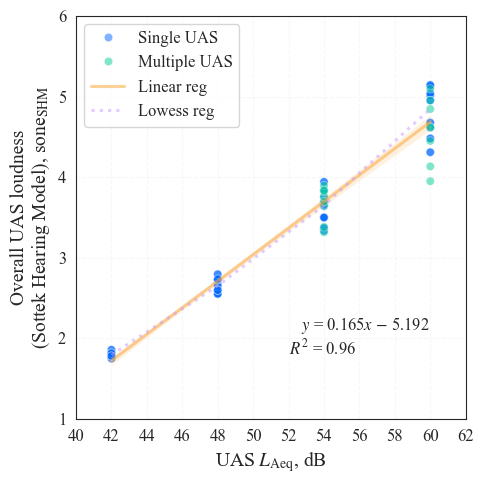

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))

data = pd.concat([dataByStimTestA, dataByStimTestB])  # this is a fast way to strip the categories from the data frames when omitting the No UAS data for dB metrics
data = data[data['UASLAeq'] != 'No UAS']
data['UASLAeq'] = data['UASLAeq'].astype(float)

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudECMAPowAvgBin'], sm.add_constant(data['UASLAeq']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLAeq', y='UASLoudECMAPowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLAeq', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLAeq', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')

ax.set(xlabel=r"UAS $L_\text{Aeq}$, dB",
       ylabel="Overall UAS loudness"+ "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xticks=range(40, 64, 2), yticks=range(1, 7))
ax.text(x=52, y=1.8, s=r"$R^2$ = " + str(round(res.rsquared, 3)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=52, y=2.1,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNSHMvLAeq"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

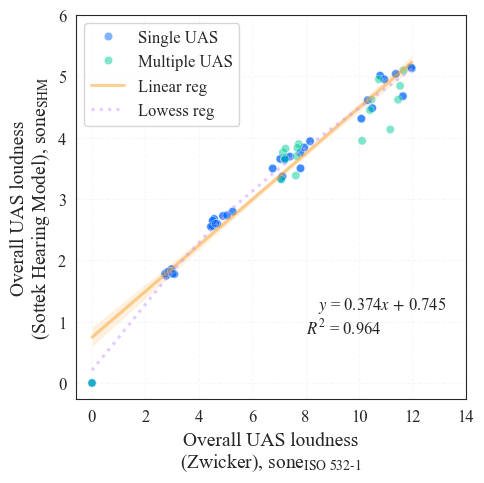

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudECMAPowAvgBin'], sm.add_constant(data['UASLoudISO1PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudISO1PowAvgMaxLR', y='UASLoudECMAPowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudISO1PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudISO1PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall UAS loudness" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xlabel="Overall UAS loudness" + "\n" + "(Zwicker), " + r"sone$_{\text{ISO 532-1}}$",
       yticks=range(0, 7), xticks=range(0, 16, 2))
ax.text(x=8, y=0.8, s=r"$R^2$ = " + str(round(res.rsquared, 3)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=8, y=1.2,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNSHMvNISO1"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

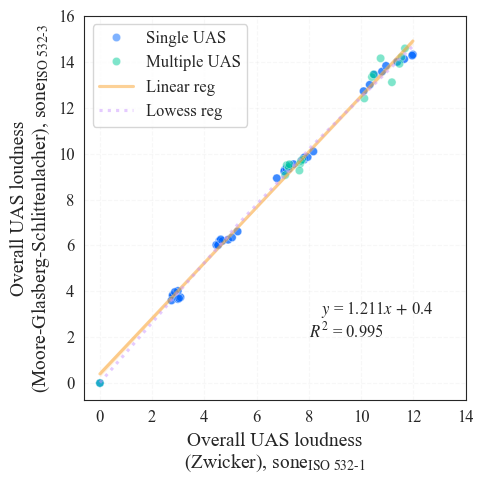

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO3PowAvgBin'], sm.add_constant(data['UASLoudISO1PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudISO1PowAvgMaxLR', y='UASLoudISO3PowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudISO1PowAvgMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudISO1PowAvgMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(xlabel="Overall UAS loudness" + "\n" + "(Zwicker), " + r"sone$_\text{ISO 532-1}$",
       ylabel="Overall UAS loudness" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sone$_\text{ISO 532-3}$",
       xticks=range(0, 16, 2), yticks=range(0, 18, 2))
ax.text(x=8, y=2, s=r"$R^2$ = " + str(round(res.rsquared, 3)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=8, y=3,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO3vNISO1"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

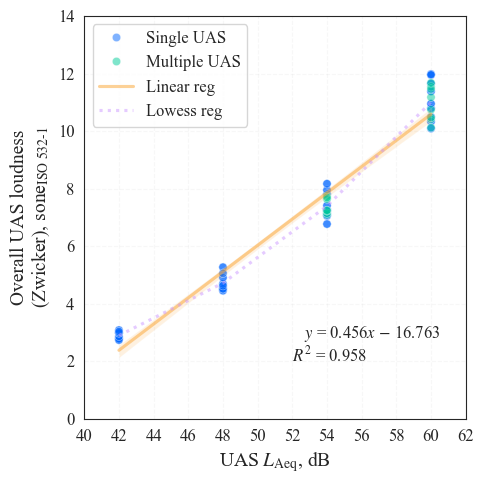

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))

data = pd.concat([dataByStimTestA, dataByStimTestB])  # this is a fast way to strip the categories from the data frames when omitting the No UAS data for dB metrics
data = data[data['UASLAeq'] != 'No UAS']
data['UASLAeq'] = data['UASLAeq'].astype(float)

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO1PowAvgMaxLR'], sm.add_constant(data['UASLAeq']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLAeq', y='UASLoudISO1PowAvgMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLAeq', y='UASLoudISO1PowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLAeq', y='UASLoudISO1PowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(xlabel=r"UAS $L_\text{Aeq}$, dB",
       ylabel="Overall UAS loudness" + "\n" + "(Zwicker), " + r"sone$_\text{ISO 532-1}$",
       xticks=range(40, 64, 2), yticks=range(0, 16, 2))
ax.text(x=52, y=2, s=r"$R^2$ = " + str(round(res.rsquared, 3)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=52, y=2.8,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO1vLAeq"
    
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

### Proxy metrics for sound quality

#### Loudness

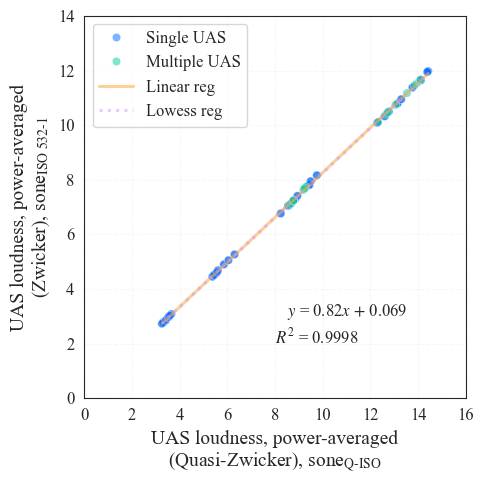

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO1PowAvgMaxLR'], sm.add_constant(data['UASLoudQZ5321PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudISO1PowAvgMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudISO1PowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudISO1PowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS loudness, power-averaged" + "\n" + "(Zwicker), " + r"sone$_\text{ISO 532-1}$",
       xlabel="UAS loudness, power-averaged" + "\n" + "(Quasi-Zwicker), " + r"sone$_\text{Q-ISO}$",
       yticks=range(0, 16, 2), xticks=range(0, 18, 2))
ax.text(x=8, y=2, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=8, y=3,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO1vNQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

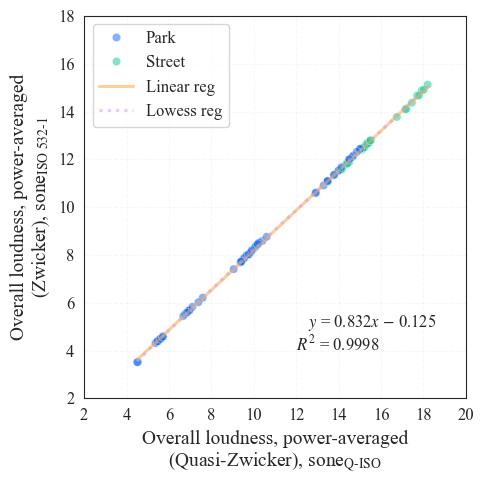

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['LoudISO1PowAvgMaxLR'], sm.add_constant(data['LoudQZ5321PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudISO1PowAvgMaxLR', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudISO1PowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudISO1PowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall loudness, power-averaged" + "\n" + "(Zwicker), " + r"sone$_\text{ISO 532-1}$",
       xlabel="Overall loudness, power-averaged" + "\n" + "(Quasi-Zwicker), " + r"sone$_\text{Q-ISO}$",
       yticks=range(2, 20, 2), xticks=range(2, 22, 2))
ax.text(x=12, y=4, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=12, y=5,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallNISO1vNQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

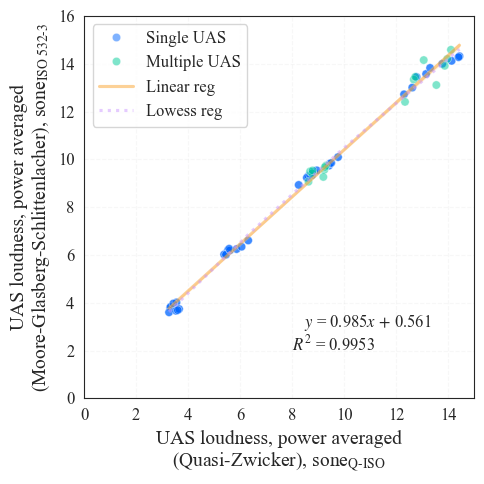

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO3PowAvgBin'], sm.add_constant(data['UASLoudQZ5321PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudISO3PowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS loudness, power averaged" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sone$_\text{ISO 532-3}$",
       xlabel="UAS loudness, power averaged" + "\n" + "(Quasi-Zwicker), " + r"sone$_\text{Q-ISO}$",
       yticks=range(0, 18, 2), xticks=range(0, 16, 2))
ax.text(x=8, y=2, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=8, y=3,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO3vNQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

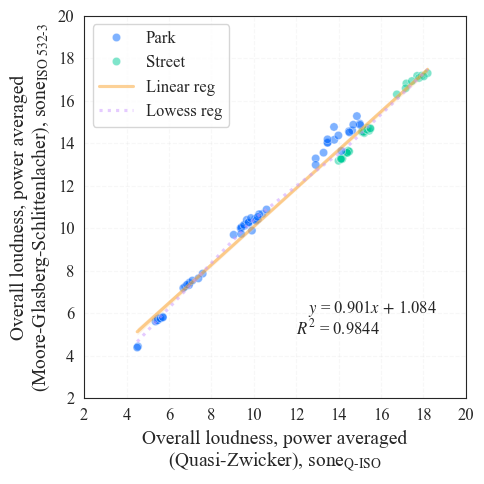

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['LoudISO3PowAvgBin'], sm.add_constant(data['LoudQZ5321PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudISO3PowAvgBin', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall loudness, power averaged" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sone$_\text{ISO 532-3}$",
       xlabel="Overall loudness, power averaged" + "\n" + "(Quasi-Zwicker), " + r"sone$_\text{Q-ISO}$",
       yticks=range(2, 22, 2), xticks=range(2, 22, 2))
ax.text(x=12, y=5, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=12, y=6,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallNISO3vNQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

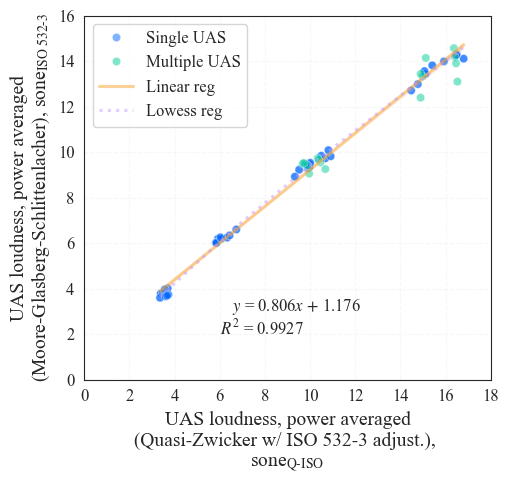

In [39]:
fig, ax = plt.subplots(figsize=(5.25, 5))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudISO3PowAvgBin'], sm.add_constant(data['UASLoudQZ5323PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudQZ5323PowAvgMaxLR', y='UASLoudISO3PowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudQZ5323PowAvgMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudQZ5323PowAvgMaxLR', y='UASLoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS loudness, power averaged" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sone$_\text{ISO 532-3}$",
       xlabel="UAS loudness, power averaged" + "\n" + "(Quasi-Zwicker w/ ISO 532-3 adjust.), " + "\n" + r"sone$_\text{Q-ISO}$",
       yticks=range(0, 18, 2), xticks=range(0, 20, 2))
ax.text(x=6, y=2, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=6, y=3,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNISO3vNQZ5323"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

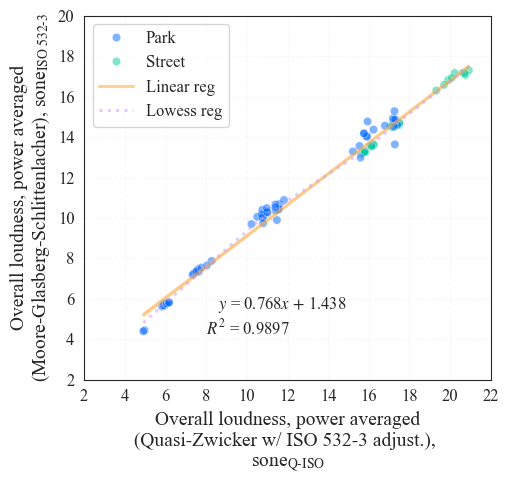

In [40]:
fig, ax = plt.subplots(figsize=(5.25, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['LoudISO3PowAvgBin'], sm.add_constant(data['LoudQZ5323PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='LoudQZ5323PowAvgMaxLR', y='LoudISO3PowAvgBin', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='LoudQZ5323PowAvgMaxLR', y='LoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='LoudQZ5323PowAvgMaxLR', y='LoudISO3PowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall loudness, power averaged" + "\n" + "(Moore-Glasberg-Schlittenlacher), " + r"sone$_\text{ISO 532-3}$",
       xlabel="Overall loudness, power averaged" + "\n" + "(Quasi-Zwicker w/ ISO 532-3 adjust.), " + "\n" + r"sone$_\text{Q-ISO}$",
       yticks=range(2, 22, 2), xticks=range(2, 24, 2))
ax.text(x=8, y=4.25, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=8, y=5.5,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallNISO3vNQZ5323"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

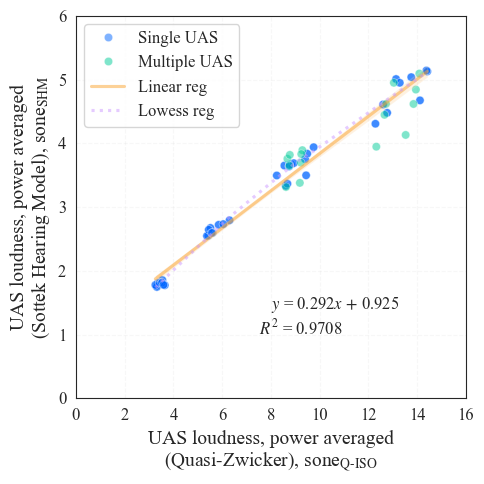

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudECMAPowAvgBin'], sm.add_constant(data['UASLoudQZ5321PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudECMAPowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudQZ5321PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS loudness, power averaged" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xlabel="UAS loudness, power averaged" + "\n" + "(Quasi-Zwicker), " + r"sone$_\text{Q-ISO}$",
       yticks=range(0, 7, 1), xticks=range(0, 18, 2))
ax.text(x=7.5, y=1, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=7.5, y=1.4,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNSHMvNQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

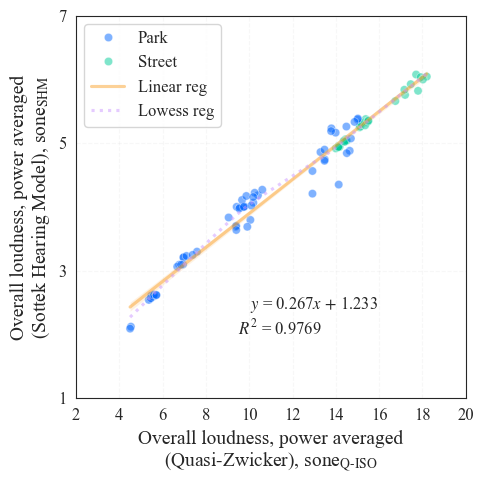

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['LoudECMAPowAvgBin'], sm.add_constant(data['LoudQZ5321PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudECMAPowAvgBin', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='LoudQZ5321PowAvgMaxLR', y='LoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall loudness, power averaged" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xlabel="Overall loudness, power averaged" + "\n" + "(Quasi-Zwicker), " + r"sone$_\text{Q-ISO}$",
       yticks=range(1, 8, 2), xticks=range(2, 22, 2))
ax.text(x=9.5, y=2, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=9.5, y=2.4,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallNSHMvNQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

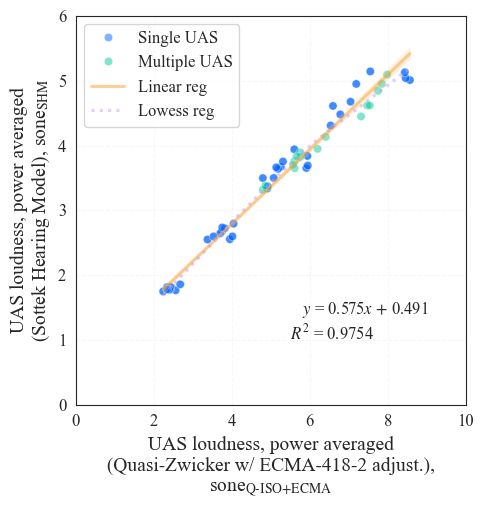

In [50]:
fig, ax = plt.subplots(figsize=(5, 5.25))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudECMAPowAvgBin'], sm.add_constant(data['UASLoudQZ4182PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudQZ4182PowAvgMaxLR', y='UASLoudECMAPowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudQZ4182PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudQZ4182PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS loudness, power averaged" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xlabel="UAS loudness, power averaged" + "\n" + "(Quasi-Zwicker w/ ECMA-418-2 adjust.)," + "\n" + r"sone$_\text{Q-ISO+ECMA}$",
       yticks=range(0, 7, 1), xticks=range(0, 12, 2))
ax.text(x=5.5, y=1, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=5.5, y=1.4,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatNSHMvNQZ4182"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

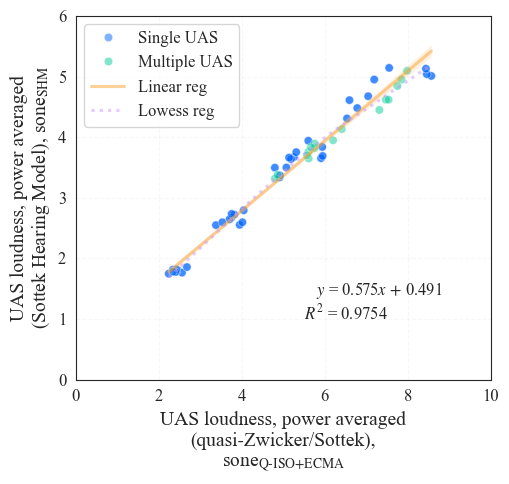

In [51]:
fig, ax = plt.subplots(figsize=(5.25, 5))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASLoudECMAPowAvgBin'], sm.add_constant(data['UASLoudQZ4182PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASLoudQZ4182PowAvgMaxLR', y='UASLoudECMAPowAvgBin', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASLoudQZ4182PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASLoudQZ4182PowAvgMaxLR', y='UASLoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS loudness, power averaged" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xlabel="UAS loudness, power averaged" + "\n" + "(quasi-Zwicker/Sottek)," + "\n" + r"sone$_\text{Q-ISO+ECMA}$",
       yticks=range(0, 7, 1), xticks=range(0, 12, 2))
ax.text(x=5.5, y=1, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=5.5, y=1.4,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "FigSQscatNSHMvNQZ4182"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

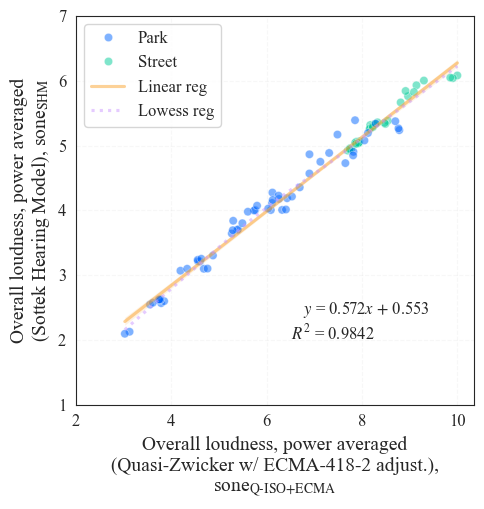

In [41]:
fig, ax = plt.subplots(figsize=(5, 5.25))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['LoudECMAPowAvgBin'], sm.add_constant(data['LoudQZ4182PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='LoudQZ4182PowAvgMaxLR', y='LoudECMAPowAvgBin', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='LoudQZ4182PowAvgMaxLR', y='LoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='LoudQZ4182PowAvgMaxLR', y='LoudECMAPowAvgBin',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall loudness, power averaged" + "\n" + "(Sottek Hearing Model), " + r"sone$_\text{SHM}$",
       xlabel="Overall loudness, power averaged" + "\n" + "(Quasi-Zwicker w/ ECMA-418-2 adjust.)," + "\n" + r"sone$_\text{Q-ISO+ECMA}$",
       yticks=range(1, 8, 1), xticks=range(2, 12, 2))
ax.text(x=6.5, y=2, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=6.5, y=2.4,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallNSHMvNQZ4182"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

#### Sharpness

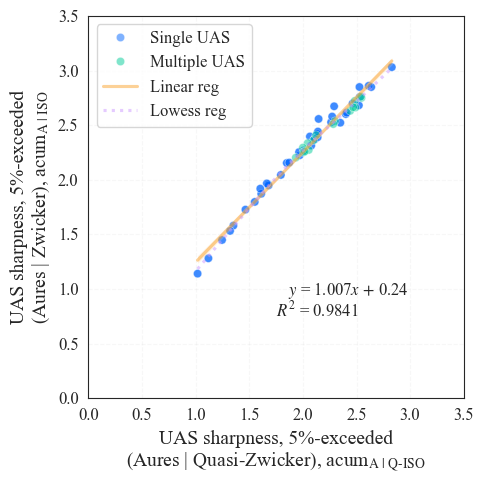

In [252]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

# filter out 'No UAS' sounds
data = data.loc[data['UASLAeq'] != 'No UAS', :]

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASSharpAurISO105ExMaxLR'], sm.add_constant(data['UASSharpAurQZ532105ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurISO105ExMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurISO105ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurISO105ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Zwicker), " + r"acum$_\text{A | ISO}$",
       xlabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker), " + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(0, 4, 0.5), xticks=np.arange(0, 4, 0.5))
ax.text(x=1.75, y=0.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.75, y=0.95,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatSAISO1vSAQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

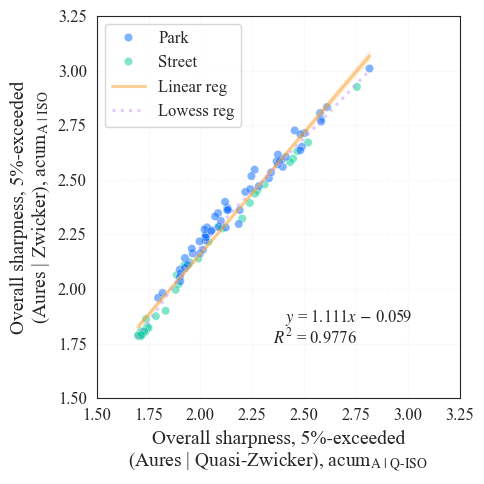

In [253]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['SharpAurISO105ExMaxLR'], sm.add_constant(data['SharpAurQZ532105ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurISO105ExMaxLR', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurISO105ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurISO105ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Zwicker), " + r"acum$_\text{A | ISO}$",
       xlabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker), " + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(1.5, 3.5, 0.25), xticks=np.arange(1.5, 3.5, 0.25))
ax.text(x=2.35, y=1.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=2.35, y=1.85,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallSAISO1vSAQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

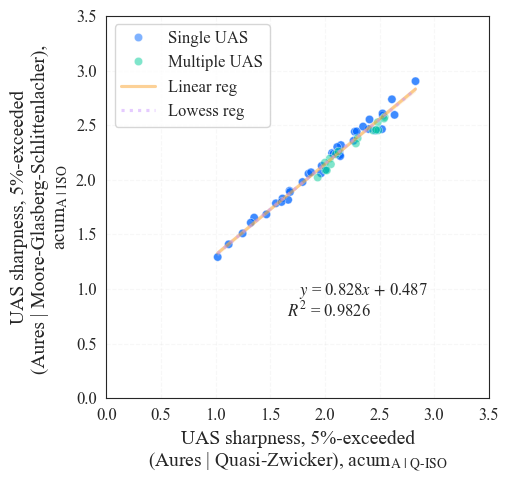

In [254]:
fig, ax = plt.subplots(figsize=(5.25, 5))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASSharpAurISO305ExMaxLR'], sm.add_constant(data['UASSharpAurQZ532105ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurISO305ExMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Moore-Glasberg-Schlittenlacher), " + "\n" + r"acum$_\text{A | ISO}$",
       xlabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker), " + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(0, 4, 0.5), xticks=np.arange(0, 4, 0.5))
ax.text(x=1.65, y=0.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.65, y=0.95,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatSAISO3vSAQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

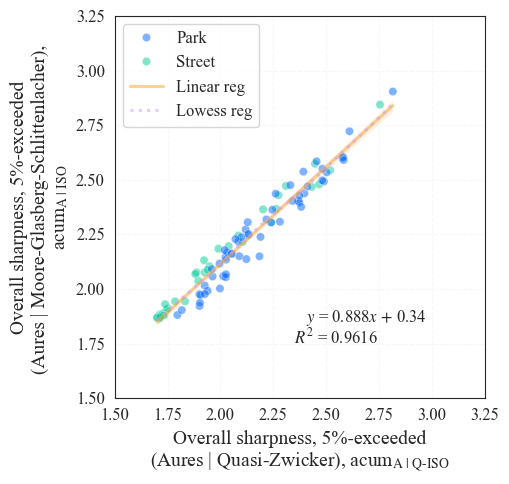

In [255]:
fig, ax = plt.subplots(figsize=(5.25, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['SharpAurISO305ExMaxLR'], sm.add_constant(data['SharpAurQZ532105ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurISO305ExMaxLR', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Moore-Glasberg-Schlittenlacher), " + "\n" + r"acum$_\text{A | ISO}$",
       xlabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker), " + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(1.5, 3.5, 0.25), xticks=np.arange(1.5, 3.5, 0.25))
ax.text(x=2.35, y=1.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=2.35, y=1.85,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallSAISO3vSAQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

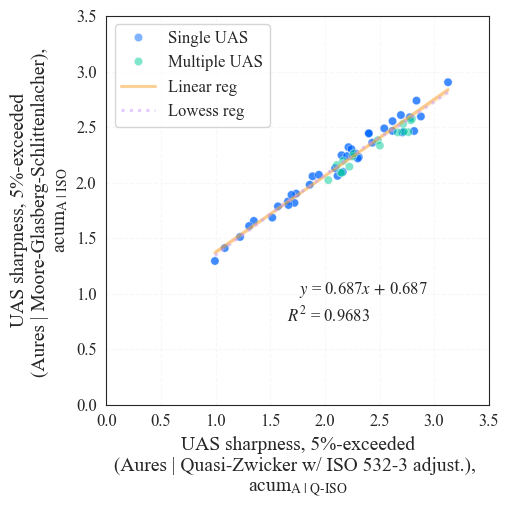

In [256]:
fig, ax = plt.subplots(figsize=(5.25, 5.25))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASSharpAurISO305ExMaxLR'], sm.add_constant(data['UASSharpAurQZ532305ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASSharpAurQZ532305ExMaxLR', y='UASSharpAurISO305ExMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASSharpAurQZ532305ExMaxLR', y='UASSharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASSharpAurQZ532305ExMaxLR', y='UASSharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Moore-Glasberg-Schlittenlacher), " + "\n" + r"acum$_\text{A | ISO}$",
       xlabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker w/ ISO 532-3 adjust.), " + "\n" + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(0, 4, 0.5), xticks=np.arange(0, 4, 0.5))
ax.text(x=1.65, y=0.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.65, y=1.0,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatSAISO3vSAQZ5323"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

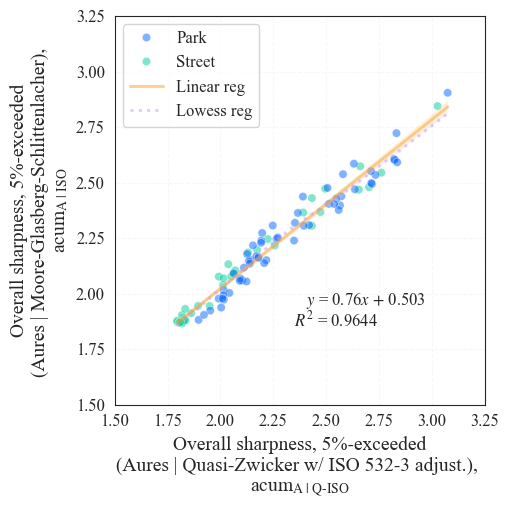

In [257]:
fig, ax = plt.subplots(figsize=(5.25, 5.25))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['SharpAurISO305ExMaxLR'], sm.add_constant(data['SharpAurQZ532305ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='SharpAurQZ532305ExMaxLR', y='SharpAurISO305ExMaxLR', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='SharpAurQZ532305ExMaxLR', y='SharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='SharpAurQZ532305ExMaxLR', y='SharpAurISO305ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Moore-Glasberg-Schlittenlacher), " + "\n" + r"acum$_\text{A | ISO}$",
       xlabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker w/ ISO 532-3 adjust.), " + "\n" + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(1.5, 3.5, 0.25), xticks=np.arange(1.5, 3.5, 0.25))
ax.text(x=2.35, y=1.85, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=2.35, y=1.95,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallSAISO3vSAQZ5323"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

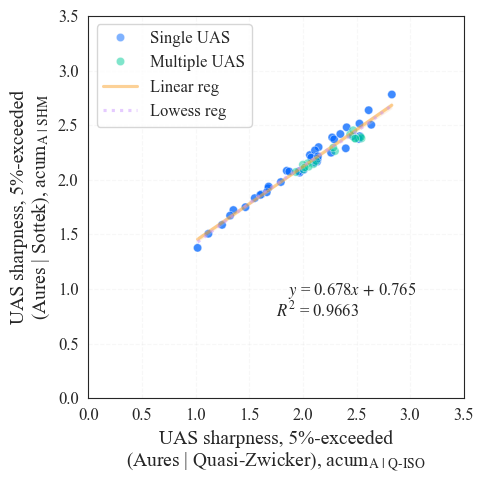

In [258]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASSharpAurSHM05ExMaxLR'], sm.add_constant(data['UASSharpAurQZ532105ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurSHM05ExMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASSharpAurQZ532105ExMaxLR', y='UASSharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Sottek), " + r"acum$_\text{A | SHM}$",
       xlabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker), " + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(0, 4, 0.5), xticks=np.arange(0, 4, 0.5))
ax.text(x=1.75, y=0.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.75, y=0.95,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatSASHMvSAQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

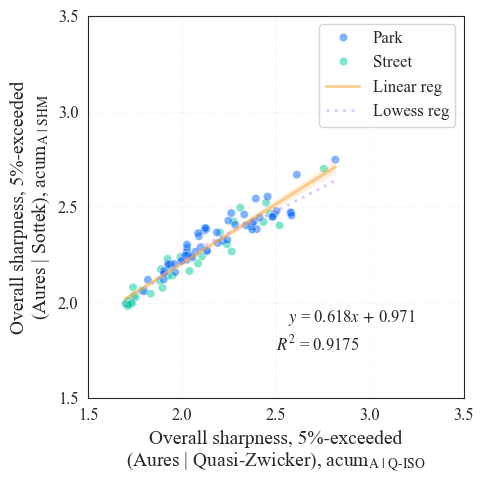

In [259]:
fig, ax = plt.subplots(figsize=(5, 5))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['SharpAurSHM05ExMaxLR'], sm.add_constant(data['SharpAurQZ532105ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurSHM05ExMaxLR', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='SharpAurQZ532105ExMaxLR', y='SharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Sottek), " + r"acum$_\text{A | SHM}$",
       xlabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker), " + r"acum$_\text{A | Q-ISO}$",
       yticks=np.arange(1.5, 4, 0.5), xticks=np.arange(1.5, 4, 0.5))
ax.text(x=2.5, y=1.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=2.5, y=1.9,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatOallSASHMvSAQZ5321"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

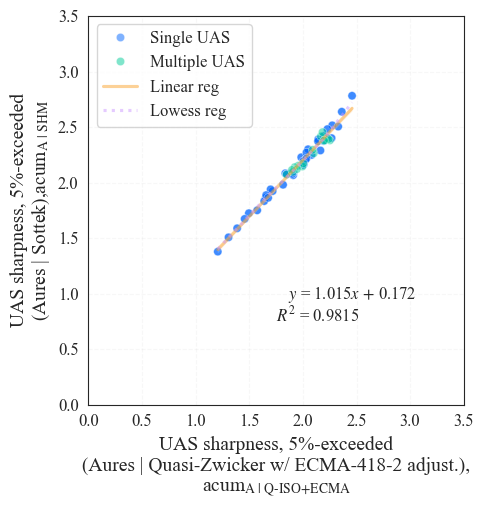

In [260]:
fig, ax = plt.subplots(figsize=(5, 5.25))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASSharpAurSHM05ExMaxLR'], sm.add_constant(data['UASSharpAurQZ418205ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASSharpAurQZ418205ExMaxLR', y='UASSharpAurSHM05ExMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASSharpAurQZ418205ExMaxLR', y='UASSharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASSharpAurQZ418205ExMaxLR', y='UASSharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Sottek)," + r"acum$_\text{A | SHM}$",
       xlabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker w/ ECMA-418-2 adjust.)," + "\n" + r"acum$_\text{A | Q-ISO+ECMA}$",
       yticks=np.arange(0, 4, 0.5), xticks=np.arange(0, 4, 0.5))
ax.text(x=1.75, y=0.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.75, y=0.95,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "SQscatSASHMvSAQZ4182"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

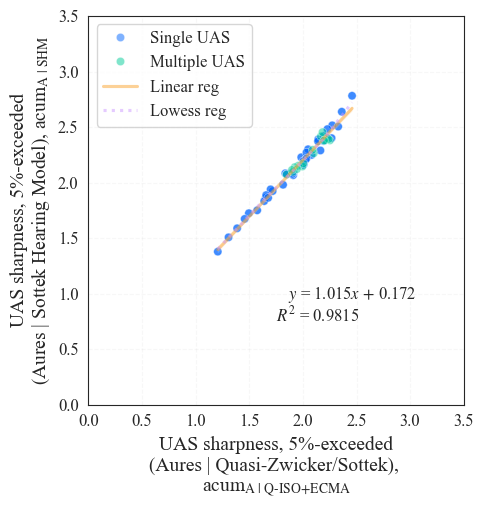

In [261]:
fig, ax = plt.subplots(figsize=(5, 5.25))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASSharpAurSHM05ExMaxLR'], sm.add_constant(data['UASSharpAurQZ418205ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASSharpAurQZ418205ExMaxLR', y='UASSharpAurSHM05ExMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASSharpAurQZ418205ExMaxLR', y='UASSharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASSharpAurQZ418205ExMaxLR', y='UASSharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Sottek Hearing Model), " + r"acum$_\text{A | SHM}$",
       xlabel="UAS sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker/Sottek), " + "\n" + r"acum$_\text{A | Q-ISO+ECMA}$",
       yticks=np.arange(0, 4, 0.5), xticks=np.arange(0, 4, 0.5))
ax.text(x=1.75, y=0.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.75, y=0.95,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend()

if saveplots:

    filename = "FigSQscatSASHMvSAQZ4182"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

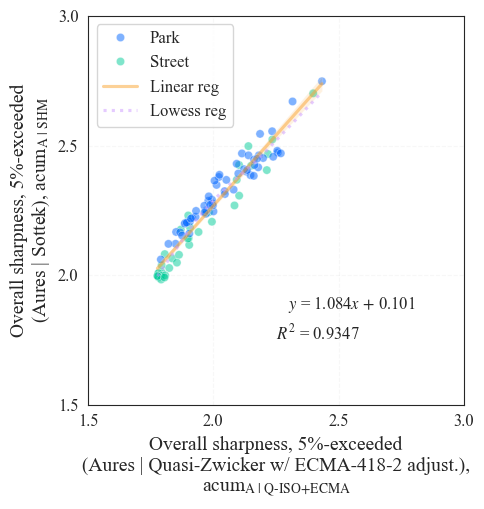

In [262]:
fig, ax = plt.subplots(figsize=(5, 5.25))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['SharpAurSHM05ExMaxLR'], sm.add_constant(data['SharpAurQZ418205ExMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='SharpAurQZ418205ExMaxLR', y='SharpAurSHM05ExMaxLR', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='SharpAurQZ418205ExMaxLR', y='SharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='SharpAurQZ418205ExMaxLR', y='SharpAurSHM05ExMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Sottek), " + r"acum$_\text{A | SHM}$",
       xlabel="Overall sharpness, 5%-exceeded" + "\n" + "(Aures | Quasi-Zwicker w/ ECMA-418-2 adjust.)," + "\n" + r"acum$_\text{A | Q-ISO+ECMA}$",
       yticks=np.arange(1.5, 3.25, 0.5), xticks=np.arange(1.5, 3.25, 0.5))
ax.text(x=2.25, y=1.75, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=2.25, y=1.87,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend(loc='upper left')

if saveplots:

    filename = "SQscatOallSASHMvSAQZ4182"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

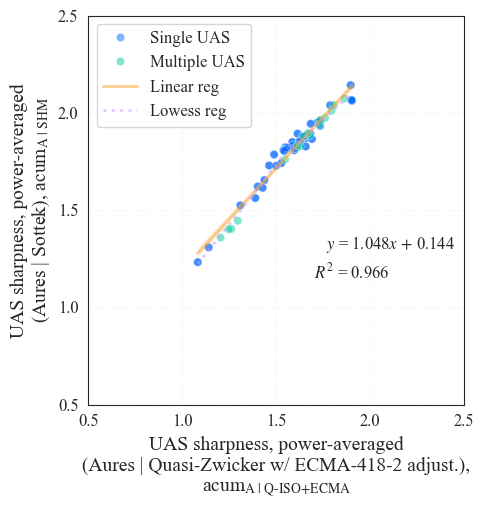

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5.25))

data = dataByStimTest

data = data.loc[data['UASLAeq'] != 'No UAS']

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['UASSharpAurSHMPowAvgMaxLR'], sm.add_constant(data['UASSharpAurQZ4182PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='UASSharpAurQZ4182PowAvgMaxLR', y='UASSharpAurSHMPowAvgMaxLR', hue='SessionPart',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='UASSharpAurQZ4182PowAvgMaxLR', y='UASSharpAurSHMPowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='UASSharpAurQZ4182PowAvgMaxLR', y='UASSharpAurSHMPowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="UAS sharpness, power-averaged" + "\n" + "(Aures | Sottek), " + r"acum$_\text{A | SHM}$",
       xlabel="UAS sharpness, power-averaged" + "\n" + "(Aures | Quasi-Zwicker w/ ECMA-418-2 adjust.)," + "\n" + r"acum$_\text{A | Q-ISO+ECMA}$",
       yticks=np.arange(0.5, 3, 0.5), xticks=np.arange(0.5, 3, 0.5))
ax.text(x=1.7, y=1.15, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.7, y=1.3,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend(loc='upper left')

if saveplots:

    filename = "SQscatSASHMvSAQZ4182PowAvg"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

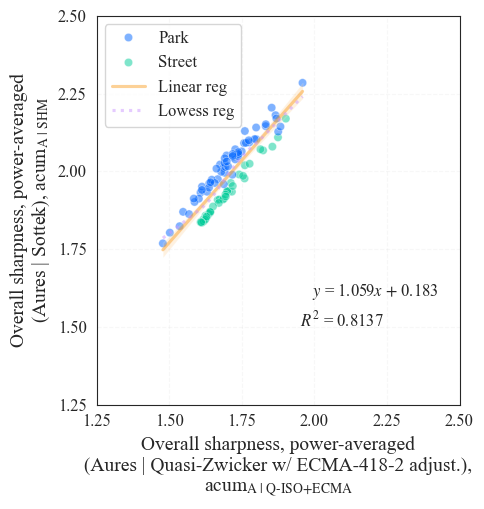

In [272]:
fig, ax = plt.subplots(figsize=(5, 5.25))

data = dataByStimTest

data = data.assign(SessionPart=data.SessionPart.map({'A': "Single UAS", 'B': "Multiple UAS"}))

# fit linear regression model 
mod = sm.OLS(data['SharpAurSHMPowAvgMaxLR'], sm.add_constant(data['SharpAurQZ4182PowAvgMaxLR']), hasconst=True)
res = mod.fit()

sns.scatterplot(data=data, x='SharpAurQZ4182PowAvgMaxLR', y='SharpAurSHMPowAvgMaxLR', hue='AmbientEnv',
                palette=mycolours[0:2], alpha=0.5, ax=ax)
sns.regplot(data=data, x='SharpAurQZ4182PowAvgMaxLR', y='SharpAurSHMPowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[4], lowess=False, label="Linear reg",
            line_kws={'linestyle': '-', 'alpha': 0.5})
sns.regplot(data=data, x='SharpAurQZ4182PowAvgMaxLR', y='SharpAurSHMPowAvgMaxLR',
            scatter=False, seed=303, n_boot=2000, color=mycolours[5], lowess=True, label="Lowess reg",
            line_kws={'linestyle': ':', 'alpha': 0.5})
ax.grid(alpha=0.15, linestyle='--')
ax.set(ylabel="Overall sharpness, power-averaged" + "\n" + "(Aures | Sottek), " + r"acum$_\text{A | SHM}$",
       xlabel="Overall sharpness, power-averaged" + "\n" + "(Aures | Quasi-Zwicker w/ ECMA-418-2 adjust.)," + "\n" + r"acum$_\text{A | Q-ISO+ECMA}$",
       yticks=np.arange(1.25, 2.75, 0.25), xticks=np.arange(1.25, 2.75, 0.25))
ax.text(x=1.95, y=1.5, s=r"$R^2$ = " + str(round(res.rsquared, 4)))

# generate string for intercept sign
if np.sign(res.params.iloc[0]) < 0:
    icept = r"$ - $"
else:
    icept = r"$ + $"

ax.text(x=1.95, y=1.6,
        s=r"   $y$ = " + str(round(res.params.iloc[1], 3)) + r"$x$" + " " + icept + " " + str(abs(round(res.params.iloc[0], 3))))
ax.legend(loc='upper left')

if saveplots:

    filename = "SQscatOallSASHMvSAQZ4182PowAvg"

    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

## Psychoacoustic annoyance analysis

Create a function to calculate psychoacoustic annoyance

In [57]:
def psychAnnoy(loudness, sharpness, roughness, fluctstr=None, tonality=None, impulsivity=None, method='widmann'):

    # initialise arrays
    omS = np.zeros(len(sharpness))
    
    if method in ['widmann', 'di', 'more', 'torija', 'willemsen']:

        if method.lower() == 'willemsen':

            pa = 27.73 + 1.24*impulsivity + 0.86*loudness*sharpness + 1.81*roughness

        else:

            omS[sharpness > 1.75] = 0.25*(sharpness[sharpness > 1.75] - 1.75)*np.log10(loudness[sharpness > 1.75] + 10)
        
            omFR = (2.18/loudness**0.4)*(0.4*fluctstr + 0.6*roughness)
            
            if method.lower() == 'widmann':
                g0 = 0
                gS = 1
                gFR = 1
                gT = 0
                gI = 0
        
                omT = 0
                omI = 0
        
            elif method.lower() == 'more':

                g0 = -0.16
                gS = 11.48
                gFR = 0.84
                gT = 1.25
                gI = 0

                omT = (1 - np.exp(-0.29*loudness))*(1 - np.exp(-5.49*tonality))
                omI = 0
            
            elif method.lower() == 'di':
                g0 = 0
                gS = 1
                gFR = 1
                gT = 1
                gI = 0

                omT = 6.41/loudness**0.52*tonality
                omI = 0

            elif method.lower() == 'torija':
                g0 = 103.08
                gS = 339.49
                gFR = 121.88
                gT = 77.2 
                gI = 29.29

                omT = (1 - np.exp(-0.29*loudness))*(1 - np.exp(-5.49*tonality))
                omI = 0.075*impulsivity/loudness**-1.334

            sqm = np.maximum(0, g0 + gS*omS**2 + gFR*omFR**2 + gT*omT**2 + gI*omI**2)

            pa = loudness*(1 + np.sqrt(sqm))

    else:
        raise ValueError("Input 'method' must be one of 'widmann', 'di', 'more', 'torija', 'willemsen'")

    return pa

In [66]:
paRMSEMean = pd.DataFrame(index=["Widmann_1", "More_1", "Di_1", "Torija_1", "Widmann_2", "More_2", "Di_2", "Torija_2"],
                              columns = ["Overall", "UAS", "Ambient", "UAS+ambient"], dtype=float)


#### Widmann psychoacoustic annoyance

In [ ]:
inputSQMs = {'loudness' : 'LoudISO105ExMaxLR',
             'sharpness' : 'SharpDIN05ExMaxLR',
             'roughness' : 'RoughFZ05ExMaxLR',
             'fluctstr' : 'FluctFZ05ExMaxLR',
             'tonality' : None,
             'impulsivity' : None}

##### Part A

In [62]:
# calculate overall psychoacoustic annoyance
paPtAWidmann_1 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                            sharpness=dataByStimTestA[inputSQMs['sharpness']],
                            roughness=dataByStimTestA[inputSQMs['roughness']],
                            fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                            tonality=None,
                            impulsivity=None,
                            method='widmann')

panPtAWidmann_1 = pd.DataFrame(paPtAWidmann_1/paPtAWidmann_1.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [63]:
# calculate UAS only psychoacoustic annoyance
paPtAUASWidmann_1 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                               sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                               roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                               fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                               tonality=None,
                               impulsivity=None,
                               method='widmann')
paPtAUASWidmann_1.fillna(0, inplace=True)

panPtAWidmann_1['UASMean'] = paPtAUASWidmann_1/paPtAUASWidmann_1.max()*dataByStimTestA['AnnoyMean'].max()

In [64]:
# calculate ambient only psychoacoustic annoyance
paPtAAmbWidmann_1 = psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                               sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                               roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                               fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                               tonality=None,
                               impulsivity=None,
                               method='widmann')
paPtAAmbWidmann_1.fillna(0, inplace=True)

panPtAWidmann_1['AmbMean'] = paPtAAmbWidmann_1/paPtAAmbWidmann_1.max()*dataByStimTestA['AnnoyMean'].max()

In [65]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbWidmann_1 = np.sqrt(paPtAUASWidmann_1**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                                 sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                                 roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                                 fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                                 tonality=None,
                                                                 impulsivity=None,
                                                                 method='widmann')**2)

panPtAWidmann_1['UASAmbMean'] = paPtAUASAmbWidmann_1/paPtAUASAmbWidmann_1.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [67]:
# calculate overall psychoacoustic annoyance
paPtBWidmann_1 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                            sharpness=dataByStimTestB[inputSQMs['sharpness']],
                            roughness=dataByStimTestB[inputSQMs['roughness']],
                            fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                            tonality=None,
                            impulsivity=None,
                            method='widmann')

panPtBWidmann_1 = pd.DataFrame(paPtBWidmann_1/paPtBWidmann_1.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [68]:
# calculate UAS only psychoacoustic annoyance
paPtBUASWidmann_1 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                               sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                               roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                               fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                               tonality=None,
                               impulsivity=None,
                               method='widmann')
paPtBUASWidmann_1.fillna(0, inplace=True)

panPtBWidmann_1['UASMean'] = paPtBUASWidmann_1/paPtBUASWidmann_1.max()*dataByStimTestB['AnnoyMean'].max()

In [69]:
# calculate ambient only psychoacoustic annoyance
paPtBAmbWidmann_1 = psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                               sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                               roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                               fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                               tonality=None,
                               impulsivity=None,
                               method='widmann')
paPtBAmbWidmann_1.fillna(0, inplace=True)

panPtBWidmann_1['AmbMean'] = paPtBAmbWidmann_1/paPtBAmbWidmann_1.max()*dataByStimTestB['AnnoyMean'].max()

In [70]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbWidmann_1 = np.sqrt(paPtBUASWidmann_1**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                                 sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                                 roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                                 fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                                 tonality=None,
                                                                 impulsivity=None,
                                                                 method='widmann')**2)

panPtBWidmann_1['UASAmbMean'] = paPtBUASAmbWidmann_1/paPtBUASAmbWidmann_1.max()*dataByStimTestB['AnnoyMean'].max()

In [71]:
datasetsAMean = [panPtAWidmann_1['OvallMean'], panPtAWidmann_1['UASMean'], panPtAWidmann_1['AmbMean'], panPtAWidmann_1['UASAmbMean']]
datasetsBMean = [panPtBWidmann_1['OvallMean'], panPtBWidmann_1['UASMean'], panPtBWidmann_1['AmbMean'], panPtBWidmann_1['UASAmbMean']]

##### Model error

In [72]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["Widmann_1", paRMSEMean.columns[ii]] = RMSE

##### Plot results

In [92]:
ii = 0
datasetA = datasetsAMean[ii]
datasetB = datasetsBMean[ii]
jj = 0

In [95]:
if ii > 1:
    iij = ii - 2
else:
    iij = ii

In [96]:
iij

0

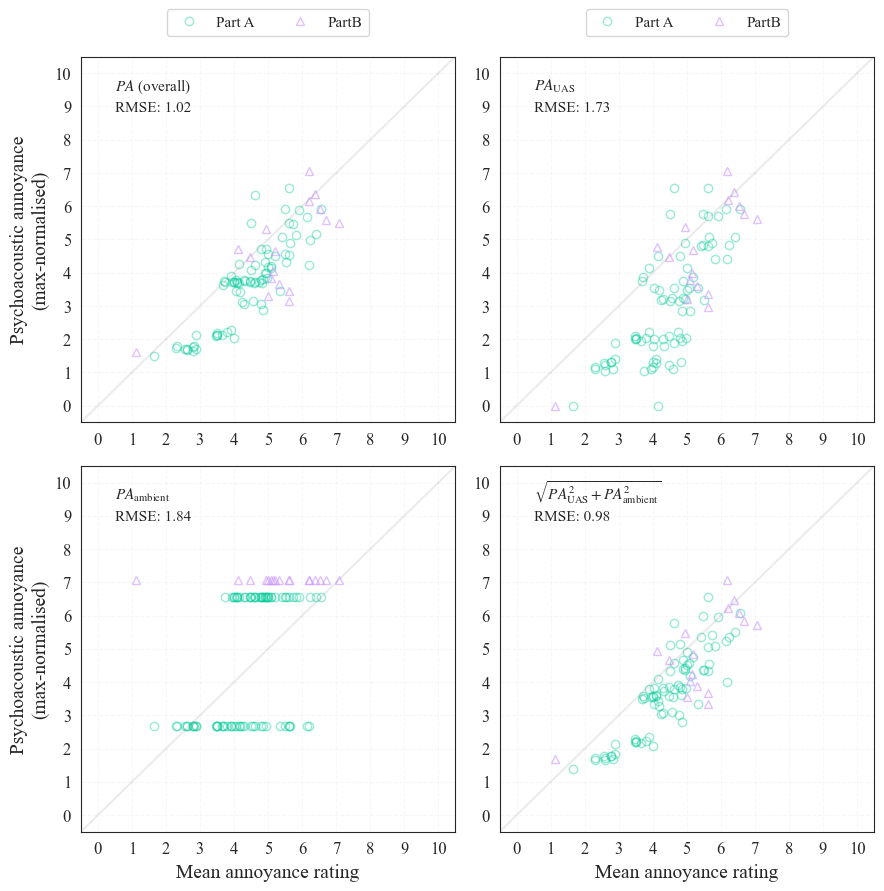

In [101]:
# plot results for Widmann model

# mean
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]

    axCoords = [(0, 0), (0, 1), (1, 0), (1, 1)][ii]
    
    axs[axCoords].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[1],
                 alpha=0.4)
    
    axs[axCoords].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[5],
                 alpha=0.6)

    axs[axCoords].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                      yticks=range(0, 11), ylim=[-0.5, 10.5])

    axs[axCoords].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[axCoords].grid(alpha=0.15, linestyle='--')

    axs[axCoords].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\it{PA}_\\text{ambient}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[axCoords].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["Widmann_1", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0 or ii == 2:
        axs[axCoords].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")

    if ii == 2 or ii == 3:
        axs[axCoords].set(xlabel="Mean annoyance rating")


    if ii == 0 or ii == 1:
        axs[axCoords].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

# if saveplots:
#     plt.savefig(os.path.join(outFigPath, "svg", "PAWidmannMean_1.svg"),
#                 format='svg')
#     plt.savefig(os.path.join(outFigPath, "pdf", "PAWidmannMean_1.pdf"),
#                 format='pdf')

plt.show()


#### More psychoacoustic annoyance

In [ ]:
inputSQMs = {'loudness' : 'LoudISO105ExMaxLR',
             'sharpness' : 'SharpvBISO105ExMaxLR',
             'roughness' : 'RoughFZ05ExMaxLR',
             'fluctstr' : 'FluctFZ05ExMaxLR',
             'tonality' : 'TonalAur05ExMaxLR',
             'impulsivity' : None}

##### Part A

In [50]:
# calculate overall psychoacoustic annoyance
paPtAMore_1 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                           sharpness=dataByStimTestA[inputSQMs['sharpness']],
                           roughness=dataByStimTestA[inputSQMs['roughness']],
                           fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                           tonality=dataByStimTestA[inputSQMs['tonality']],
                           impulsivity=None,
                           method='more')

panPtAMore_1 = pd.DataFrame(paPtAMore_1/paPtAMore_1.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [52]:
# calculate UAS only psychoacoustic annoyance
paPtAUASMore_1 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                            sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                            roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                            fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                            tonality=dataByStimTestA["UAS" + inputSQMs['tonality']],
                            impulsivity=None,
                            method='more')
paPtAUASMore_1.fillna(0, inplace=True)

panPtAMore_1['UASMean'] = paPtAUASMore_1/paPtAUASMore_1.max()*dataByStimTestA['AnnoyMean'].max()

In [53]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbMore_1 = np.sqrt(paPtAUASMore_1**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                           sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                           roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                           fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                           tonality=dataByStimTestA["Amb" + inputSQMs['tonality']],
                                                           impulsivity=None,
                                                          method='more')**2)

panPtAMore_1['UASAmbMean'] = paPtAUASAmbMore_1/paPtAUASAmbMore_1.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [54]:
# calculate overall psychoacoustic annoyance
paPtBMore_1 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                         sharpness=dataByStimTestB[inputSQMs['sharpness']],
                         roughness=dataByStimTestB[inputSQMs['roughness']],
                         fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                         tonality=dataByStimTestB[inputSQMs['tonality']],
                         impulsivity=None,
                         method='more')

panPtBMore_1 = pd.DataFrame(paPtBMore_1/paPtBMore_1.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [55]:
# calculate UAS only psychoacoustic annoyance
paPtBUASMore_1 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                            sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                            roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                            fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                            tonality=dataByStimTestB["UAS" + inputSQMs['tonality']],
                            impulsivity=None,
                            method='more')
paPtBUASMore_1.fillna(0, inplace=True)

panPtBMore_1['UASMean'] = paPtBUASMore_1/paPtBUASMore_1.max()*dataByStimTestB['AnnoyMean'].max()

In [56]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbMore_1 = np.sqrt(paPtBUASMore_1**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                           sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                           roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                           fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                           tonality=dataByStimTestB["Amb" + inputSQMs['tonality']],
                                                           impulsivity=None,
                                                           method='more')**2)

panPtBMore_1['UASAmbMean'] = paPtBUASAmbMore_1/paPtBUASAmbMore_1.max()*dataByStimTestB['AnnoyMean'].max()

In [57]:
datasetsAMean = [panPtAMore_1['OvallMean'], panPtAMore_1['UASMean'], panPtAMore_1['UASAmbMean']]
datasetsBMean = [panPtBMore_1['OvallMean'], panPtBMore_1['UASMean'], panPtBMore_1['UASAmbMean']]


##### Model error

In [58]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["More_1", paRMSEMean.columns[ii]] = RMSE

##### Plot results

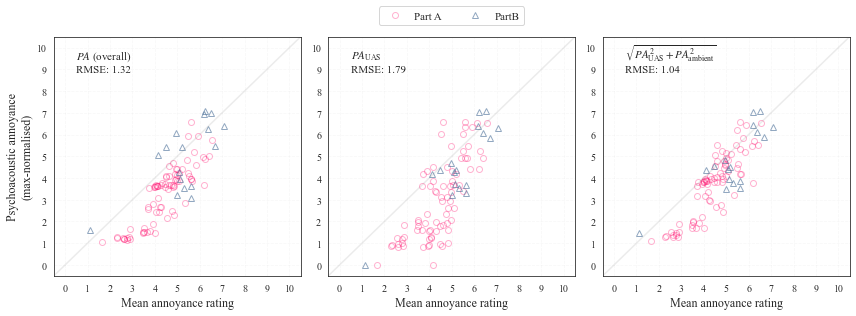

In [59]:
# plot results for More model

# mean
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    axs[ii].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[2],
                 alpha=0.3)
    
    axs[ii].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[3],
                 alpha=0.6)

    axs[ii].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                yticks=range(0, 11), ylim=[-0.5, 10.5],
                xlabel="Mean annoyance rating")

    axs[ii].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[ii].grid(alpha=0.15, linestyle='--')

    axs[ii].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[ii].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["More_1", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0:
        axs[ii].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")

    if ii == 1:
        axs[ii].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "PAMoreMean_1.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "PAMoreMean_1.pdf"),
                format='pdf')

plt.show()


#### Di psychoacoustic annoyance

In [ ]:
inputSQMs = {'loudness' : 'LoudISO105ExMaxLR',
             'sharpness' : 'SharpAurISO105ExMaxLR',
             'roughness' : 'RoughECMAAvgBin',
             'fluctstr' : 'FluctOldSHMAvgBin',
             'tonality' : 'TonalAurAvgMaxLR',
             'impulsivity' : None}

##### Part A

In [61]:
# calculate overall psychoacoustic annoyance
paPtADi_1 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                       sharpness=dataByStimTestA[inputSQMs['sharpness']],
                       roughness=dataByStimTestA[inputSQMs['roughness']],
                       fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                       tonality=dataByStimTestA[inputSQMs['tonality']],
                       impulsivity=None,
                       method='di')

panPtADi_1 = pd.DataFrame(paPtADi_1/paPtADi_1.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [64]:
# calculate UAS only psychoacoustic annoyance
paPtAUASDi_1 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                          sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                          roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                          fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                          tonality=dataByStimTestA["UAS" + inputSQMs['tonality']],
                          impulsivity=None,
                          method='di')
paPtAUASDi_1.fillna(0, inplace=True)

panPtADi_1['UASMean'] = paPtAUASDi_1/paPtAUASDi_1.max()*dataByStimTestA['AnnoyMean'].max()

In [63]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbDi_1 = np.sqrt(paPtAUASDi_1**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                       sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                       roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                       fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                       tonality=dataByStimTestA["Amb" + inputSQMs['tonality']],
                                                       impulsivity=None,
                                                       method='di')**2)

panPtADi_1['UASAmbMean'] = paPtAUASAmbDi_1/paPtAUASAmbDi_1.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [65]:
# calculate overall psychoacoustic annoyance
paPtBDi_1 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                       sharpness=dataByStimTestB[inputSQMs['sharpness']],
                       roughness=dataByStimTestB[inputSQMs['roughness']],
                       fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                       tonality=dataByStimTestB[inputSQMs['tonality']],
                       impulsivity=None,
                       method='di')

panPtBDi_1 = pd.DataFrame(paPtBDi_1/paPtBDi_1.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [66]:
# calculate UAS only psychoacoustic annoyance
paPtBUASDi_1 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                          sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                          roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                          fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                          tonality=dataByStimTestB["UAS" + inputSQMs['tonality']],
                          impulsivity=None,
                          method='di')
paPtBUASDi_1.fillna(0, inplace=True)

panPtBDi_1['UASMean'] = paPtBUASDi_1/paPtBUASDi_1.max()*dataByStimTestB['AnnoyMean'].max()

In [67]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbDi_1 = np.sqrt(paPtBUASDi_1**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                       sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                       roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                       fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                       tonality=dataByStimTestB["Amb" + inputSQMs['tonality']],
                                                       impulsivity=None,
                                                       method='di')**2)

panPtBDi_1['UASAmbMean'] = paPtBUASAmbDi_1/paPtBUASAmbDi_1.max()*dataByStimTestB['AnnoyMean'].max()

In [68]:
datasetsAMean = [panPtADi_1['OvallMean'], panPtADi_1['UASMean'], panPtADi_1['UASAmbMean']]
datasetsBMean = [panPtBDi_1['OvallMean'], panPtBDi_1['UASMean'], panPtBDi_1['UASAmbMean']]


##### Model error

In [69]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["Di_1", paRMSEMean.columns[ii]] = RMSE

##### Plot results

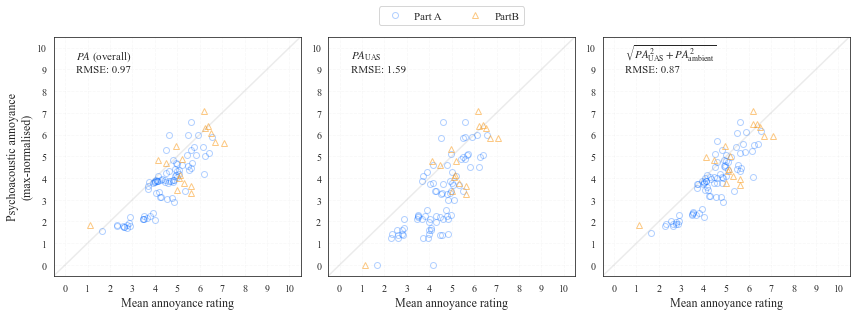

In [70]:
# plot results for Di model

# mean
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    axs[ii].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[0],
                 alpha=0.3)
    
    axs[ii].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[4],
                 alpha=0.6)

    axs[ii].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                yticks=range(0, 11), ylim=[-0.5, 10.5],
                xlabel="Mean annoyance rating")

    axs[ii].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[ii].grid(alpha=0.15, linestyle='--')

    axs[ii].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[ii].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["Di_1", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0:
        axs[ii].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")


    if ii == 1:
        axs[ii].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "PADiMean_1.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "PADiMean_1.pdf"),
                format='pdf')

plt.show()


#### Torija psychoacoustic annoyance

In [ ]:
inputSQMs = {'loudness' : 'LoudISO105ExMaxLR',
             'sharpness' : 'SharpDIN05ExMaxLR',
             'roughness' : 'RoughECMA05ExBin',
             'fluctstr' : 'FluctOldSHM05ExBin',
             'tonality' : 'TonalAur05ExMaxLR',
             'impulsivity' : 'ImpulsSHM05ExMaxLR'}

##### Part A

In [13]:
# calculate overall psychoacoustic annoyance
paPtATorija_1 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                           sharpness=dataByStimTestA[inputSQMs['sharpness']],
                           roughness=dataByStimTestA[inputSQMs['roughness']],
                           fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                           tonality=dataByStimTestA[inputSQMs['tonality']],
                           impulsivity=dataByStimTestA[inputSQMs['impulsivity']],
                           method='torija')

panPtATorija_1 = pd.DataFrame(paPtATorija_1/paPtATorija_1.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [196]:
# calculate UAS only psychoacoustic annoyance
paPtAUASTorija_1 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                              sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                              roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                              fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                              tonality=dataByStimTestA["UAS" + inputSQMs['tonality']],
                              impulsivity=dataByStimTestA["UAS" + inputSQMs['impulsivity']],
                              method='torija')
paPtAUASTorija_1.fillna(0, inplace=True)

panPtATorija_1['UASMean'] = paPtAUASTorija_1/paPtAUASTorija_1.max()*dataByStimTestA['AnnoyMean'].max()

In [197]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbTorija_1 = np.sqrt(paPtAUASTorija_1**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                               sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                               roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                               fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                               tonality=dataByStimTestA["Amb" + inputSQMs['tonality']],
                                                               impulsivity=dataByStimTestA["Amb" + inputSQMs['impulsivity']],
                                                               method='torija')**2)

panPtATorija_1['UASAmbMean'] = paPtAUASAmbTorija_1/paPtAUASAmbTorija_1.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [200]:
# calculate overall psychoacoustic annoyance
paPtBTorija_1 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                           sharpness=dataByStimTestB[inputSQMs['sharpness']],
                           roughness=dataByStimTestB[inputSQMs['roughness']],
                           fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                           tonality=dataByStimTestB[inputSQMs['tonality']],
                           impulsivity=dataByStimTestB[inputSQMs['impulsivity']],
                           method='torija')

panPtBTorija_1 = pd.DataFrame(paPtBTorija_1/paPtBTorija_1.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [201]:
# calculate UAS only psychoacoustic annoyance
paPtBUASTorija_1 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                              sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                              roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                              fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                              tonality=dataByStimTestB["UAS" + inputSQMs['tonality']],
                              impulsivity=dataByStimTestB["UAS" + inputSQMs['impulsivity']],
                              method='torija')
paPtBUASTorija_1.fillna(0, inplace=True)

panPtBTorija_1['UASMean'] = paPtBUASTorija_1/paPtBUASTorija_1.max()*dataByStimTestB['AnnoyMean'].max()

In [202]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbTorija_1 = np.sqrt(paPtBUASTorija_1**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                               sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                               roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                               fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                               tonality=dataByStimTestB["Amb" + inputSQMs['tonality']],
                                                               impulsivity=dataByStimTestB["Amb" + inputSQMs['impulsivity']],
                                                               method='torija')**2)

panPtBTorija_1['UASAmbMean'] = paPtBUASAmbTorija_1/paPtBUASAmbTorija_1.max()*dataByStimTestB['AnnoyMean'].max()

In [203]:
datasetsAMean = [panPtATorija_1['OvallMean'], panPtATorija_1['UASMean'], panPtATorija_1['UASAmbMean']]
datasetsBMean = [panPtBTorija_1['OvallMean'], panPtBTorija_1['UASMean'], panPtBTorija_1['UASAmbMean']]


##### Model error

In [204]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["Torija_1", paRMSEMean.columns[ii]] = RMSE

##### Plot results

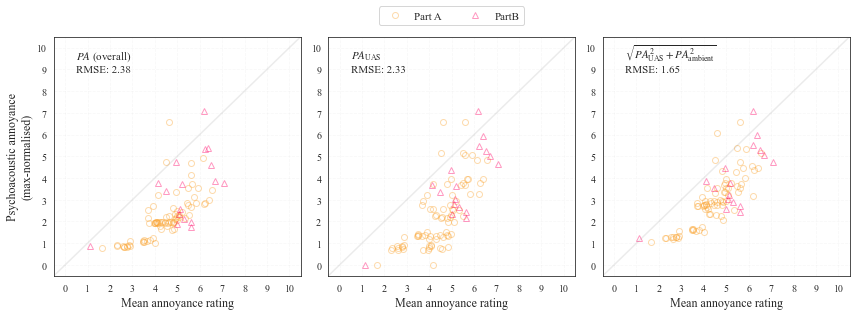

In [205]:
# plot results for Torija model

# mean
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    axs[ii].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[4],
                 alpha=0.4)
    
    axs[ii].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[2],
                 alpha=0.4)

    axs[ii].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                yticks=range(0, 11), ylim=[-0.5, 10.5],
                xlabel="Mean annoyance rating")

    axs[ii].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[ii].grid(alpha=0.15, linestyle='--')

    axs[ii].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[ii].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["Torija_1", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0:
        axs[ii].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")


    if ii == 1:
        axs[ii].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "PATorijaMean_1.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "PATorijaMean_1.pdf"),
                format='pdf')

plt.show()


#### Widmann psychoacoustic annoyance with new input metrics

In [ ]:
inputSQMs = {'loudness' : 'LoudECMAPowAvgBin',
             'sharpness' : 'SharpAurISO305ExMaxLR',
             'roughness' : 'RoughFZ05ExMaxLR',
             'fluctstr' : 'FluctECMA10ExMaxLR',
             'tonality' : None,
             'impulsivity' : None}

##### Part A

In [90]:
# calculate overall psychoacoustic annoyance
paPtAWidmann_2 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                            sharpness=dataByStimTestA[inputSQMs['sharpness']],
                            roughness=dataByStimTestA[inputSQMs['roughness']],
                            fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                            tonality=None,
                            impulsivity=None,
                            method='widmann')

panPtAWidmann_2 = pd.DataFrame(paPtAWidmann_2/paPtAWidmann_2.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [91]:
# calculate UAS only psychoacoustic annoyance
paPtAUASWidmann_2 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                               sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                               roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                               fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                               tonality=None,
                               impulsivity=None,
                               method='widmann')
paPtAUASWidmann_2.fillna(0, inplace=True)

panPtAWidmann_2['UASMean'] = paPtAUASWidmann_2/paPtAUASWidmann_2.max()*dataByStimTestA['AnnoyMean'].max()

In [92]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbWidmann_2 = np.sqrt(paPtAUASWidmann_2**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                                 sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                                 roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                                 fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                                 tonality=None,
                                                                 impulsivity=None,
                                                                 method='widmann')**2)

panPtAWidmann_2['UASAmbMean'] = paPtAUASAmbWidmann_2/paPtAUASAmbWidmann_2.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [93]:
# calculate overall psychoacoustic annoyance
paPtBWidmann_2 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                            sharpness=dataByStimTestB[inputSQMs['sharpness']],
                            roughness=dataByStimTestB[inputSQMs['roughness']],
                            fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                            tonality=None,
                            impulsivity=None,
                            method='widmann')

panPtBWidmann_2 = pd.DataFrame(paPtBWidmann_2/paPtBWidmann_2.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [94]:
# calculate UAS only psychoacoustic annoyance
paPtBUASWidmann_2 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                               sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                               roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                               fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                               tonality=None,
                               impulsivity=None,
                               method='widmann')
paPtBUASWidmann_2.fillna(0, inplace=True)

panPtBWidmann_2['UASMean'] = paPtBUASWidmann_2/paPtBUASWidmann_2.max()*dataByStimTestB['AnnoyMean'].max()

In [95]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbWidmann_2 = np.sqrt(paPtBUASWidmann_2**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                                 sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                                 roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                                 fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                                 tonality=None,
                                                                 impulsivity=None,
                                                                 method='widmann')**2)

panPtBWidmann_2['UASAmbMean'] = paPtBUASAmbWidmann_2/paPtBUASAmbWidmann_2.max()*dataByStimTestB['AnnoyMean'].max()

In [96]:
datasetsAMean = [panPtAWidmann_2['OvallMean'], panPtAWidmann_2['UASMean'], panPtAWidmann_2['UASAmbMean']]
datasetsBMean = [panPtBWidmann_2['OvallMean'], panPtBWidmann_2['UASMean'], panPtBWidmann_2['UASAmbMean']]

##### Model error

In [97]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["Widmann_2", paRMSEMean.columns[ii]] = RMSE

##### Plot results

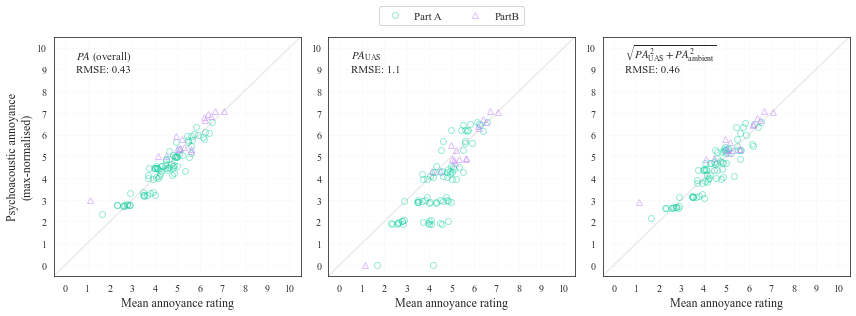

In [98]:
# plot results for Widmann model

# mean
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    axs[ii].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[1],
                 alpha=0.4)
    
    axs[ii].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[5],
                 alpha=0.6)

    axs[ii].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                yticks=range(0, 11), ylim=[-0.5, 10.5],
                xlabel="Mean annoyance rating")

    axs[ii].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[ii].grid(alpha=0.15, linestyle='--')

    axs[ii].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[ii].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["Widmann_2", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0:
        axs[ii].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")


    if ii == 1:
        axs[ii].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "PAWidmannMean_2.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "PAWidmannMean_2.pdf"),
                format='pdf')

plt.show()


#### More psychoacoustic annoyance with new input metrics

In [ ]:
inputSQMs = {'loudness' : 'LoudECMAPowAvgBin',
             'sharpness' : 'SharpAurISO305ExMaxLR',
             'roughness' : 'RoughFZ05ExMaxLR',
             'fluctstr' : 'FluctECMA10ExMaxLR',
             'tonality' : 'TonalSHMInt05ExMaxLR',
             'impulsivity' : None}

##### Part A

In [100]:
# calculate overall psychoacoustic annoyance
paPtAMore_2 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                         sharpness=dataByStimTestA[inputSQMs['sharpness']],
                         roughness=dataByStimTestA[inputSQMs['roughness']],
                         fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                         tonality=dataByStimTestA[inputSQMs['tonality']],
                         impulsivity=None,
                         method='more')

panPtAMore_2 = pd.DataFrame(paPtAMore_2/paPtAMore_2.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [101]:
# calculate UAS only psychoacoustic annoyance
paPtAUASMore_2 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                            sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                            roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                            fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                            tonality=dataByStimTestA["UAS" + inputSQMs['tonality']],
                            impulsivity=None,
                            method='more')
paPtAUASMore_2.fillna(0, inplace=True)

panPtAMore_2['UASMean'] = paPtAUASMore_2/paPtAUASMore_2.max()*dataByStimTestA['AnnoyMean'].max()

In [102]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbMore_2 = np.sqrt(paPtAUASMore_2**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                           sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                           roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                           fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                           tonality=dataByStimTestA["Amb" + inputSQMs['tonality']],
                                                           impulsivity=None,
                                                           method='more')**2)

panPtAMore_2['UASAmbMean'] = paPtAUASAmbMore_2/paPtAUASAmbMore_2.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [103]:
# calculate overall psychoacoustic annoyance
paPtBMore_2 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                         sharpness=dataByStimTestB[inputSQMs['sharpness']],
                         roughness=dataByStimTestB[inputSQMs['roughness']],
                         fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                         tonality=dataByStimTestB[inputSQMs['tonality']],
                         impulsivity=None,
                         method='more')

panPtBMore_2 = pd.DataFrame(paPtBMore_2/paPtBMore_2.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [104]:
# calculate UAS only psychoacoustic annoyance
paPtBUASMore_2 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                            sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                            roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                            fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                            tonality=dataByStimTestB["UAS" + inputSQMs['tonality']],
                            impulsivity=None,
                            method='more')
paPtBUASMore_2.fillna(0, inplace=True)

panPtBMore_2['UASMean'] = paPtBUASMore_2/paPtBUASMore_2.max()*dataByStimTestB['AnnoyMean'].max()

In [107]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbMore_2 = np.sqrt(paPtBUASMore_2**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                           sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                           roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                           fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                           tonality=dataByStimTestB["Amb" + inputSQMs['tonality']],
                                                           impulsivity=None,
                                                           method='more')**2)

panPtBMore_2['UASAmbMean'] = paPtBUASAmbMore_2/paPtBUASAmbMore_2.max()*dataByStimTestB['AnnoyMean'].max()

In [106]:
datasetsAMean = [panPtAMore_2['OvallMean'], panPtAMore_2['UASMean'], panPtAMore_2['UASAmbMean']]
datasetsBMean = [panPtBMore_2['OvallMean'], panPtBMore_2['UASMean'], panPtBMore_2['UASAmbMean']]


##### Model error

In [108]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["More_2", paRMSEMean.columns[ii]] = RMSE

##### Plot results

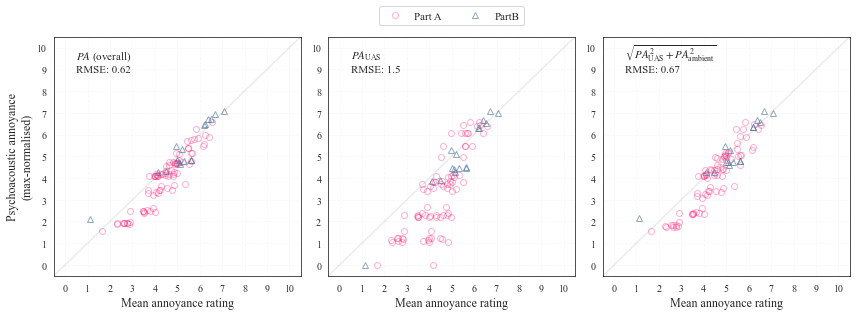

In [109]:
# plot results for More model

# mean
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    axs[ii].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[2],
                 alpha=0.3)
    
    axs[ii].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[3],
                 alpha=0.6)

    axs[ii].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                yticks=range(0, 11), ylim=[-0.5, 10.5],
                xlabel="Mean annoyance rating")

    axs[ii].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[ii].grid(alpha=0.15, linestyle='--')

    axs[ii].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[ii].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["More_2", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0:
        axs[ii].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")


    if ii == 1:
        axs[ii].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "PAMoreMean_2.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "PAMoreMean_2.pdf"),
                format='pdf')

plt.show()


#### Di psychoacoustic annoyance with new input metrics

In [ ]:
inputSQMs = {'loudness' : 'LoudECMAPowAvgBin',
             'sharpness' : 'SharpAurISO305ExMaxLR',
             'roughness' : 'RoughFZ05ExMaxLR',
             'fluctstr' : 'FluctECMA10ExMaxLR',
             'tonality' : 'TonalSHMInt05ExMaxLR',
             'impulsivity' : None}

##### Part A

In [224]:
# calculate overall psychoacoustic annoyance
paPtADi_2 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                       sharpness=dataByStimTestA[inputSQMs['sharpness']],
                       roughness=dataByStimTestA[inputSQMs['roughness']],
                       fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                       tonality=dataByStimTestA[inputSQMs['tonality']],
                       impulsivity=None,
                       method='di')

panPtADi_2 = pd.DataFrame(paPtADi_2/paPtADi_2.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [225]:
# calculate UAS only psychoacoustic annoyance
paPtAUASDi_2 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                          sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                          roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                          fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                          tonality=dataByStimTestA["UAS" + inputSQMs['tonality']],
                          impulsivity=None,
                          method='di')
paPtAUASDi_2.fillna(0, inplace=True)

panPtADi_2['UASMean'] = paPtAUASDi_2/paPtAUASDi_2.max()*dataByStimTestA['AnnoyMean'].max()

In [226]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbDi_2 = np.sqrt(paPtAUASDi_2**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                       sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                       roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                       fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                       tonality=dataByStimTestA["Amb" + inputSQMs['tonality']],
                                                       impulsivity=None,
                                                       method='di')**2)

panPtADi_2['UASAmbMean'] = paPtAUASAmbDi_2/paPtAUASAmbDi_2.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [227]:
# calculate overall psychoacoustic annoyance
paPtBDi_2 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                       sharpness=dataByStimTestB[inputSQMs['sharpness']],
                       roughness=dataByStimTestB[inputSQMs['roughness']],
                       fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                       tonality=dataByStimTestB[inputSQMs['tonality']],
                       impulsivity=None,
                       method='di')

panPtBDi_2 = pd.DataFrame(paPtBDi_2/paPtBDi_2.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [228]:
# calculate UAS only psychoacoustic annoyance
paPtBUASDi_2 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                          sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                          roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                          fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                          tonality=dataByStimTestB["UAS" + inputSQMs['tonality']],
                          impulsivity=None,
                          method='di')
paPtBUASDi_2.fillna(0, inplace=True)

panPtBDi_2['UASMean'] = paPtBUASDi_2/paPtBUASDi_2.max()*dataByStimTestB['AnnoyMean'].max()

In [229]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbDi_2 = np.sqrt(paPtBUASDi_2**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                       sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                       roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                       fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                       tonality=dataByStimTestB["Amb" + inputSQMs['tonality']],
                                                       impulsivity=None,
                                                       method='di')**2)

panPtBDi_2['UASAmbMean'] = paPtBUASAmbDi_2/paPtBUASAmbDi_2.max()*dataByStimTestB['AnnoyMean'].max()

In [230]:
datasetsAMean = [panPtADi_2['OvallMean'], panPtADi_2['UASMean'], panPtADi_2['UASAmbMean']]
datasetsBMean = [panPtBDi_2['OvallMean'], panPtBDi_2['UASMean'], panPtBDi_2['UASAmbMean']]


##### Model error

In [231]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["Di_2", paRMSEMean.columns[ii]] = RMSE

##### Plot results

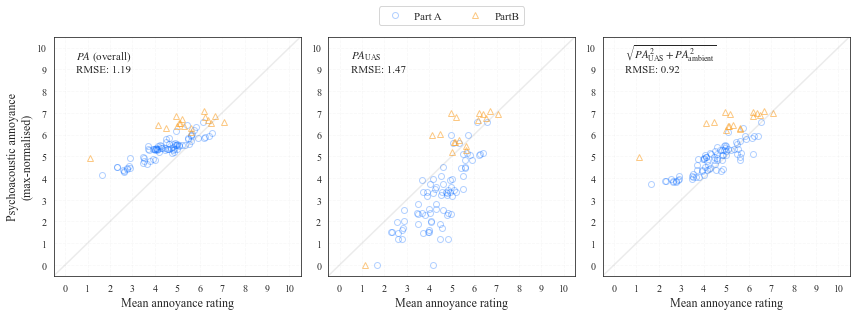

In [232]:
# plot results for Di model

# mean
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    axs[ii].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[0],
                 alpha=0.3)
    
    axs[ii].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[4],
                 alpha=0.6)

    axs[ii].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                yticks=range(0, 11), ylim=[-0.5, 10.5],
                xlabel="Mean annoyance rating")

    axs[ii].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[ii].grid(alpha=0.15, linestyle='--')

    axs[ii].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[ii].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["Di_2", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0:
        axs[ii].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")

    if ii == 1:
        axs[ii].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "PADiMean_2.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "PADiMean_2.pdf"),
                format='pdf')

plt.show()


#### Torija psychoacoustic annoyance with new input metrics

In [ ]:
inputSQMs = {'loudness' : 'LoudECMAPowAvgBin',
             'sharpness' : 'SharpAurISO305ExMaxLR',
             'roughness' : 'RoughFZ05ExMaxLR',
             'fluctstr' : 'FluctECMA10ExMaxLR',
             'tonality' : 'TonalSHMInt05ExMaxLR',
             'impulsivity' : 'ImpulsSHMAvgMaxLR'}

##### Part A

In [207]:
# calculate overall psychoacoustic annoyance
paPtATorija_2 = psychAnnoy(loudness=dataByStimTestA[inputSQMs['loudness']],
                           sharpness=dataByStimTestA[inputSQMs['sharpness']],
                           roughness=dataByStimTestA[inputSQMs['roughness']],
                           fluctstr=dataByStimTestA[inputSQMs['fluctstr']],
                           tonality=dataByStimTestA[inputSQMs['tonality']],
                           impulsivity=dataByStimTestA[inputSQMs['impulsivity']],
                           method='torija')

panPtATorija_2 = pd.DataFrame(paPtATorija_2/paPtATorija_2.max()*dataByStimTestA['AnnoyMean'].max(), columns=['OvallMean'])

In [208]:
# calculate UAS only psychoacoustic annoyance
paPtAUASTorija_2 = psychAnnoy(loudness=dataByStimTestA["UAS" + inputSQMs['loudness']],
                              sharpness=dataByStimTestA["UAS" + inputSQMs['sharpness']],
                              roughness=dataByStimTestA["UAS" + inputSQMs['roughness']],
                              fluctstr=dataByStimTestA["UAS" + inputSQMs['fluctstr']],
                              tonality=dataByStimTestA["UAS" + inputSQMs['tonality']],
                              impulsivity=dataByStimTestA["UAS" + inputSQMs['impulsivity']],
                              method='torija')
paPtAUASTorija_2.fillna(0, inplace=True)

panPtATorija_2['UASMean'] = paPtAUASTorija_2/paPtAUASTorija_2.max()*dataByStimTestA['AnnoyMean'].max()

In [209]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtAUASAmbTorija_2 = np.sqrt(paPtAUASTorija_2**2 + psychAnnoy(loudness=dataByStimTestA["Amb" + inputSQMs['loudness']],
                                                               sharpness=dataByStimTestA["Amb" + inputSQMs['sharpness']],
                                                               roughness=dataByStimTestA["Amb" + inputSQMs['roughness']],
                                                               fluctstr=dataByStimTestA["Amb" + inputSQMs['fluctstr']],
                                                               tonality=dataByStimTestA["Amb" + inputSQMs['tonality']],
                                                               impulsivity=dataByStimTestA["Amb" + inputSQMs['impulsivity']],
                                                               method='torija')**2)

panPtATorija_2['UASAmbMean'] = paPtAUASAmbTorija_2/paPtAUASAmbTorija_2.max()*dataByStimTestA['AnnoyMean'].max()

##### Part B

In [210]:
# calculate overall psychoacoustic annoyance
paPtBTorija_2 = psychAnnoy(loudness=dataByStimTestB[inputSQMs['loudness']],
                           sharpness=dataByStimTestB[inputSQMs['sharpness']],
                           roughness=dataByStimTestB[inputSQMs['roughness']],
                           fluctstr=dataByStimTestB[inputSQMs['fluctstr']],
                           tonality=dataByStimTestB[inputSQMs['tonality']],
                           impulsivity=dataByStimTestB[inputSQMs['impulsivity']],
                           method='torija')

panPtBTorija_2 = pd.DataFrame(paPtBTorija_2/paPtBTorija_2.max()*dataByStimTestB['AnnoyMean'].max(), columns=['OvallMean'])

In [211]:
# calculate UAS only psychoacoustic annoyance
paPtBUASTorija_2 = psychAnnoy(loudness=dataByStimTestB["UAS" + inputSQMs['loudness']],
                              sharpness=dataByStimTestB["UAS" + inputSQMs['sharpness']],
                              roughness=dataByStimTestB["UAS" + inputSQMs['roughness']],
                              fluctstr=dataByStimTestB["UAS" + inputSQMs['fluctstr']],
                              tonality=dataByStimTestB["UAS" + inputSQMs['tonality']],
                              impulsivity=dataByStimTestB["UAS" + inputSQMs['impulsivity']],
                              method='torija')
paPtBUASTorija_2.fillna(0, inplace=True)

panPtBTorija_2['UASMean'] = paPtBUASTorija_2/paPtBUASTorija_2.max()*dataByStimTestB['AnnoyMean'].max()

In [212]:
# calculate combination of UAS and ambient psychoacoustic annoyance
paPtBUASAmbTorija_2 = np.sqrt(paPtBUASTorija_2**2 + psychAnnoy(loudness=dataByStimTestB["Amb" + inputSQMs['loudness']],
                                                               sharpness=dataByStimTestB["Amb" + inputSQMs['sharpness']],
                                                               roughness=dataByStimTestB["Amb" + inputSQMs['roughness']],
                                                               fluctstr=dataByStimTestB["Amb" + inputSQMs['fluctstr']],
                                                               tonality=dataByStimTestB["Amb" + inputSQMs['tonality']],
                                                               impulsivity=dataByStimTestB["Amb" + inputSQMs['impulsivity']],
                                                               method='torija')**2)

panPtBTorija_2['UASAmbMean'] = paPtBUASAmbTorija_2/paPtBUASAmbTorija_2.max()*dataByStimTestB['AnnoyMean'].max()

In [213]:
datasetsAMean = [panPtATorija_2['OvallMean'], panPtATorija_2['UASMean'], panPtATorija_2['UASAmbMean']]
datasetsBMean = [panPtBTorija_2['OvallMean'], panPtBTorija_2['UASMean'], panPtBTorija_2['UASAmbMean']]


##### Model error

In [214]:
# calculate RMSE

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    RMSE =  np.sqrt(np.square(pd.concat([datasetA, datasetB])
                              - pd.concat([dataByStimTestA['AnnoyMean'], dataByStimTestB['AnnoyMean']])).mean())

    paRMSEMean.loc["Torija_2", paRMSEMean.columns[ii]] = RMSE

##### Plot results

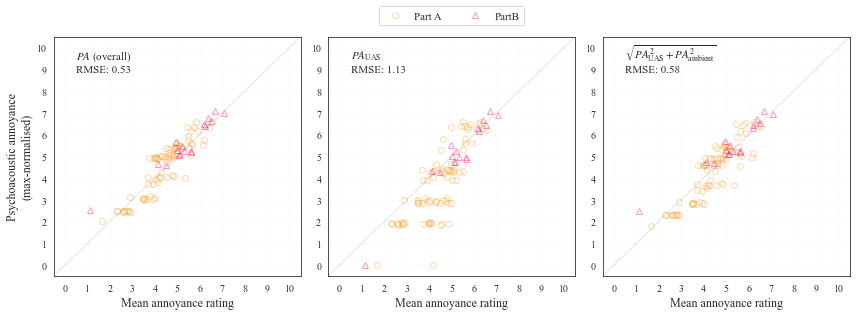

In [215]:
# plot results for Torija model

# mean
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

for ii, datasetA in enumerate(datasetsAMean):
    
    datasetB = datasetsBMean[ii]
    
    axs[ii].plot(dataByStimTestA['AnnoyMean'], datasetA, linestyle='None',
                 marker='o', markerfacecolor='None', markeredgecolor=mycolours[4],
                 alpha=0.4)
    
    axs[ii].plot(dataByStimTestB['AnnoyMean'], datasetB, linestyle='None',
                 marker='^', markerfacecolor='None', markeredgecolor=mycolours[2],
                 alpha=0.4)

    axs[ii].set(xticks=range(0, 11), xlim=[-0.5, 10.5],
                yticks=range(0, 11), ylim=[-0.5, 10.5],
                xlabel="Mean annoyance rating")

    axs[ii].plot(np.arange(-1, 12), np.arange(-1, 12), color=[0.25, 0.25, 0.25], alpha=0.1)
    
    axs[ii].grid(alpha=0.15, linestyle='--')

    axs[ii].text(0.5, 9.5, ["$\\it{PA}$ (overall)", "$\\it{PA}_\\text{UAS}$", "$\\sqrt{\\it{PA}_\\text{UAS}^2 + \\it{PA}_\\text{ambient}^2}$"][ii], fontsize=11)

    axs[ii].text(0.5, 8.85, "RMSE: " + roundTrad(paRMSEMean.loc["Torija_2", paRMSEMean.columns[ii]], 2).astype(str), fontsize=11)

    if ii == 0:
        axs[ii].set(ylabel="Psychoacoustic annoyance" + "\n"  +  "(max-normalised)")


    if ii == 1:
        axs[ii].legend(labels=['Part A', 'PartB'], bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=11)

if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", "PATorijaMean_2.svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", "PATorijaMean_2.pdf"),
                format='pdf')

plt.show()


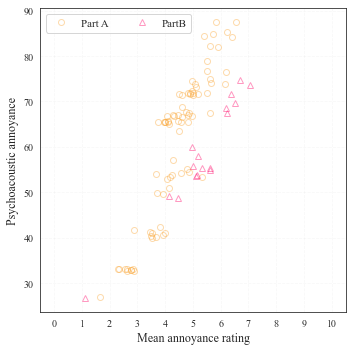

In [216]:
# plot results for Torija model

fig, ax = plt.subplots(figsize=(5, 5))
    
ax.plot(dataByStimTestA['AnnoyMean'], paPtATorija_2, linestyle='None',
             marker='o', markerfacecolor='None', markeredgecolor=mycolours[4],
             alpha=0.4)

ax.plot(dataByStimTestB['AnnoyMean'], paPtBTorija_2, linestyle='None',
             marker='^', markerfacecolor='None', markeredgecolor=mycolours[2],
             alpha=0.4)

ax.set(xticks=range(0, 11), xlim=[-0.5, 10.5],
            xlabel="Mean annoyance rating")

ax.grid(alpha=0.15, linestyle='--')

ax.set(ylabel="Psychoacoustic annoyance")


ax.legend(labels=['Part A', 'PartB'], ncol=2, fontsize=11)

plt.show()


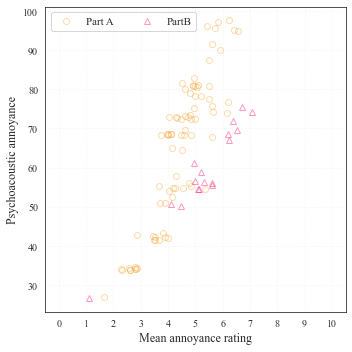

In [217]:
# plot results for Torija model

fig, ax = plt.subplots(figsize=(5, 5))
    
ax.plot(dataByStimTestA['AnnoyMean'], paPtAUASAmbTorija_2, linestyle='None',
             marker='o', markerfacecolor='None', markeredgecolor=mycolours[4],
             alpha=0.4)

ax.plot(dataByStimTestB['AnnoyMean'], paPtBUASAmbTorija_2, linestyle='None',
             marker='^', markerfacecolor='None', markeredgecolor=mycolours[2],
             alpha=0.4)

ax.set(xticks=range(0, 11), xlim=[-0.5, 10.5],
            xlabel="Mean annoyance rating")

ax.grid(alpha=0.15, linestyle='--')

ax.set(ylabel="Psychoacoustic annoyance")


ax.legend(labels=['Part A', 'PartB'], ncol=2, fontsize=11)

plt.show()


## Correlations between UAS SQMs

### Annoyance

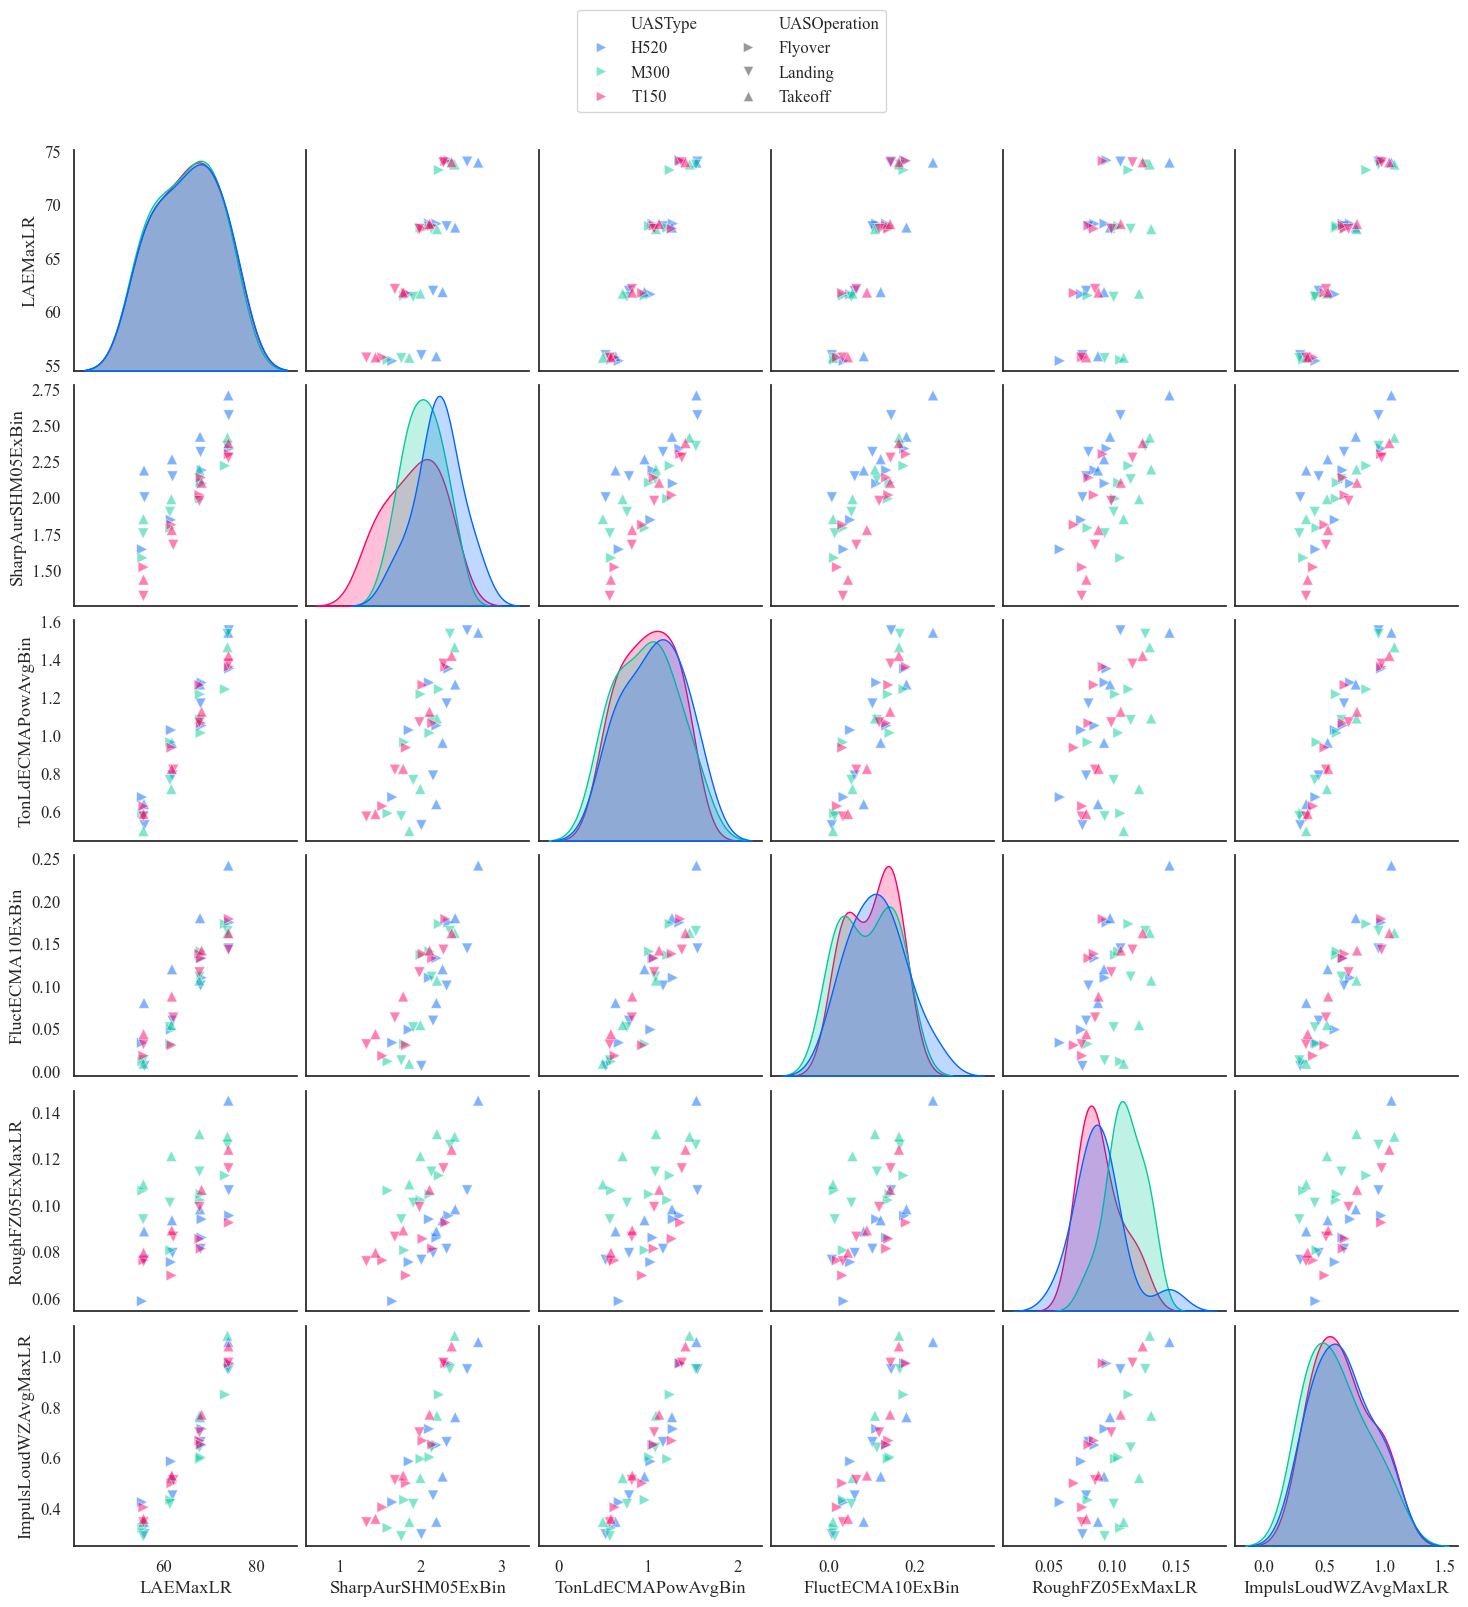

In [ ]:
# pairwise plots for absolute SQMs influencing mean change in annoyance
# using auxData to avoid data duplication, SQMs do not need 'UAS' prefix
metrics = ["LAEMaxLR", "SharpAurSHM05ExMaxLR", "TonLdECMAPowAvgBin",
           "FluctECMA10ExBin", "RoughFZ05ExMaxLR", "ImpulsLoudWZAvgMaxLR"]

map_to_marker = {'Takeoff': '^', 'Overflight': '>', 'Landing': 'v'}

scatter_kws = {'s': 60, 'alpha': 0.5, 'style': auxData['UASOperation'],  'markers': map_to_marker}

sns.set_theme(style='white', font_scale=1.1, font='serif')

pplot = sns.pairplot(data=auxData.loc[auxData['SessionPart']=="A", :],
                     hue="UASType", palette=mycolours[0:3], vars=metrics,
                     corner=False, plot_kws=scatter_kws)


sns.move_legend(
    pplot, loc="upper center", bbox_to_anchor=(0.45, 1.08), title=None, frameon=True, ncols=2
)

filename = "PtASQMdAnnoyPairwise"

if saveplots:
    pplot.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                    format='svg')
    pplot.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                    format='pdf')


sns.set_theme(style='white', font_scale=1)


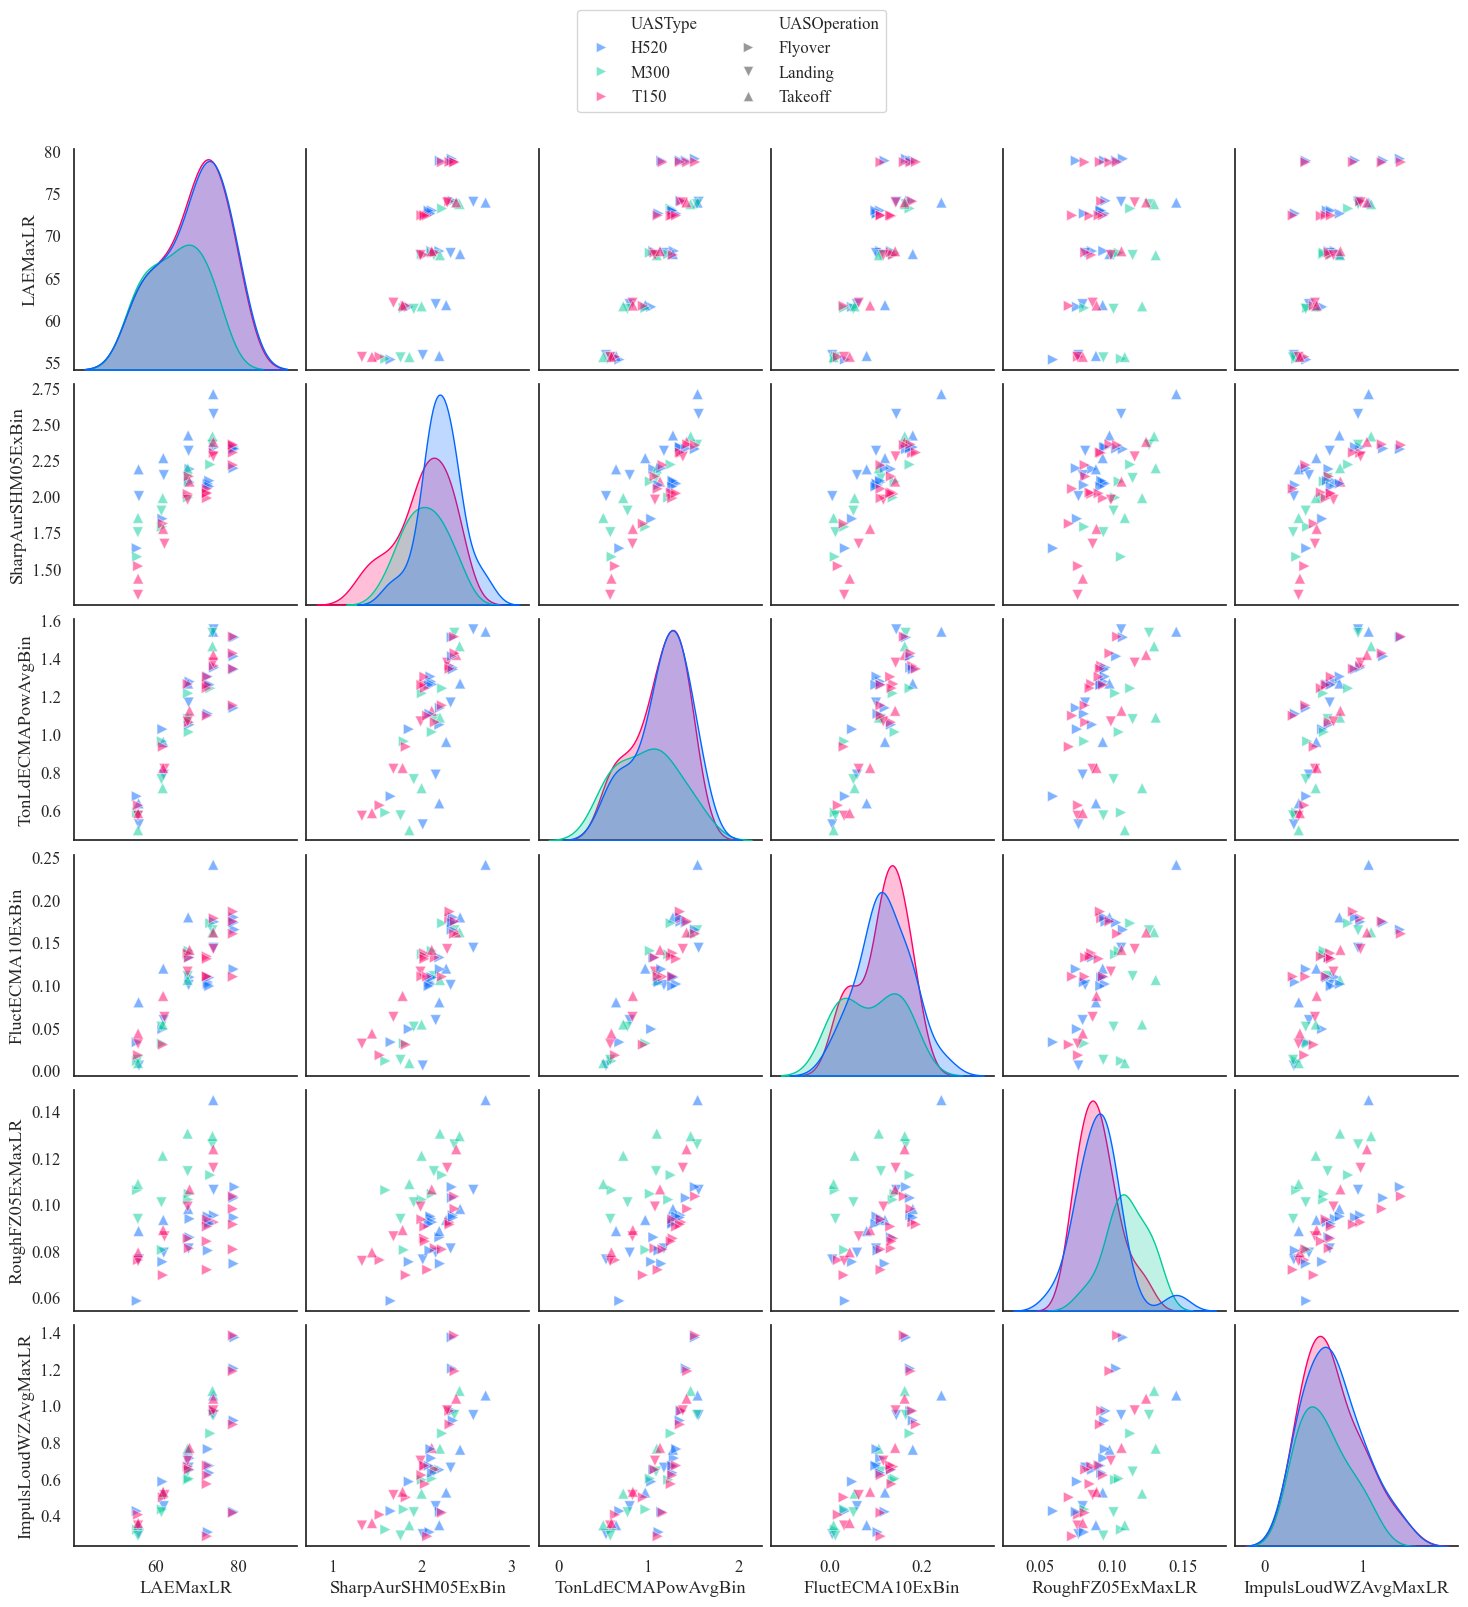

In [ ]:
# pairwise plots for absolute SQMs influencing mean change in annoyance
# using auxData to avoid data duplication, SQMs do not need 'UAS' prefix
metrics = ["LAEMaxLR", "SharpAurSHM05ExMaxLR", "TonLdECMAPowAvgBin",
           "FluctECMA10ExBin", "RoughFZ05ExMaxLR", "ImpulsLoudWZAvgMaxLR"]

map_to_marker = {'Takeoff': '^', 'Overflight': '>', 'Landing': 'v'}

scatter_kws = {'s': 60, 'alpha': 0.5, 'style': auxData['UASOperation'],  'markers': map_to_marker}

sns.set_theme(style='white', font_scale=1.1, font='serif')

pplot = sns.pairplot(data=auxData,
                     hue="UASType", palette=mycolours[0:3], vars=metrics,
                     corner=False, plot_kws=scatter_kws)

sns.move_legend(
    pplot, loc="upper center", bbox_to_anchor=(0.45, 1.08), title=None, frameon=True, ncols=2
)

filename = "PtsABSQMdAnnoyPairwise"

if saveplots:
    pplot.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                    format='svg')
    pplot.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                    format='pdf')


sns.set_theme(style='white', font_scale=1)


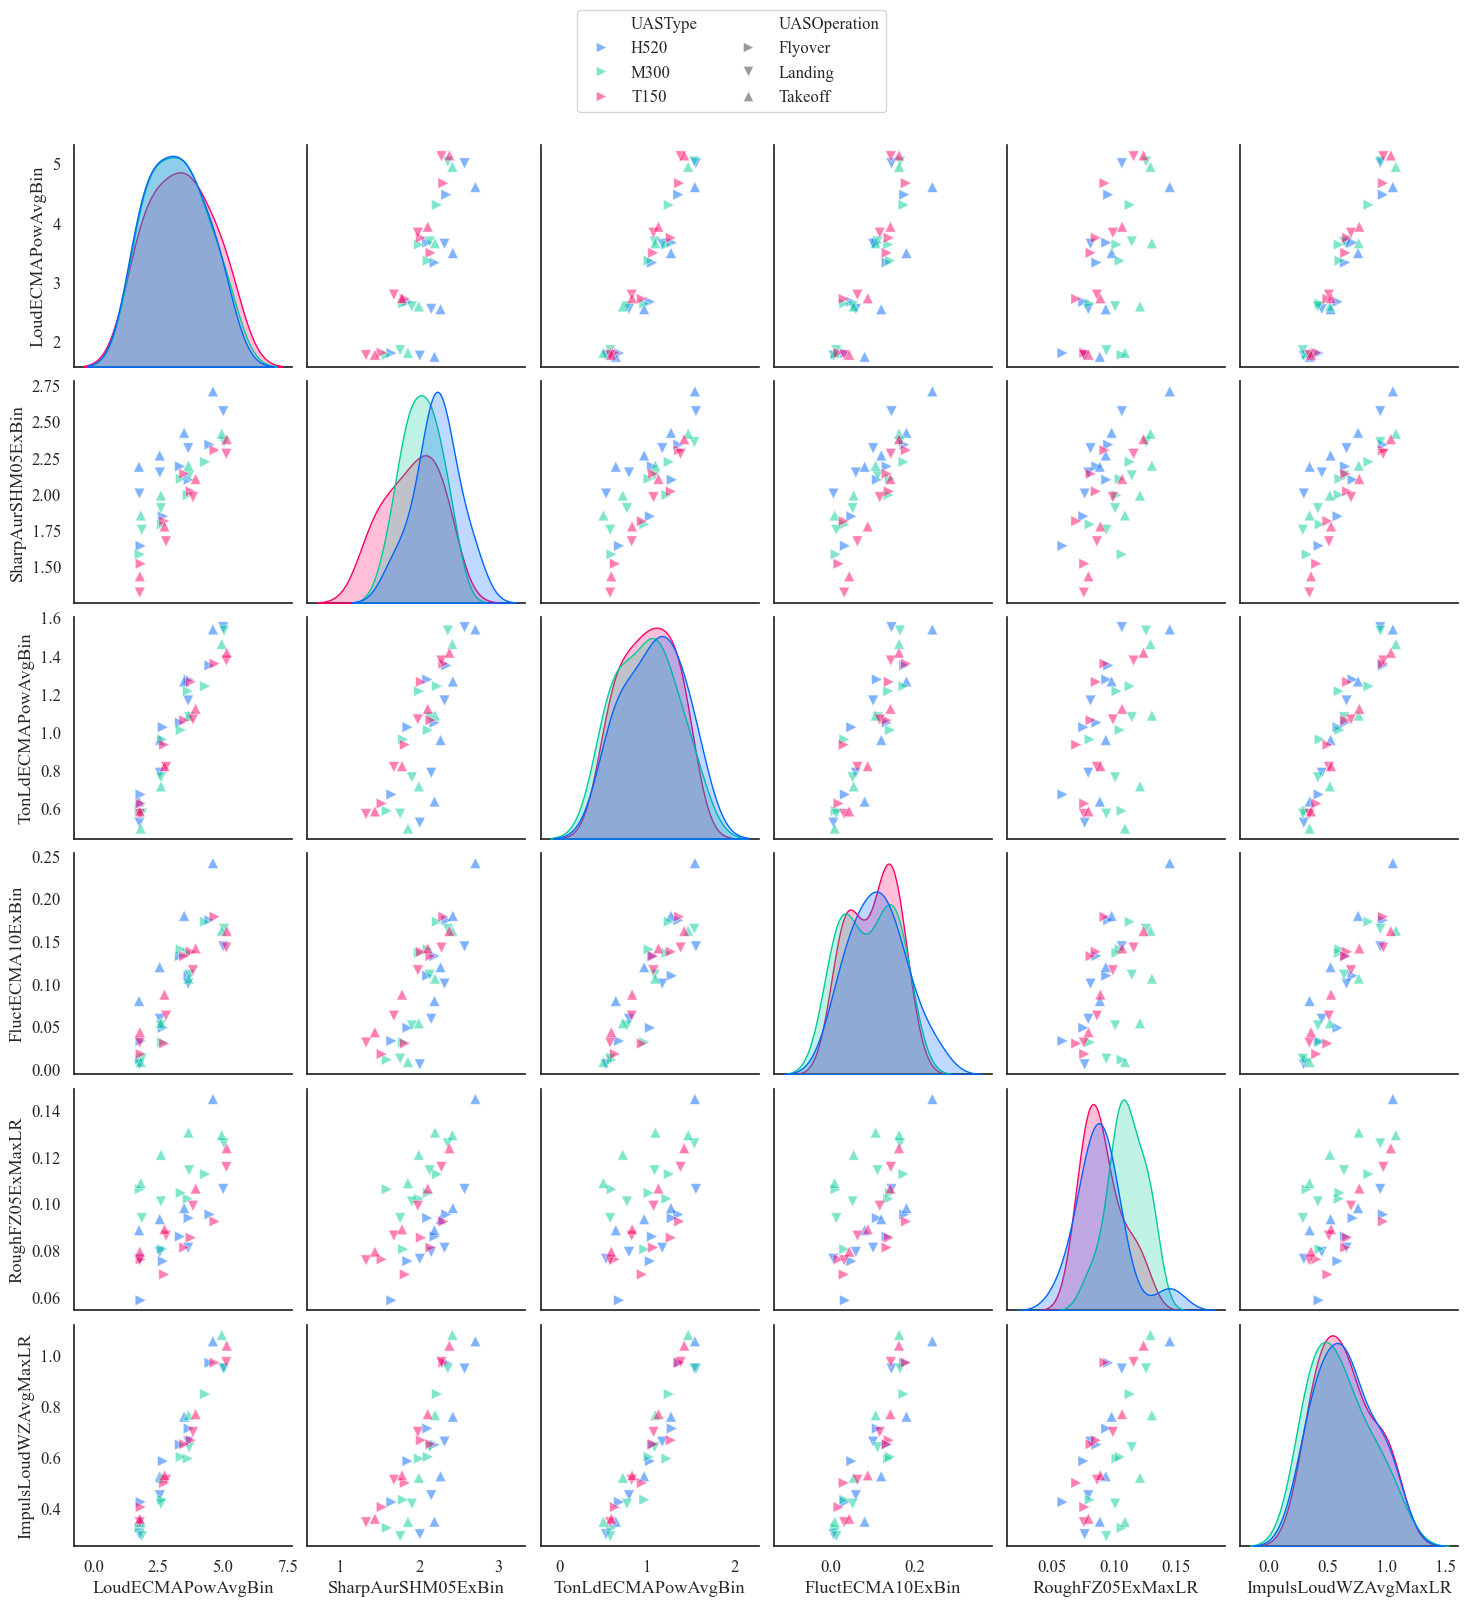

In [ ]:
# pairwise plots for absolute SQMs influencing mean change in annoyance
# using auxData to avoid data duplication, SQMs do not need 'UAS' prefix
metrics = ["LoudECMAPowAvgBin", "SharpAurSHM05ExMaxLR", "TonLdECMAPowAvgBin",
           "FluctECMA10ExBin", "RoughFZ05ExMaxLR", "ImpulsLoudWZAvgMaxLR"]

map_to_marker = {'Takeoff': '^', 'Overflight': '>', 'Landing': 'v'}

scatter_kws = {'s': 60, 'alpha': 0.5, 'style': auxData['UASOperation'],  'markers': map_to_marker}

sns.set_theme(style='white', font_scale=1.1, font='serif')

pplot = sns.pairplot(data=auxData.loc[auxData['SessionPart']=="A", :],
                     hue="UASType", palette=mycolours[0:3], vars=metrics,
                     corner=False, plot_kws=scatter_kws)

sns.move_legend(
    pplot, loc="upper center", bbox_to_anchor=(0.45, 1.08), title=None, frameon=True, ncols=2
)

filename = "PtASQMdAnnoyLoudPairwise"

if saveplots:
    pplot.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                    format='svg')
    pplot.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                    format='pdf')


sns.set_theme(style='white', font_scale=1)

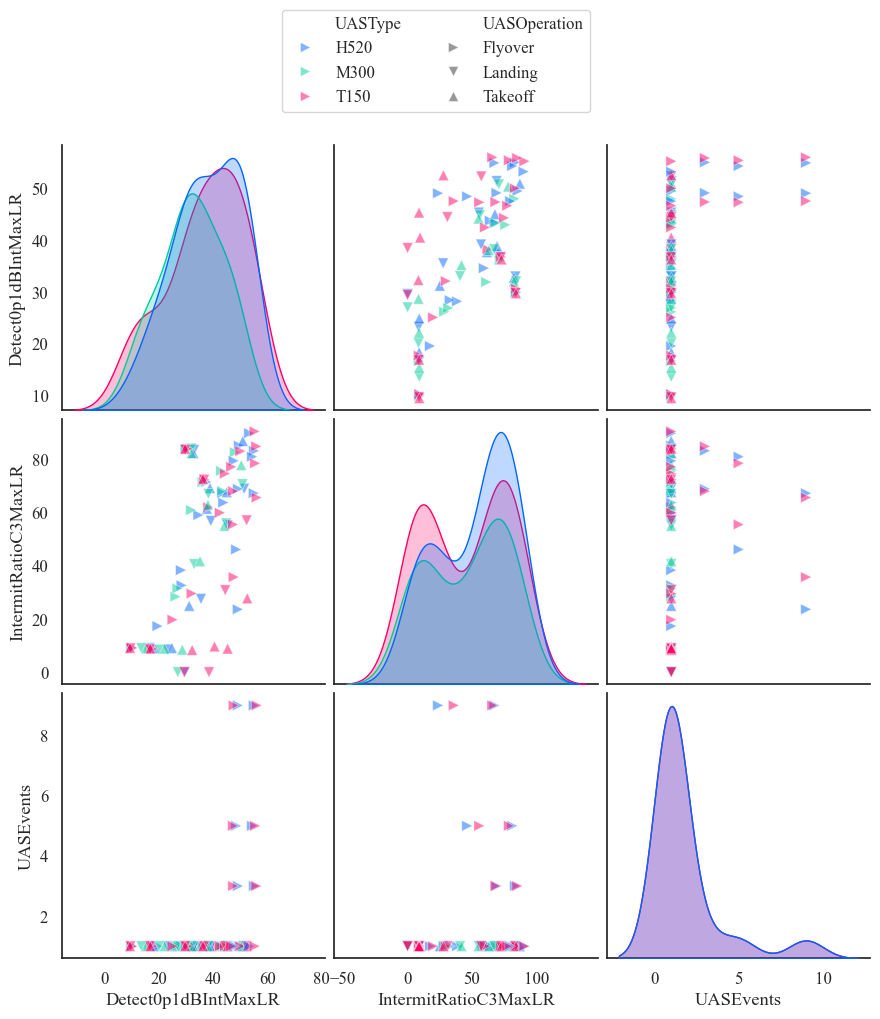

In [ ]:
metrics = ["Detect0p1dBIntMaxLR", "IntermitRatioC3MaxLR", "UASEvents"]

map_to_marker = {'Takeoff': '^', 'Overflight': '>', 'Landing': 'v'}


data = dataByStimTest.loc[dataByStimTest['UASOperation'] != "No UAS", :]

for dataset in [data]:
    dataset['AmbientEnv'] = pd.Categorical(dataset['AmbientEnv'], ["Park", "Street"], ordered=True)
    dataset['SNRlevel'] = pd.Categorical(dataset['SNRlevel'], ["-16", "-10", "-4", "2", "8"], ordered=True)
    dataset['UASLAeq'] = pd.Categorical(dataset['UASLAeq'], ["42", "48", "54", "60"], ordered=True)
    dataset['UASOperation'] = pd.Categorical(dataset['UASOperation'], ["Overflight", "Landing", "Takeoff"], ordered=True)
    dataset['UASType'] = pd.Categorical(dataset['UASType'], ["H520", "M300", "T150"], ordered=True)

map_to_marker = {'Takeoff': '^', 'Overflight': '>', 'Landing': 'v'}

scatter_kws = {'s': 60, 'alpha': 0.5, 'style': data['UASOperation'],
               'markers': map_to_marker}

sns.set_theme(style='white', font_scale=1.1, font='serif')

pplot = sns.pairplot(data=data,
                     hue="UASType", palette=mycolours[0:3], vars=metrics,
                     corner=False, plot_kws=scatter_kws, height=3)

sns.move_legend(
    pplot, loc="upper center", bbox_to_anchor=(0.42, 1.14), title=None, frameon=True, ncols=2
)

filename = "PtsABEvtMetricsdHiAnnoyPairwise"

if saveplots:
    pplot.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                    format='svg')
    pplot.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                    format='pdf')


sns.set_theme(style='white', font_scale=1)

### UAS noticed

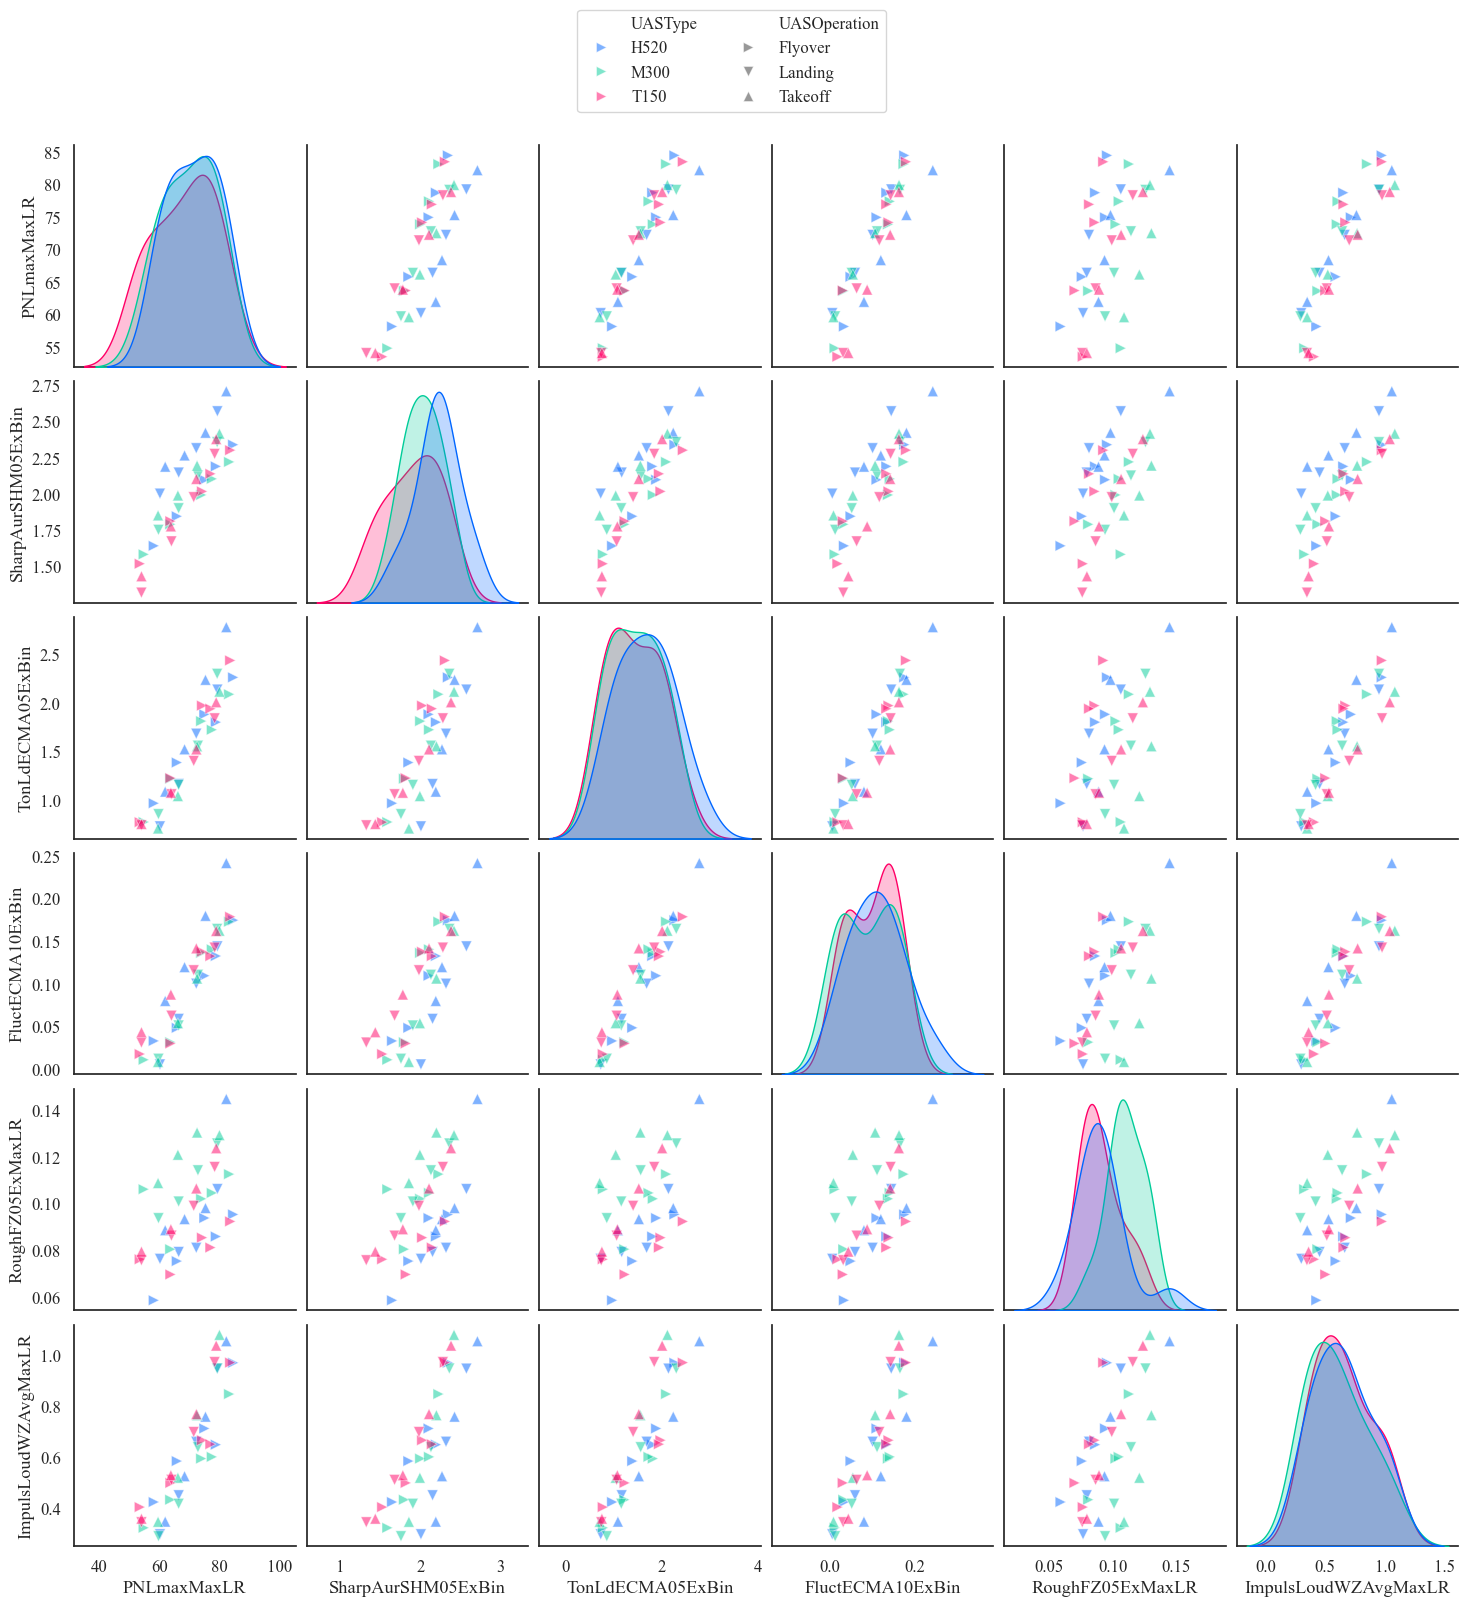

In [ ]:
# pairwise plots for absolute SQMs influencing % UAS noticed
# using auxData to avoid data duplication, SQMs do not need 'UAS' prefix
metrics = ["PNLmaxMaxLR", "SharpAurSHM05ExMaxLR", "TonLdECMA05ExBin",
           "FluctECMA10ExBin", "RoughFZ05ExMaxLR", "ImpulsLoudWZAvgMaxLR"]

map_to_marker = {'Takeoff': '^', 'Overflight': '>', 'Landing': 'v'}

scatter_kws = {'s': 60, 'alpha': 0.5, 'style': auxData['UASOperation'],  'markers': map_to_marker}

sns.set_theme(style='white', font_scale=1.1, font='serif')

pplot = sns.pairplot(data=auxData.loc[auxData['SessionPart']=="A", :], hue="UASType",
                     palette=mycolours[0:3], vars=metrics,
                     corner=False, plot_kws=scatter_kws)

sns.move_legend(
    pplot, loc="upper center", bbox_to_anchor=(0.45, 1.08), title=None, frameon=True, ncols=2
)

filename = "PtASQMNoticePairwise"

if saveplots:
    pplot.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                    format='svg')
    pplot.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                    format='pdf')


sns.set_theme(style='white', font_scale=1)


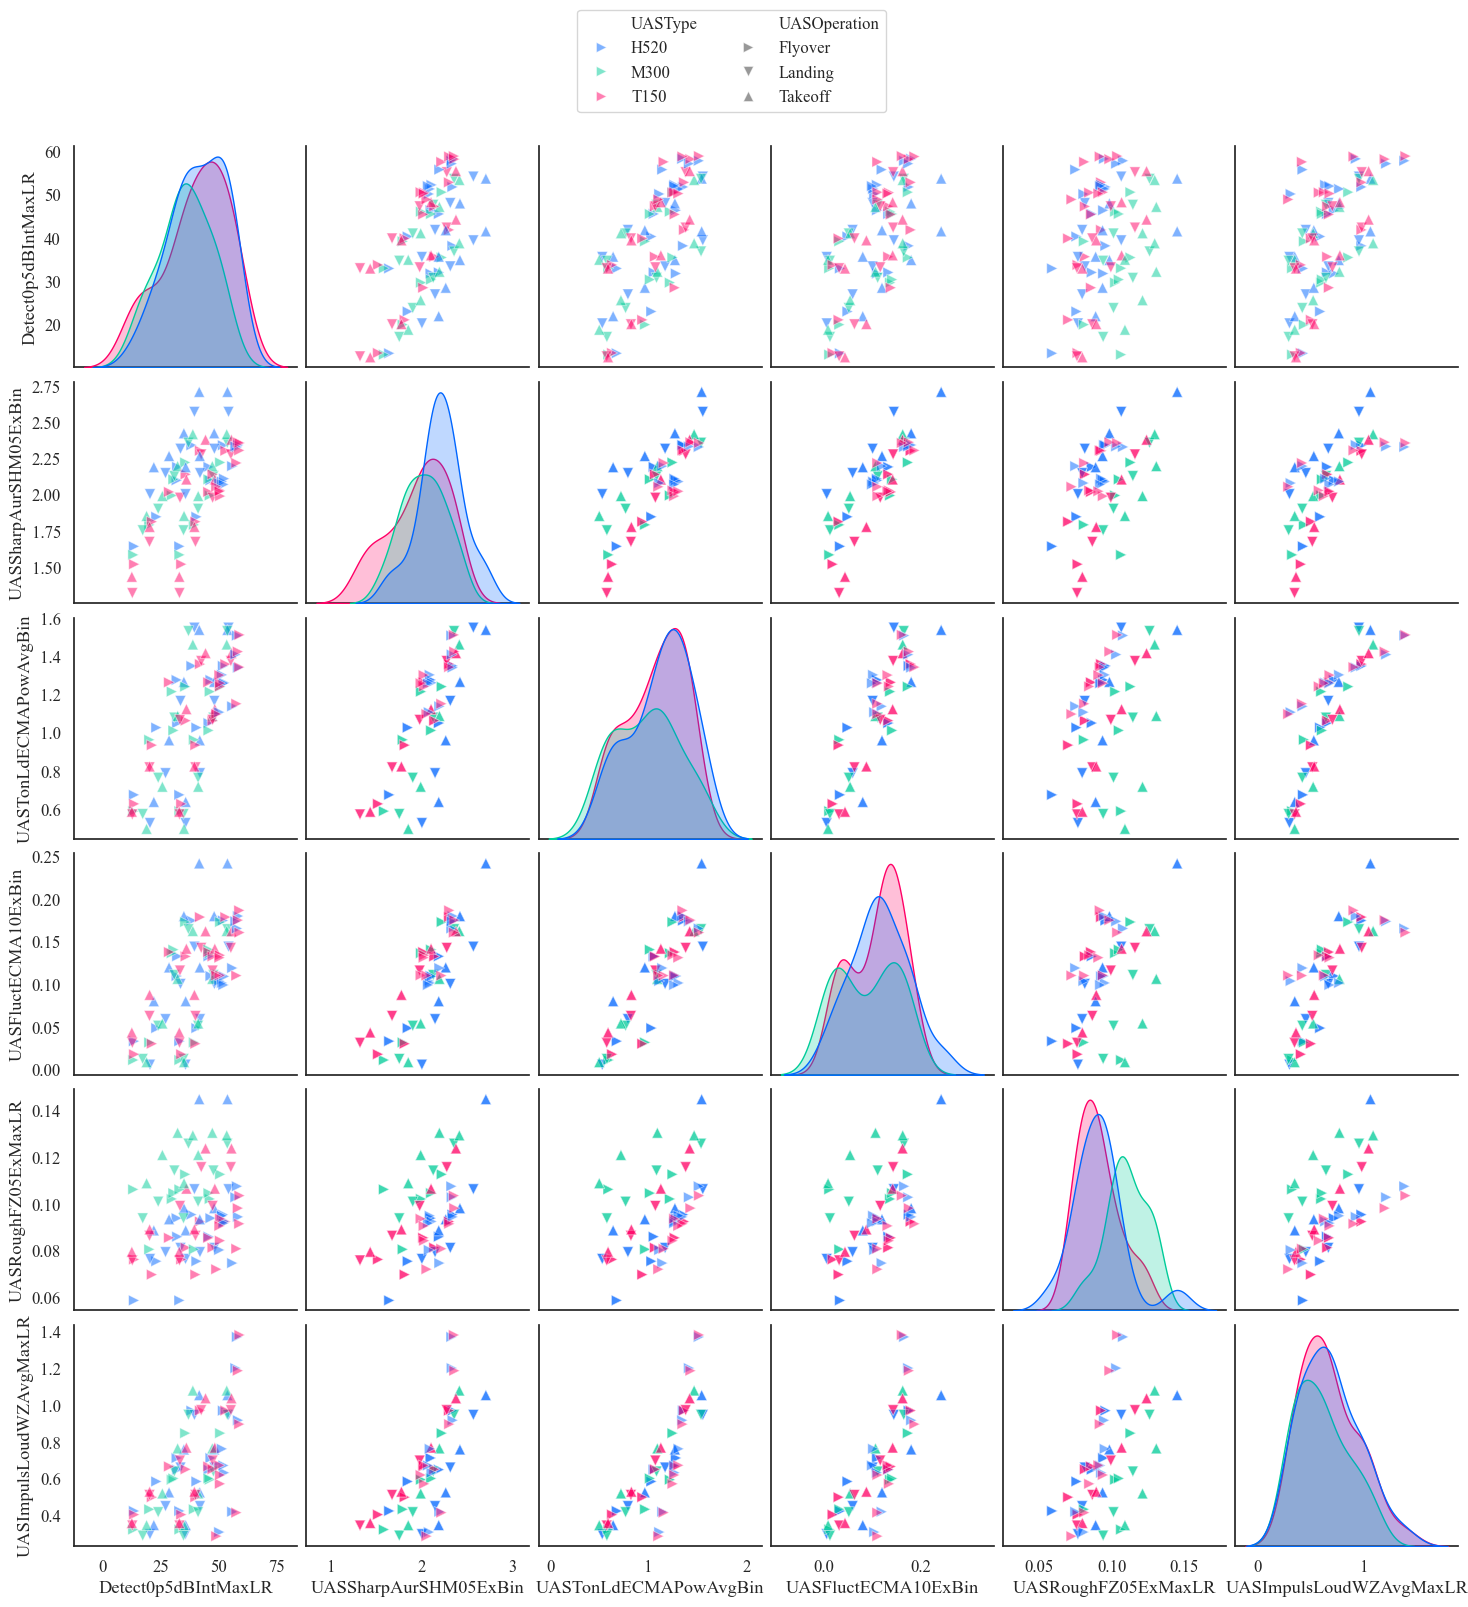

In [ ]:
# pairwise plots for absolute SQMs influencing mean change in annoyance
metrics = ["Detect0p5dBIntMaxLR", "UASSharpAurSHM05ExMaxLR", "UASTonLdECMAPowAvgBin",
           "UASFluctECMA10ExBin", "UASRoughFZ05ExMaxLR", "UASImpulsLoudWZAvgMaxLR"]

data = dataByStimTest.loc[dataByStimTest['UASOperation'] != "No UAS", :]

for dataset in [data]:
    dataset['AmbientEnv'] = pd.Categorical(dataset['AmbientEnv'], ["Park", "Street"], ordered=True)
    dataset['SNRlevel'] = pd.Categorical(dataset['SNRlevel'], ["-16", "-10", "-4", "2", "8"], ordered=True)
    dataset['UASLAeq'] = pd.Categorical(dataset['UASLAeq'], ["42", "48", "54", "60"], ordered=True)
    dataset['UASOperation'] = pd.Categorical(dataset['UASOperation'], ["Overflight", "Landing", "Takeoff"], ordered=True)
    dataset['UASType'] = pd.Categorical(dataset['UASType'], ["H520", "M300", "T150"], ordered=True)

map_to_marker = {'Takeoff': '^', 'Overflight': '>', 'Landing': 'v'}

scatter_kws = {'s': 60, 'alpha': 0.5, 'style': data['UASOperation'],
               'markers': map_to_marker}

sns.set_theme(style='white', font_scale=1.1, font='serif')

pplot = sns.pairplot(data=data,
                     hue="UASType", palette=mycolours[0:3], vars=metrics,
                     corner=False, plot_kws=scatter_kws)

sns.move_legend(
    pplot, loc="upper center", bbox_to_anchor=(0.45, 1.08), title=None, frameon=True, ncols=2
)

filename = "PtsABSQMdAnnoyDetectPairwise"
if saveplots:
    pplot.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                    format='svg')
    pplot.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                    format='pdf')

sns.set_theme(style='white', font_scale=1)


## Correlations between responses and metrics

### UAS noticed

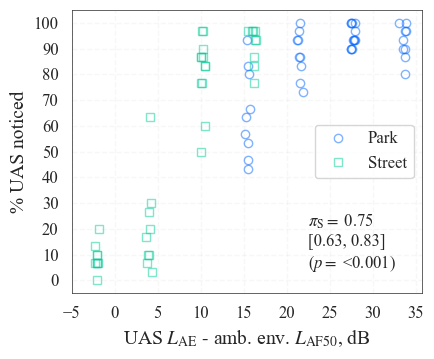

In [83]:
# Generate scatter charts for noticeability and LAELAF50diff

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'LAELAF50diff'],
                   dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'LAELAF50diff'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Park")

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'LAELAF50diff'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'NoticedPropFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Street")

ax.set(xlabel=r"UAS $L_\mathrm{AE}$ - amb. env. $L_\mathrm{AF50}$, dB",
       ylabel=r"% UAS noticed",
       xticks=np.arange(-5, 40, 5),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(22.5, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')
ax.legend(loc='center right')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

if saveplots:
    filename = "PtANoticeLAELAF50diffByAmb"
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

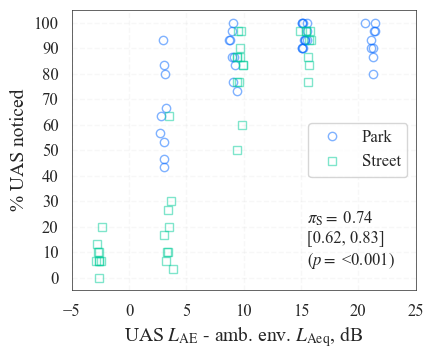

In [84]:
# Generate scatter charts for noticeability and LAELAeq

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'LAELAeqdiff'],
                   dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'LAELAeqdiff'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Park")

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'LAELAeqdiff'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'NoticedPropFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Street")

ax.set(xlabel=r"UAS $L_\mathrm{AE}$ - amb. env. $L_\mathrm{Aeq}$, dB",
       ylabel=r"% UAS noticed",
       xticks=np.arange(-5, 30, 5),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(15.5, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')
ax.legend(loc='center right')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

plt.show()

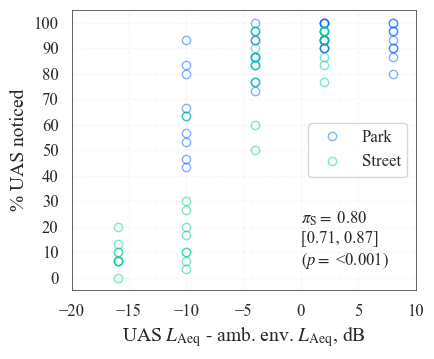

In [85]:
# Generate scatter charts for noticeability and LAELAeq

# prepare data
data = dataByStimTestANotice.copy()
dictSNR = {0: "No UAS", 1: -16, 2: -10, 3: -4, 4: 2, 5: 8}
data['SNRlevel'].cat.codes.map(dictSNR)
data = data.loc[data['SNRlevel'] != "No UAS", :]
data['SNRlevel'] = pd.to_numeric(data['SNRlevel'])

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(data.loc[:, 'SNRlevel'],
                   data.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(data.loc[data['AmbientEnv']=="Park", 'SNRlevel'],
        data.loc[data['AmbientEnv']=="Park", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Park")

ax.plot(data.loc[data['AmbientEnv']=="Street", 'SNRlevel'],
        data.loc[data['AmbientEnv']=="Street", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Street")

ax.set(xlabel=r"UAS $L_\mathrm{Aeq}$ - amb. env. $L_\mathrm{Aeq}$, dB",
       ylabel=r"% UAS noticed",
       xticks=np.arange(-20, 15, 5),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(0, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')
ax.legend(loc='center right')

if saveplots:
    filename = "PtANoticeSNRByAmb"
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

plt.show()

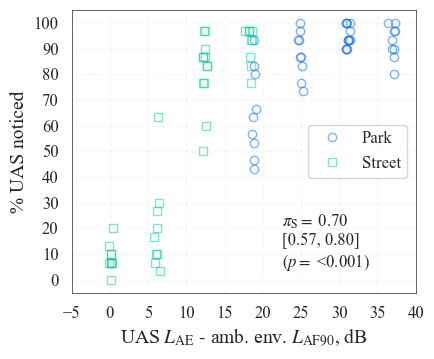

In [86]:
# Generate scatter charts for noticeability and LAELAF90

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'LAELAF90diff'],
                   dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'LAELAF90diff'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Park")

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'LAELAF90diff'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'NoticedPropFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Street")

ax.set(xlabel=r"UAS $L_\mathrm{AE}$ - amb. env. $L_\mathrm{AF90}$, dB",
       ylabel=r"% UAS noticed",
       xticks=np.arange(-5, 45, 5),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(22.5, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')
ax.legend(loc='center right')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

plt.show()

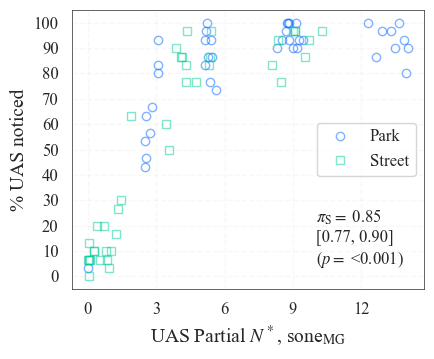

In [ ]:
# Generate scatter charts for noticeability and partial loudness

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'PartLoudMGSTPowAvg'],
                   dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'PartLoudMGSTPowAvg'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Park")

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'PartLoudMGSTPowAvg'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'NoticedPropFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Street")

ax.set(xlabel=r"UAS Partial $N^*$, sone$_{\mathrm{MG}}$",
       ylabel=r"% UAS noticed",
       xticks=np.arange(0, 18, 3),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(10, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')
ax.legend(loc='center right')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

if saveplots:
    filename = "PtANoticeVsPartLoudPowByAmbFilt"
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

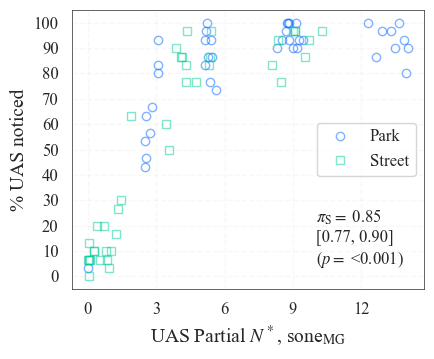

In [ ]:
# Generate scatter charts for noticeability and partial loudness (Sottek)

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'PartLoudSHMPowAvg'],
                   dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'PartLoudSHMPowAvg'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Park", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Park")

ax.plot(dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'PartLoudSHMPowAvg'],
        dataByStimTestANotice.loc[dataByStimTestANotice['AmbientEnv']=="Street", 'NoticedPropFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Street")

ax.set(xlabel=r"UAS Partial $N^*$, sone$_{\mathrm{SHM}}$",
       ylabel=r"% UAS noticed",
       xticks=np.arange(0, 15, 3),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(10, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')
ax.legend(loc='center right')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

if saveplots:
    filename = "PtANoticeVsPartLoudPowByAmbFilt"
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

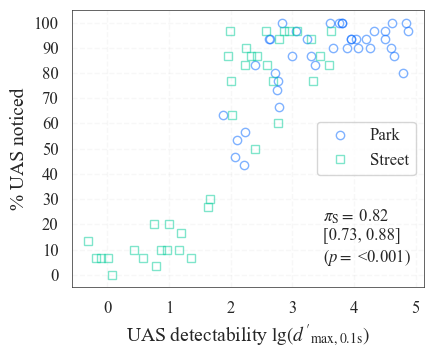

In [88]:
# Generate scatter charts for noticeability and lg(detectability)

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'Detect0p1MaxMaxLRLog'],
                   dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(data.loc[data['AmbientEnv']=="Park", 'Detect0p1MaxMaxLRLog'],
        data.loc[data['AmbientEnv']=="Park", 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Park")

ax.plot(data.loc[data['AmbientEnv']=="Street", 'Detect0p1MaxMaxLRLog'],
        data.loc[data['AmbientEnv']=="Street", 'NoticedPropFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5,
        label="Street")

ax.set(xlabel=r"UAS detectability $\mathrm{lg}(d'_{\mathrm{max,0.1s}})$",
       ylabel=r"% UAS noticed",
       xticks=np.arange(0, 6, 1),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(3.5, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')
ax.legend(loc='center right')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtANoticeDetectCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

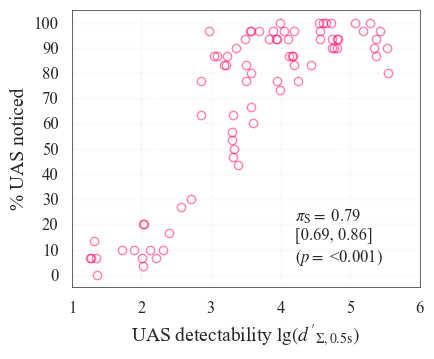

In [89]:
# Generate scatter charts for noticeability and lg(detectability)

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'Detect0p5IntMaxLRLog'],
                   dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[:, 'Detect0p5IntMaxLRLog'],
        dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[2], markeredgewidth=1,
        color='none', alpha=0.5)

ax.set(xlabel=r"UAS detectability $\mathrm{lg}(d'_{\mathrm{\Sigma,0.5s}})$",
       ylabel=r"% UAS noticed",
       xticks=np.arange(1, 7, 1),
       yticks=np.arange(0, 1.1, 0.1),
       yticklabels=np.arange(0, 110, 10))
ax.text(4.2, 0.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtANoticeDetectCorr"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
plt.show()

### Annoyance

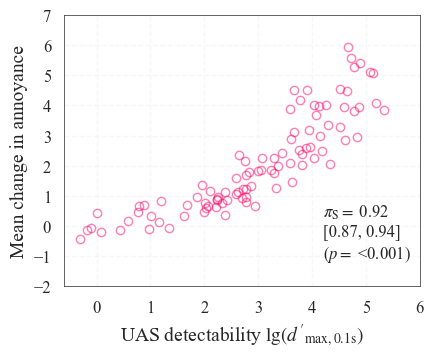

In [90]:
# Generate scatter charts for mean change in annoyance and lg(detectability)

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTest.loc[:, 'Detect0p1MaxMaxLRLog'],
                   dataByStimTest.loc[:, 'dAnnoyMean'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[:, 'Detect0p1MaxMaxLRLog'],
        dataByStimTest.loc[:, 'dAnnoyMean'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[2], markeredgewidth=1,
        color='none', alpha=0.5)

ax.set(xlabel=r"UAS detectability $\mathrm{lg}(d'_{\mathrm{max,0.1s}})$",
       ylabel=r"Mean change in annoyance",
       xticks=np.arange(0, 7, 1),
       yticks=np.arange(-2, 8, 1))
ax.text(4.2, -1.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

plt.show()

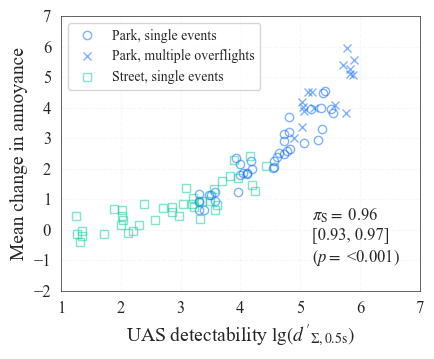

In [206]:
# Generate scatter charts for mean change in annoyance and lg(detectability), separated colours

fig, ax = plt.subplots(figsize=(4.5, 3.75))

dataByStimTest['Detect0p5IntMaxLRLog'] = dataByStimTest['Detect0p5dBIntMaxLR']/10

testCorr = pg.corr(dataByStimTest.loc[:, 'Detect0p5IntMaxLRLog'],
                   dataByStimTest.loc[:, 'dAnnoyMean'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'Detect0p5IntMaxLRLog'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dAnnoyMean'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'Detect0p5IntMaxLRLog'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dAnnoyMean'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'Detect0p5IntMaxLRLog'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dAnnoyMean'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS detectability $\mathrm{lg}(d'_{\mathrm{\Sigma,0.5s}})$",
       ylabel=r"Mean change in annoyance",
       xticks=np.arange(1, 8, 1),
       yticks=np.arange(-2, 8, 1))
ax.text(5.2, -1.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdAnnoyMnDetectCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
plt.show()

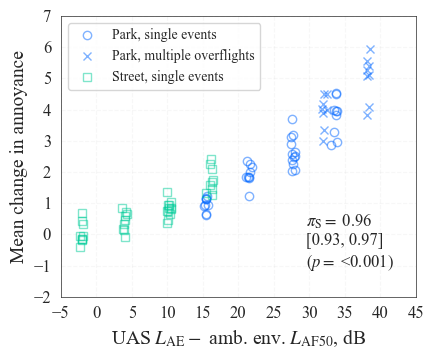

In [104]:
# Generate scatter charts for mean change in annoyance and LAELAF50diff

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'LAELAF50diff'],
                   dataByStimTest.loc[:, 'dAnnoyMean'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'LAELAF50diff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dAnnoyMean'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'LAELAF50diff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dAnnoyMean'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'LAELAF50diff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dAnnoyMean'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $L_\mathrm{AE}-$ amb. env. $L_\mathrm{AF50}$, dB",
       ylabel=r"Mean change in annoyance",
       xticks=np.arange(-5, 50, 5),
       yticks=np.arange(-2, 8, 1))
ax.text(29.5, -1.05, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdAnnoyMndLAECorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

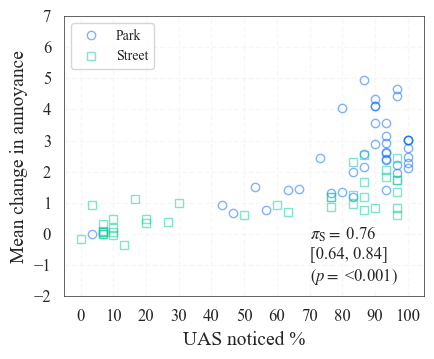

In [94]:
# Generate scatter charts for mean change in annoyance and noticeability, separated colours

fig, ax = plt.subplots(figsize=(4.5, 3.75))

testCorr = pg.corr(dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   dataByStimTestANotice.loc[:, 'dAnnoyMeanFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Park")
                           & (dataByStimTestANotice['SessionPart']=="A"), 'NoticedPropFilt'],
        dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Park")
                           & (dataByStimTestANotice['SessionPart']=="A"), 'dAnnoyMeanFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park")

ax.plot(dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Street")
                           & (dataByStimTestANotice['SessionPart']=="A"), 'NoticedPropFilt'],
        dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Street")
                           & (dataByStimTestANotice['SessionPart']=="A"), 'dAnnoyMeanFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street")

ax.set(xlabel=r"UAS noticed %",
       ylabel=r"Mean change in annoyance",
       xticks=np.arange(0, 1.1, 0.1),
       xticklabels=np.arange(0, 110, 10),
       yticks=np.arange(-2, 8, 1))
ax.text(0.7, -1.5, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtAdAnnoyMnNoticeCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
plt.show()

### % Highly annoyed | HA'amb

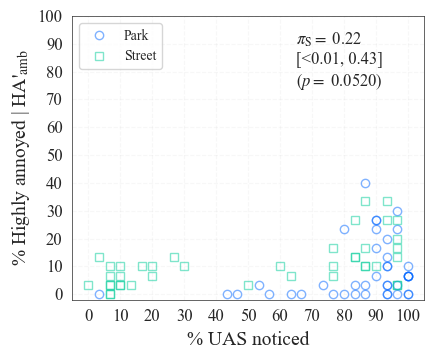

In [172]:
# Generate scatter charts for % highly annoyed and % UAS noticed

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTestANotice.loc[:, 'NoticedPropFilt'],
                   dataByStimTestANotice.loc[:, 'dHighAnnoyPropFilt'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Park")
                                  & (dataByStimTestANotice['SessionPart']=="A"), 'NoticedPropFilt'],
        dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Park")
                                  & (dataByStimTestANotice['SessionPart']=="A"), 'dHighAnnoyPropFilt'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park")

ax.plot(dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Street")
                                  & (dataByStimTestANotice['SessionPart']=="A"), 'NoticedPropFilt'],
        dataByStimTestANotice.loc[(dataByStimTestANotice['AmbientEnv']=="Street")
                                  & (dataByStimTestANotice['SessionPart']=="A"), 'dHighAnnoyPropFilt'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street")

ax.set(xlabel=r"% UAS noticed",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(0, 1.1, 0.1), xticklabels=np.arange(0, 110, 10),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(0.65, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtAdHiAnnoyUASNoticedCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

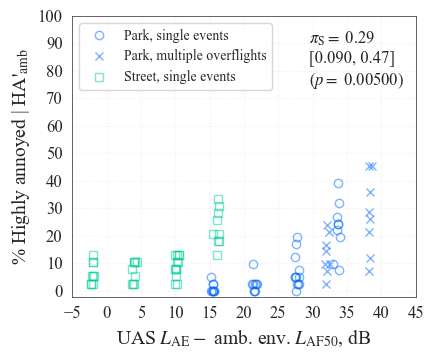

In [ ]:
# Generate scatter charts for % highly annoyed and LAELAF50diff

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'LAELAF50diff'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'LAELAF50diff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'LAELAF50diff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'LAELAF50diff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $L_\mathrm{AE}-$ amb. env. $L_\mathrm{AF50}$, dB",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(-5, 50, 5),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(29.5, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyLAELAF50diffCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

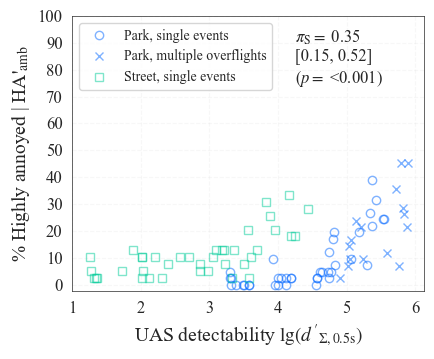

In [162]:
# Generate scatter charts for % highly annoyed and Detect0p5IntMaxLRLog

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'Detect0p5IntMaxLRLog'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'Detect0p5IntMaxLRLog'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'Detect0p5IntMaxLRLog'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'Detect0p5IntMaxLRLog'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS detectability $\mathrm{lg}(d'_{\mathrm{\Sigma,0.5s}})$",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(1, 7, 1),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(4.25, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyDetect0p5IntCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

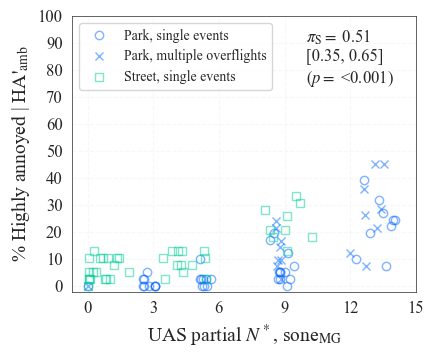

In [180]:
# Generate scatter charts for % highly annoyed and PartLoudMGSTPowAvg

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'PartLoudMGSTPowAvg'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'PartLoudMGSTPowAvg'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'PartLoudMGSTPowAvg'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'PartLoudMGSTPowAvg'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS partial $N^*$, sone$_{\mathrm{MG}}$",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(0, 18, 3),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(10, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyPartLoudMGSTPowAvgCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

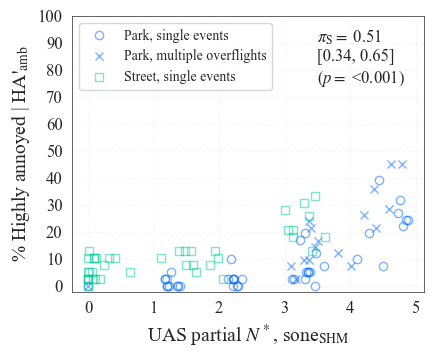

In [179]:
# Generate scatter charts for % highly annoyed and PartLoudSHMPowAvg

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'PartLoudSHMPowAvgBin'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'PartLoudSHMPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'PartLoudSHMPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'PartLoudSHMPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS partial $N^*$, sone$_{\mathrm{SHM}}$",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(0, 6, 1),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(3.5, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyPartLoudSHMPowAvgCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

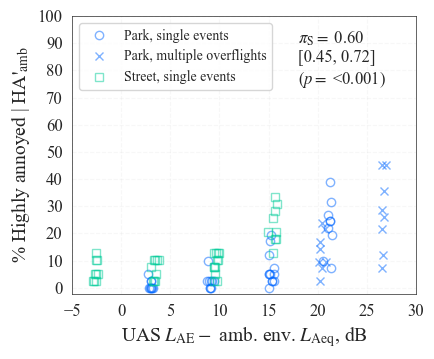

In [178]:
# Generate scatter charts for % highly annoyed and LAELAeqdiff

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'LAELAeqdiff'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'LAELAeqdiff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'LAELAeqdiff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'LAELAeqdiff'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $L_\mathrm{AE} -$ amb. env. $L_\mathrm{Aeq}$, dB",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(-5, 35, 5),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(18, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyLAELAeqdiffCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

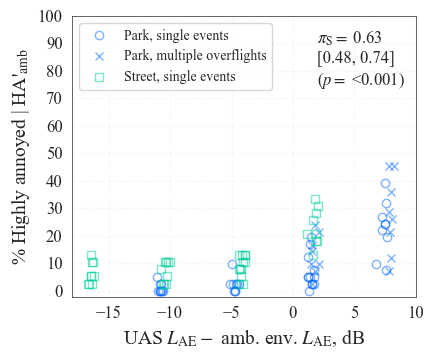

In [177]:
# Generate scatter charts for % highly annoyed and LAELAEdiff

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'UASLAEMaxLR'] - dataByStimTest.loc[:, 'AmbLAEMaxLR'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLAEMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                              & (dataByStimTest['SessionPart']=="A"), 'AmbLAEMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'UASLAEMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                              & (dataByStimTest['SessionPart']=="B"), 'AmbLAEMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLAEMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                              & (dataByStimTest['SessionPart']=="A"), 'AmbLAEMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $L_\mathrm{AE} -$ amb. env. $L_\mathrm{AE}$, dB",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(-15, 15, 5),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(2, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyLAELAEdiffCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

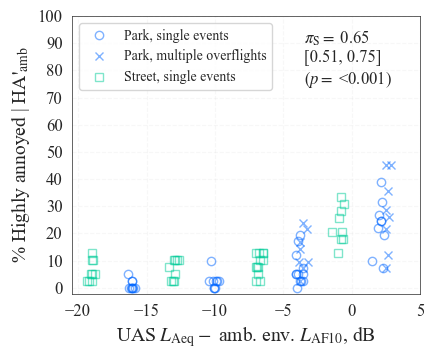

In [ ]:
# Generate scatter charts for % highly annoyed and LAeqLAF10diff

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'UASLAeqMaxLR'] - dataByStimTest.loc[:, 'AmbLAF10ExMaxLR'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLAeqMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                              & (dataByStimTest['SessionPart']=="A"), 'AmbLAF10ExMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'UASLAeqMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                              & (dataByStimTest['SessionPart']=="B"), 'AmbLAF10ExMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLAeqMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                              & (dataByStimTest['SessionPart']=="A"), 'AmbLAF10ExMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $L_\mathrm{Aeq} -$ amb. env. $L_\mathrm{AF10}$, dB",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(-20, 10, 5),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(-3.5, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyLAeqLAF10diffCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

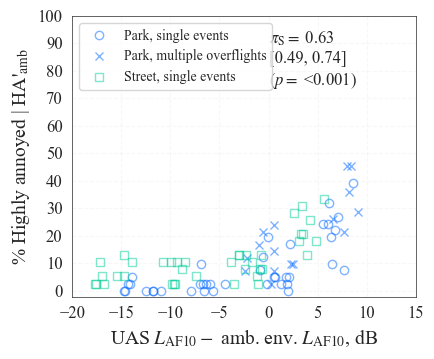

In [ ]:
# Generate scatter charts for % highly annoyed and LAF10LAF10diff

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'UASLAF10ExMaxLR'] - dataByStimTest.loc[:, 'AmbLAF10ExMaxLR'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLAF10ExMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                              & (dataByStimTest['SessionPart']=="A"), 'AmbLAF10ExMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'UASLAF10ExMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                              & (dataByStimTest['SessionPart']=="B"), 'AmbLAF10ExMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLAF10ExMaxLR']
        - dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                              & (dataByStimTest['SessionPart']=="A"), 'AmbLAF10ExMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $L_\mathrm{AF10} -$ amb. env. $L_\mathrm{AF10}$, dB",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(-20, 15, 5),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(0, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyLAF10LAF10diffCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')

plt.show()

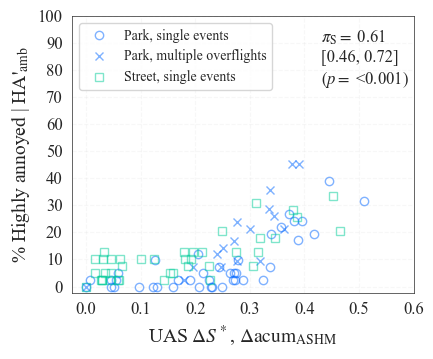

In [ ]:
# Generate scatter charts for % highly annoyed and dSharpAurSHMPowAvgMaxLR

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'dSharpAurSHMPowAvgMaxLR'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dSharpAurSHMPowAvgMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dSharpAurSHMPowAvgMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dSharpAurSHMPowAvgMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $\Delta S^*$, $\Delta\mathrm{acum_{ASHM}}$",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(0, 0.7, 0.1),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(0.43, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoydSharpAurSHMPowAvgCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

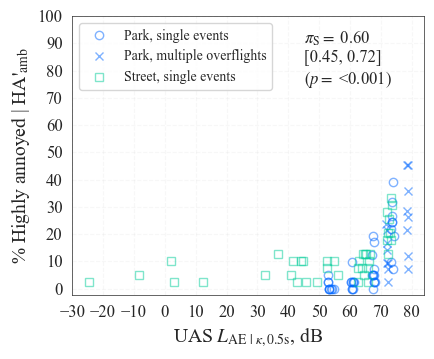

In [12]:
# Generate scatter charts for % highly annoyed and UASDisc0p5LAEMaxLR

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'UASDisc0p5LAEMaxLR'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'UASDisc0p5LAEMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'UASDisc0p5LAEMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'UASDisc0p5LAEMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS $L_\mathrm{AE\ |\ \mathit{\kappa},0.5s}$, dB",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(-30, 90, 10),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(45, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyUASDisc0p5LAEMaxLRCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

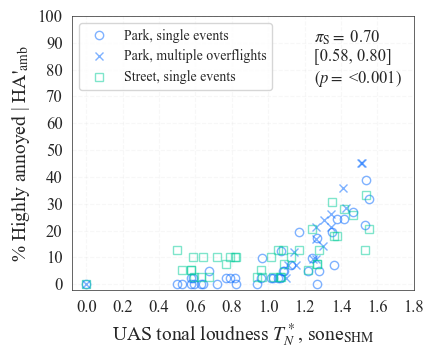

In [184]:
# Generate scatter charts for % highly annoyed and UASTonLdECMAPowAvgBin

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'UASTonLdECMAPowAvgBin'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'UASTonLdECMAPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'UASTonLdECMAPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'UASTonLdECMAPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS tonal loudness $T_{N}^*$, sone$_{\mathrm{SHM}}$",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(0, 2, 0.2),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(1.25, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyTonLdECMAPowAvgCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

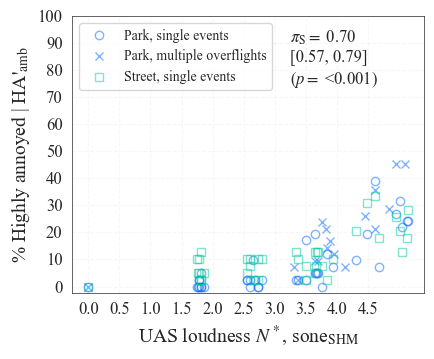

In [185]:
# Generate scatter charts for % highly annoyed and UASLoudECMAPowAvgBin

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'UASLoudECMAPowAvgBin'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLoudECMAPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'UASLoudECMAPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'UASLoudECMAPowAvgBin'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS loudness $N^*$, sone$_{\mathrm{SHM}}$",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(0, 5, 0.5),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(3.25, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyLoudECMAPowAvgCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

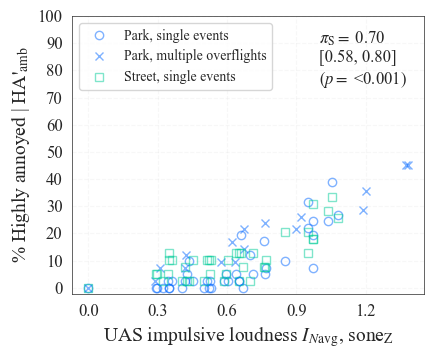

In [220]:
# Generate scatter charts for % highly annoyed and UASImpulsLoudWZAvgMaxLR

fig, ax = plt.subplots(figsize=(4.5, 3.75))


testCorr = pg.corr(dataByStimTest.loc[:, 'UASImpulsLoudWZAvgMaxLR'],
                   dataByStimTest.loc[:, 'dHighAnnoyProp'],
                   method='shepherd',
                   n_boot=10000)

rVal = displayRndVal(testCorr['r'].iloc[0], 2)
pVal = displayRndVal(testCorr['p-val'].iloc[0], 3)
rCI = testCorr['CI95%'].iloc[0]

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'UASImpulsLoudWZAvgMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='o', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, single events")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'UASImpulsLoudWZAvgMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Park")
                           & (dataByStimTest['SessionPart']=="B"), 'dHighAnnoyProp'],
        marker='x', markerfacecolor='none', markeredgecolor=mycolours[0], markeredgewidth=1,
        color='none', alpha=0.5, label="Park, multiple overflights")

ax.plot(dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'UASImpulsLoudWZAvgMaxLR'],
        dataByStimTest.loc[(dataByStimTest['AmbientEnv']=="Street")
                           & (dataByStimTest['SessionPart']=="A"), 'dHighAnnoyProp'],
        marker='s', markerfacecolor='none', markeredgecolor=mycolours[1], markeredgewidth=1,
        color='none', alpha=0.5, label="Street, single events")

ax.set(xlabel=r"UAS impulsive loudness $I_{N\mathrm{avg}}$, sone$_{\mathrm{Z}}$",
       ylabel=r"% Highly annoyed | HA'$_\mathrm{amb}$",
       xticks=np.arange(0, 1.5, 0.3),
       yticks=np.arange(0, 1.1, 0.1), yticklabels=np.arange(0, 110, 10))
ax.text(1.0, 0.75, r"$\pi_\mathrm{S}=$ " + rVal
        + "\n" + "[" + displayRndVal(rCI[0], 2) + ", "
        + displayRndVal(rCI[1], 2) + "]"
        + "\n" + "(" + r"$p=$ " + pVal + ")")
ax.grid(which='both', alpha=0.15, linestyle='--')

ax.legend(loc='upper left', fontsize=10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

filename = "PtsABdHiAnnoyImpulsLoudWZAvgCorrByAmb"
if saveplots:
    plt.savefig(os.path.join(outFigPath, "svg", filename + ".svg"),
                format='svg')
    plt.savefig(os.path.join(outFigPath, "pdf", filename + ".pdf"),
                format='pdf')
    
plt.show()

## Time-dependent

### Loudness

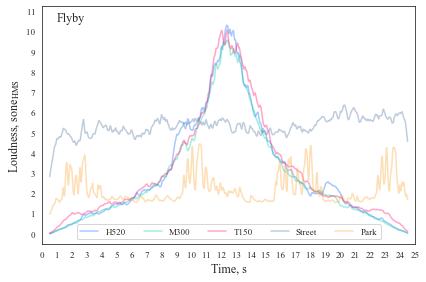

In [26]:
# flyby
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_F_1_SQM, M300_F_1_SQM, T150_F_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet1'].iloc[13, 1:]
    # left channel
    specLoudnessHMSL = pd.DataFrame(workbookdata['Sheet1'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet1'].iloc[13, 1:],
                                    index=workbookdata['Sheet1'].iloc[14:, 0])
    # # right channel
    specLoudnessHMSR = pd.DataFrame(workbookdata['Sheet2'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet2'].iloc[13, 1:],
                                    index=workbookdata['Sheet2'].iloc[14:, 0])
    # # binaural specific loudness (ECMA-418-2:2022 Equation 118)
    specLoudnessHMSBin = ((specLoudnessHMSL**2
                           + specLoudnessHMSR**2)/2).pow(1/2)
    # # binaural time-dependent loudness (ECMA-418-2:2022 Equation 116)
    loudnessHMSTimeVar = specLoudnessHMSBin.sum(axis=0)*0.5

    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], loudnessHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=range(0, 12), xlim=[0, 25], ylim=[-0.5, 11.25],
       xlabel="Time, s", ylabel=r"Loudness, sone$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='lower center')
ax.text(x=1, y=10.5, s="Flyby", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtALoudtDepFlyby.svg"), format='svg')
plt.show()

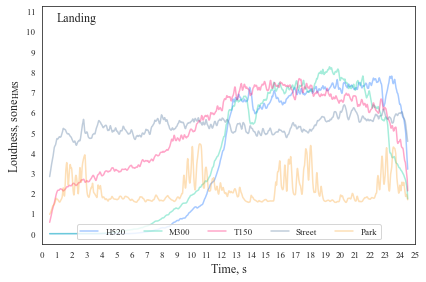

In [27]:
# landing
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_L_1_SQM, M300_L_1_SQM, T150_L_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet1'].iloc[13, 1:]
    # left channel
    specLoudnessHMSL = pd.DataFrame(workbookdata['Sheet1'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet1'].iloc[13, 1:],
                                    index=workbookdata['Sheet1'].iloc[14:, 0])
    # # right channel
    specLoudnessHMSR = pd.DataFrame(workbookdata['Sheet2'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet2'].iloc[13, 1:],
                                    index=workbookdata['Sheet2'].iloc[14:, 0])
    # # binaural specific loudness (ECMA-418-2:2022 Equation 118)
    specLoudnessHMSBin = ((specLoudnessHMSL**2
                           + specLoudnessHMSR**2)/2).pow(1/2)
    # # binaural time-dependent loudness (ECMA-418-2:2022 Equation 116)
    loudnessHMSTimeVar = specLoudnessHMSBin.sum(axis=0)*0.5

    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], loudnessHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=range(0, 12), xlim=[0, 25], ylim=[-0.5, 11.25],
       xlabel="Time, s", ylabel=r"Loudness, sone$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='lower center')
ax.text(x=1, y=10.5, s="Landing", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtALoudtDepLanding.svg"), format='svg')
plt.show()

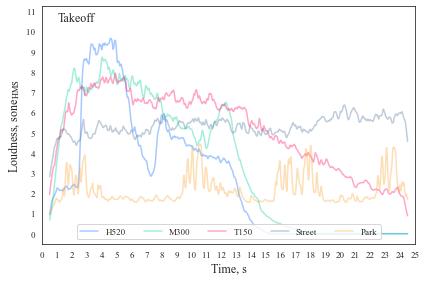

In [28]:
# takeoff
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_T_1_SQM, M300_T_1_SQM, T150_T_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet1'].iloc[13, 1:]
    # left channel
    specLoudnessHMSL = pd.DataFrame(workbookdata['Sheet1'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet1'].iloc[13, 1:],
                                    index=workbookdata['Sheet1'].iloc[14:, 0])
    # # right channel
    specLoudnessHMSR = pd.DataFrame(workbookdata['Sheet2'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet2'].iloc[13, 1:],
                                    index=workbookdata['Sheet2'].iloc[14:, 0])
    # # binaural specific loudness (ECMA-418-2:2022 Equation 118)
    specLoudnessHMSBin = ((specLoudnessHMSL**2
                           + specLoudnessHMSR**2)/2).pow(1/2)
    # # binaural time-dependent loudness (ECMA-418-2:2022 Equation 116)
    loudnessHMSTimeVar = specLoudnessHMSBin.sum(axis=0)*0.5

    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], loudnessHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=range(0, 12), xlim=[0, 25], ylim=[-0.5, 11.25],
       xlabel="Time, s", ylabel=r"Loudness, sone$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='lower center')
ax.text(x=1, y=10.5, s="Takeoff", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtALoudtDepTakeoff.svg"), format='svg')
plt.show()

### Sharpness

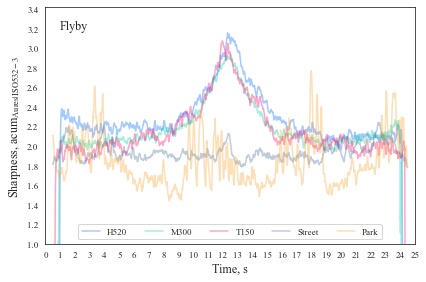

In [29]:
# flyby
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_F_1_SQM, M300_F_1_SQM, T150_F_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet10'].iloc[13:, 0]
    sharpAISO3TimeVar2 = pd.DataFrame(workbookdata['Sheet10'].iloc[13:, 1:3].values,
                                     columns=workbookdata['Sheet10'].iloc[12, 1:3],
                                     index=workbookdata['Sheet10'].iloc[13:, 0])

    whichLR = np.argmax(sharpAISO3TimeVar2.mean(axis=0))
    sharpAISO3TimeVar = sharpAISO3TimeVar2.iloc[:, whichLR]
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], sharpAISO3TimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(1, 4, 0.2), xlim=[0, 25], ylim=[1, 3.425],
       xlabel="Time, s", ylabel=r"Sharpness, acum$_\text{Aures|ISO532-3}$")
ax.legend(labels=labels, ncol=len(labels), loc='lower center')
ax.text(x=1, y=3.2, s="Flyby", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtASharptDepFlyby.svg"), format='svg')
plt.show()

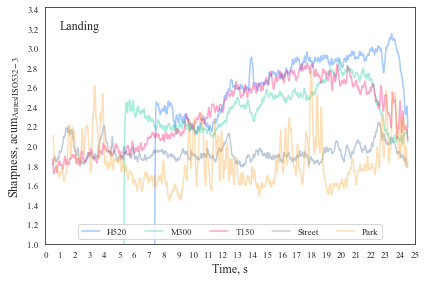

In [30]:
# landing
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_L_1_SQM, M300_L_1_SQM, T150_L_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet10'].iloc[13:, 0]
    sharpAISO3TimeVar2 = pd.DataFrame(workbookdata['Sheet10'].iloc[13:, 1:3].values,
                                     columns=workbookdata['Sheet10'].iloc[12, 1:3],
                                     index=workbookdata['Sheet10'].iloc[13:, 0])

    whichLR = np.argmax(sharpAISO3TimeVar2.mean(axis=0))
    sharpAISO3TimeVar = sharpAISO3TimeVar2.iloc[:, whichLR]
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], sharpAISO3TimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(1, 4, 0.2), xlim=[0, 25], ylim=[1, 3.425],
       xlabel="Time, s", ylabel=r"Sharpness, acum$_\text{Aures|ISO532-3}$")
ax.legend(labels=labels, ncol=len(labels), loc='lower center')
ax.text(x=1, y=3.2, s="Landing", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtASharptDepLanding.svg"), format='svg')
plt.show()

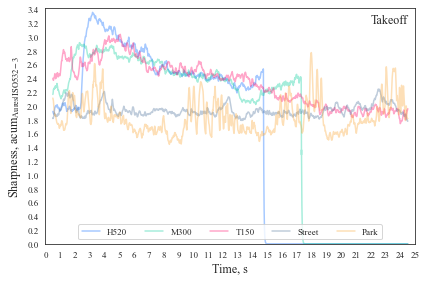

In [48]:
# takeoff
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_T_1_SQM, M300_T_1_SQM, T150_T_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet10'].iloc[13:, 0]
    sharpAISO3TimeVar2 = pd.DataFrame(workbookdata['Sheet10'].iloc[13:, 1:3].values,
                                     columns=workbookdata['Sheet10'].iloc[12, 1:3],
                                     index=workbookdata['Sheet10'].iloc[13:, 0])

    whichLR = np.argmax(sharpAISO3TimeVar2.mean(axis=0))
    sharpAISO3TimeVar = sharpAISO3TimeVar2.iloc[:, whichLR]
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], sharpAISO3TimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 4, 0.2), xlim=[0, 25], ylim=[0, 3.425],
       xlabel="Time, s", ylabel=r"Sharpness, acum$_\text{Aures|ISO532-3}$")
ax.legend(labels=labels, ncol=len(labels), loc='lower center')
ax.text(x=22, y=3.2, s="Takeoff", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtASharptDepTakeoff.svg"), format='svg')
plt.show()

### Tonality

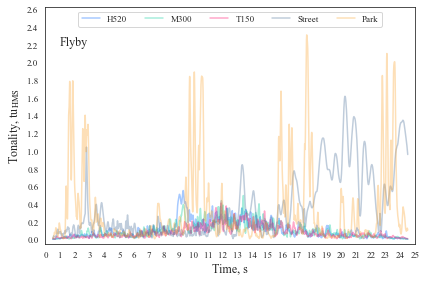

In [32]:
# flyby
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_F_1_SQM, M300_F_1_SQM, T150_F_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet3'].iloc[13, 1:]
    # left channel
    specTonalityHMSL = pd.DataFrame(workbookdata['Sheet3'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet3'].iloc[13, 1:],
                                    index=workbookdata['Sheet3'].iloc[14:, 0])
    # right channel
    specTonalityHMSR = pd.DataFrame(workbookdata['Sheet4'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet4'].iloc[13, 1:],
                                    index=workbookdata['Sheet4'].iloc[14:, 0])
    # 2-channel time-varing tonality (max, not integration)
    tonalityHMSTimeVar2 = pd.concat([specTonalityHMSL.max(axis=0),
                                     specTonalityHMSR.max(axis=0)],
                                     axis=1)
    whichLR = np.argmax(tonalityHMSTimeVar2.mean(axis=0))
    tonalityHMSTimeVar = tonalityHMSTimeVar2.iloc[:, whichLR] 
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], tonalityHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 3, 0.2), xlim=[0, 25], ylim=[-0.05, 2.625],
       xlabel="Time, s", ylabel=r"Tonality, tu$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=2.2, s="Flyby", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtATonaltDepFlyby.svg"), format='svg')
plt.show()

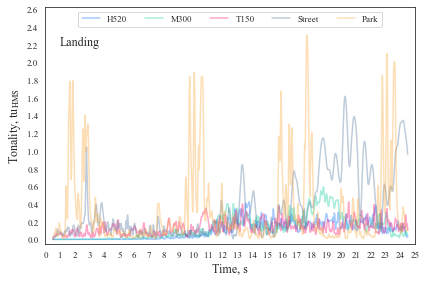

In [33]:
# landing
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_L_1_SQM, M300_L_1_SQM, T150_L_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet3'].iloc[13, 1:]
    # left channel
    specTonalityHMSL = pd.DataFrame(workbookdata['Sheet3'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet3'].iloc[13, 1:],
                                    index=workbookdata['Sheet3'].iloc[14:, 0])
    # right channel
    specTonalityHMSR = pd.DataFrame(workbookdata['Sheet4'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet4'].iloc[13, 1:],
                                    index=workbookdata['Sheet4'].iloc[14:, 0])
    # 2-channel time-varing tonality (max, not integration)
    tonalityHMSTimeVar2 = pd.concat([specTonalityHMSL.max(axis=0),
                                     specTonalityHMSR.max(axis=0)],
                                     axis=1)
    whichLR = np.argmax(tonalityHMSTimeVar2.mean(axis=0))
    tonalityHMSTimeVar = tonalityHMSTimeVar2.iloc[:, whichLR] 
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], tonalityHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 3, 0.2), xlim=[0, 25], ylim=[-0.05, 2.625],
       xlabel="Time, s", ylabel=r"Tonality, tu$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=2.2, s="Landing", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtATonaltDepLanding.svg"), format='svg')
plt.show()

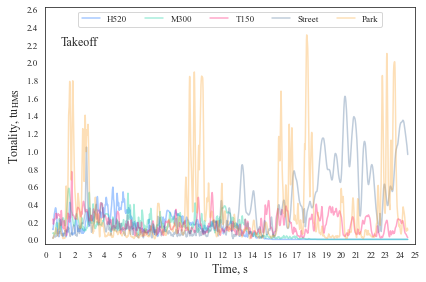

In [34]:
# takeoff
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_T_1_SQM, M300_T_1_SQM, T150_T_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet3'].iloc[13, 1:]
    # left channel
    specTonalityHMSL = pd.DataFrame(workbookdata['Sheet3'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet3'].iloc[13, 1:],
                                    index=workbookdata['Sheet3'].iloc[14:, 0])
    # right channel
    specTonalityHMSR = pd.DataFrame(workbookdata['Sheet4'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet4'].iloc[13, 1:],
                                    index=workbookdata['Sheet4'].iloc[14:, 0])
    # 2-channel time-varing tonality (max, not integration)
    tonalityHMSTimeVar2 = pd.concat([specTonalityHMSL.max(axis=0),
                                     specTonalityHMSR.max(axis=0)],
                                     axis=1)
    whichLR = np.argmax(tonalityHMSTimeVar2.mean(axis=0))
    tonalityHMSTimeVar = tonalityHMSTimeVar2.iloc[:, whichLR] 
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], tonalityHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 3, 0.2), xlim=[0, 25], ylim=[-0.05, 2.625],
       xlabel="Time, s", ylabel=r"Tonality, tu$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=2.2, s="Takeoff", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtATonaltDepTakeoff.svg"), format='svg')
plt.show()

### Fluctuation strength

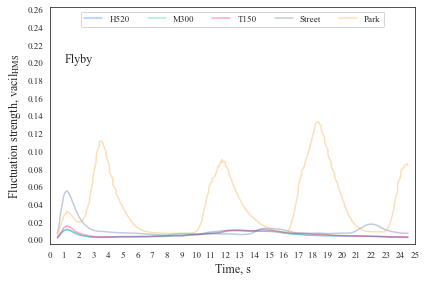

In [35]:
# flyby
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_F_1_SQM, M300_F_1_SQM, T150_F_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet6'].iloc[13, 1:]
    # left channel
    specFluctStrHMSL = pd.DataFrame(workbookdata['Sheet6'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet6'].iloc[13, 1:],
                                    index=workbookdata['Sheet6'].iloc[14:, 0])
    # right channel
    specFluctStrHMSR = pd.DataFrame(workbookdata['Sheet7'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet7'].iloc[13, 1:],
                                    index=workbookdata['Sheet7'].iloc[14:, 0])
    # binaural specific fluctuation strength
    # (using ECMA-418-2:2022 Equation 112 for roughness)
    specFluctStrHMSBin = ((specFluctStrHMSL**2
                           + specFluctStrHMSR**2)/2).pow(1/2)
    # binaural time-dependent fluctuation strength
    # (using ECMA-418-2:2022 Equation 111 for roughness)
    fluctStrHMSTimeVar = specFluctStrHMSBin.sum(axis=0)*0.5
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], fluctStrHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 0.3, 0.02), xlim=[0, 25], ylim=[-0.005, 0.2625],
       xlabel="Time, s", ylabel=r"Fluctuation strength, vacil$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=0.2, s="Flyby", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtAFluctstDepFlyby.svg"), format='svg')
plt.show()

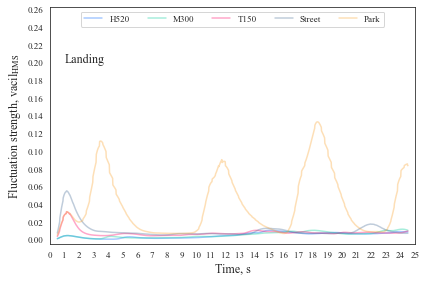

In [36]:
# landing
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_L_1_SQM, M300_L_1_SQM, T150_L_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet6'].iloc[13, 1:]
    # left channel
    specFluctStrHMSL = pd.DataFrame(workbookdata['Sheet6'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet6'].iloc[13, 1:],
                                    index=workbookdata['Sheet6'].iloc[14:, 0])
    # right channel
    specFluctStrHMSR = pd.DataFrame(workbookdata['Sheet7'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet7'].iloc[13, 1:],
                                    index=workbookdata['Sheet7'].iloc[14:, 0])
    # binaural specific fluctuation strength
    # (using ECMA-418-2:2022 Equation 112 for roughness)
    specFluctStrHMSBin = ((specFluctStrHMSL**2
                           + specFluctStrHMSR**2)/2).pow(1/2)
    # binaural time-dependent fluctuation strength
    # (using ECMA-418-2:2022 Equation 111 for roughness)
    fluctStrHMSTimeVar = specFluctStrHMSBin.sum(axis=0)*0.5
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], fluctStrHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 0.3, 0.02), xlim=[0, 25], ylim=[-0.005, 0.2625],
       xlabel="Time, s", ylabel=r"Fluctuation strength, vacil$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=0.2, s="Landing", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtAFluctstDepLanding.svg"), format='svg')
plt.show()

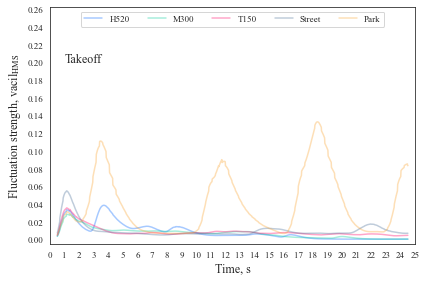

In [37]:
# takeoff
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_T_1_SQM, M300_T_1_SQM, T150_T_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet6'].iloc[13, 1:]
    # left channel
    specFluctStrHMSL = pd.DataFrame(workbookdata['Sheet6'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet6'].iloc[13, 1:],
                                    index=workbookdata['Sheet6'].iloc[14:, 0])
    # right channel
    specFluctStrHMSR = pd.DataFrame(workbookdata['Sheet7'].iloc[14:, 1:].values,
                                    columns=workbookdata['Sheet7'].iloc[13, 1:],
                                    index=workbookdata['Sheet7'].iloc[14:, 0])
    # binaural specific fluctuation strength
    # (using ECMA-418-2:2022 Equation 112 for roughness)
    specFluctStrHMSBin = ((specFluctStrHMSL**2
                           + specFluctStrHMSR**2)/2).pow(1/2)
    # binaural time-dependent fluctuation strength
    # (using ECMA-418-2:2022 Equation 111 for roughness)
    fluctStrHMSTimeVar = specFluctStrHMSBin.sum(axis=0)*0.5
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], fluctStrHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 0.3, 0.02), xlim=[0, 25], ylim=[-0.005, 0.2625],
       xlabel="Time, s", ylabel=r"Fluctuation strength, vacil$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=0.2, s="Takeoff", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtAFluctstDepTakeoff.svg"), format='svg')
plt.show()

### Roughness

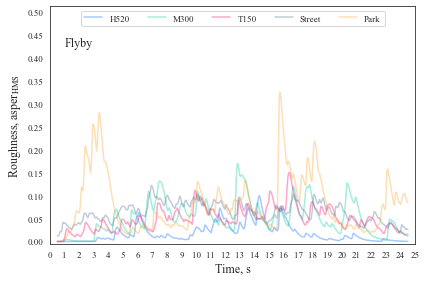

In [38]:
# flyby
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_F_1_SQM, M300_F_1_SQM, T150_F_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet5'].iloc[13, 1:]
    # binaural specific roughness
    specRoughHMSBin = pd.DataFrame(workbookdata['Sheet5'].iloc[14:, 1:].values,
                                   columns=workbookdata['Sheet5'].iloc[13, 1:],
                                   index=workbookdata['Sheet5'].iloc[14:, 0])
    # binaural time-varying roughness
    roughHMSTimeVar = specRoughHMSBin.sum(axis=0)*0.5
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], roughHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 0.55, 0.05), xlim=[0, 25], ylim=[-0.005, 0.5125],
       xlabel="Time, s", ylabel=r"Roughness, asper$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=0.425, s="Flyby", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtARoughtDepFlyby.svg"), format='svg')
plt.show()

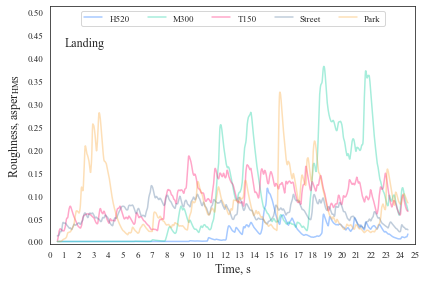

In [39]:
# landing
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_L_1_SQM, M300_L_1_SQM, T150_L_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet5'].iloc[13, 1:]
    # binaural specific roughness
    specRoughHMSBin = pd.DataFrame(workbookdata['Sheet5'].iloc[14:, 1:].values,
                                   columns=workbookdata['Sheet5'].iloc[13, 1:],
                                   index=workbookdata['Sheet5'].iloc[14:, 0])
    # binaural time-varying roughness
    roughHMSTimeVar = specRoughHMSBin.sum(axis=0)*0.5
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], roughHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 0.55, 0.05), xlim=[0, 25], ylim=[-0.005, 0.5125],
       xlabel="Time, s", ylabel=r"Roughness, asper$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=0.425, s="Landing", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtARoughtDepLanding.svg"), format='svg')
plt.show()

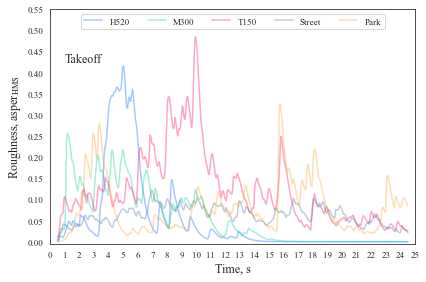

In [43]:
# takeoff
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_T_1_SQM, M300_T_1_SQM, T150_T_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet5'].iloc[13, 1:]
    # binaural specific roughness
    specRoughHMSBin = pd.DataFrame(workbookdata['Sheet5'].iloc[14:, 1:].values,
                                   columns=workbookdata['Sheet5'].iloc[13, 1:],
                                   index=workbookdata['Sheet5'].iloc[14:, 0])
    # binaural time-varying roughness
    roughHMSTimeVar = specRoughHMSBin.sum(axis=0)*0.5
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], roughHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 0.6, 0.05), xlim=[0, 25], ylim=[-0.005, 0.55],
       xlabel="Time, s", ylabel=r"Roughness, asper$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=1, y=0.425, s="Takeoff", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtARoughtDepTakeoff.svg"), format='svg')
plt.show()

### Impulsiveness

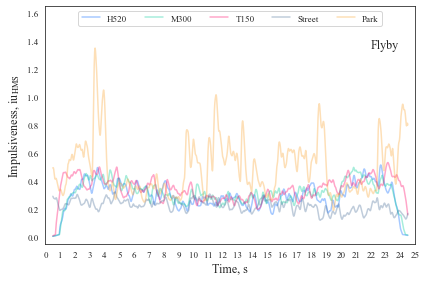

In [44]:
# flyby
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_F_1_SQM, M300_F_1_SQM, T150_F_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet12'].iloc[13:, 0]
    # 2-channel impulsiveness
    impulsiveHMSTimeVar2 = pd.DataFrame(workbookdata['Sheet12'].iloc[13:, 1:3].values,
                                       columns=workbookdata['Sheet12'].iloc[12, 1:3],
                                       index=workbookdata['Sheet12'].iloc[13:, 0])

    whichLR = np.argmax(impulsiveHMSTimeVar2.mean(axis=0))
    impulsiveHMSTimeVar = impulsiveHMSTimeVar2.iloc[:, whichLR]
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], impulsiveHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 2, 0.2), xlim=[0, 25], ylim=[-0.05, 1.65],
       xlabel="Time, s", ylabel=r"Impulsiveness, iu$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=22, y=1.35, s="Flyby", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtAImpulstDepFlyby.svg"), format='svg')
plt.show()

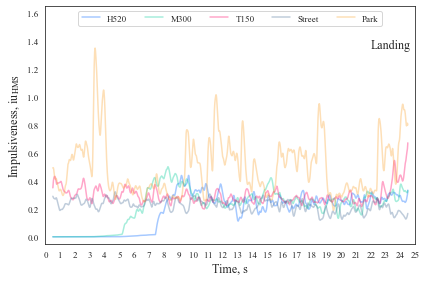

In [45]:
# landing
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_L_1_SQM, M300_L_1_SQM, T150_L_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet12'].iloc[13:, 0]
    # 2-channel impulsiveness
    impulsiveHMSTimeVar2 = pd.DataFrame(workbookdata['Sheet12'].iloc[13:, 1:3].values,
                                       columns=workbookdata['Sheet12'].iloc[12, 1:3],
                                       index=workbookdata['Sheet12'].iloc[13:, 0])

    whichLR = np.argmax(impulsiveHMSTimeVar2.mean(axis=0))
    impulsiveHMSTimeVar = impulsiveHMSTimeVar2.iloc[:, whichLR]
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], impulsiveHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 2, 0.2), xlim=[0, 25], ylim=[-0.05, 1.65],
       xlabel="Time, s", ylabel=r"Impulsiveness, iu$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=22, y=1.35, s="Landing", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtAImpulstDepLanding.svg"), format='svg')
plt.show()

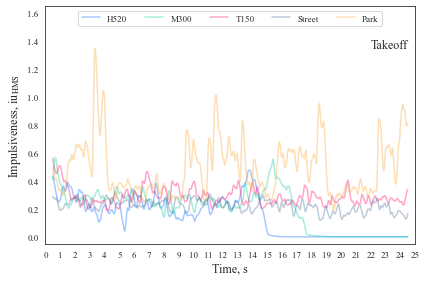

In [46]:
# takeoff
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle(cycler(color=mycolours))
labels = ["H520", "M300", "T150", "Street", "Park"]
for workbookdata in [H520_T_1_SQM, M300_T_1_SQM, T150_T_1_SQM, A1_SQM, A2_SQM]:
    t = workbookdata['Sheet12'].iloc[13:, 0]
    # 2-channel impulsiveness
    impulsiveHMSTimeVar2 = pd.DataFrame(workbookdata['Sheet12'].iloc[13:, 1:3].values,
                                       columns=workbookdata['Sheet12'].iloc[12, 1:3],
                                       index=workbookdata['Sheet12'].iloc[13:, 0])

    whichLR = np.argmax(impulsiveHMSTimeVar2.mean(axis=0))
    impulsiveHMSTimeVar = impulsiveHMSTimeVar2.iloc[:, whichLR]
    
    ax.plot(t[(t >= 0.5) & (t <= 24.5)], impulsiveHMSTimeVar[(t >= 0.5).values & (t <= 24.5).values], alpha=0.35)

ax.set(xticks=range(0, 26), yticks=np.arange(0, 2, 0.2), xlim=[0, 25], ylim=[-0.05, 1.65],
       xlabel="Time, s", ylabel=r"Impulsiveness, iu$_\text{HMS}$")
ax.legend(labels=labels, ncol=len(labels), loc='upper center')
ax.text(x=22, y=1.35, s="Takeoff", fontsize=12)
plt.savefig(os.path.join(outFigPath, "PtAImpulstDepTakeoff.svg"), format='svg')
plt.show()